In [204]:
%matplotlib inline

In [195]:
from catboost import Pool, CatBoostRegressor, cv

In [196]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

In [197]:
from sklearn.preprocessing import QuantileTransformer

In [222]:
data_all = pd.read_csv('deap_dataset_isolated.csv')
data_all

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,1.484383,-0.007692,2.854492,0.314085,1.522358,0.193281,3.505953,0.742818,0.307039,0.987916,...,1.601542,0.824846,1.408808,12.906891,0.803484,0.999977,1,1,1,7.83
1,1.556828,-0.001690,2.903278,0.284743,1.503775,0.211067,3.861489,0.761305,0.302559,0.988604,...,1.616463,0.844913,1.465049,12.906891,0.818364,1.000000,1,1,2,7.83
2,1.585217,0.004273,2.883640,0.289118,1.580589,0.229094,3.410764,0.784833,0.303804,0.988171,...,1.601818,0.841968,1.506933,12.906891,0.811917,0.999577,1,1,3,7.83
3,1.636149,0.008965,2.644221,0.280260,1.584523,0.216789,3.376908,0.783152,0.313923,0.987522,...,1.614030,0.847914,1.555134,12.906891,0.817692,0.999983,1,1,4,7.83
4,1.829717,0.005163,3.007254,0.205972,1.549235,0.241468,3.858740,0.853737,0.290795,0.987040,...,1.630649,0.895176,1.777740,12.906891,0.843627,0.999926,1,1,5,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19561,1.728836,-0.004444,2.797080,0.261082,1.665462,0.247139,3.471880,0.821806,0.317735,0.988659,...,1.606150,0.860561,1.656421,12.906891,0.831258,0.999998,32,40,14,1.88
19562,1.594800,-0.055830,3.747132,0.335007,2.043562,0.331776,3.409042,0.830209,0.259786,0.987347,...,1.596723,0.810083,1.472948,12.906891,0.760206,0.999763,32,40,15,1.88
19563,1.787636,-0.016016,4.458728,0.209458,1.710900,0.373061,3.496581,0.887349,0.231478,0.986785,...,1.601611,0.893062,1.693747,12.906891,0.794703,0.999678,32,40,16,1.88
19564,1.355464,-0.034910,3.873512,0.439351,2.366161,0.372195,2.859996,0.762985,0.248196,0.987487,...,1.547087,0.730611,1.198213,12.906891,0.711782,0.999992,32,40,17,1.88


In [223]:
X_test = data_all.loc[(data_all['Subj']  == 11)].reset_index(drop=True)
X_train = data_all.loc[(data_all['Subj'] != 11)].reset_index(drop=True)
X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

y_train = X_train['labels']
y_test_inv = np.array(X_test['labels'])
train_film = X_train['film']
train_subj = X_train['Subj']
train_ch = X_train['ch']
test_film = X_test['film']
test_subj = X_test['Subj']
test_ch = np.array(X_test['ch'])

X_train = X_train.drop(['film', 'labels', 'Subj'], axis=1)
X_test = X_test.drop(['film', 'labels', 'Subj'], axis=1)


qt_train = QuantileTransformer(output_distribution='normal',
                           copy=True)
y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
qt_test = QuantileTransformer(output_distribution='normal',
                             copy=True)
y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))

In [224]:
model = CatBoostRegressor()
model.fit(X_train, y_train, cat_features=['ch'])

Learning rate set to 0.065121
0:	learn: 1.7769447	total: 35.1ms	remaining: 35s
1:	learn: 1.7751491	total: 65.9ms	remaining: 32.9s
2:	learn: 1.7733939	total: 99ms	remaining: 32.9s
3:	learn: 1.7711911	total: 128ms	remaining: 31.9s
4:	learn: 1.7694331	total: 160ms	remaining: 31.8s
5:	learn: 1.7678083	total: 194ms	remaining: 32.1s
6:	learn: 1.7660802	total: 233ms	remaining: 33.1s
7:	learn: 1.7650353	total: 278ms	remaining: 34.4s
8:	learn: 1.7635497	total: 309ms	remaining: 34.1s
9:	learn: 1.7618121	total: 342ms	remaining: 33.9s
10:	learn: 1.7604908	total: 375ms	remaining: 33.7s
11:	learn: 1.7589043	total: 406ms	remaining: 33.4s
12:	learn: 1.7573996	total: 437ms	remaining: 33.2s
13:	learn: 1.7553643	total: 471ms	remaining: 33.2s
14:	learn: 1.7544839	total: 501ms	remaining: 32.9s
15:	learn: 1.7536218	total: 542ms	remaining: 33.3s
16:	learn: 1.7525056	total: 580ms	remaining: 33.5s
17:	learn: 1.7515498	total: 618ms	remaining: 33.7s
18:	learn: 1.7499505	total: 658ms	remaining: 34s
19:	learn: 1.7

166:	learn: 1.6479901	total: 6.26s	remaining: 31.2s
167:	learn: 1.6474116	total: 6.31s	remaining: 31.2s
168:	learn: 1.6471030	total: 6.36s	remaining: 31.3s
169:	learn: 1.6465687	total: 6.4s	remaining: 31.3s
170:	learn: 1.6461504	total: 6.44s	remaining: 31.2s
171:	learn: 1.6458596	total: 6.48s	remaining: 31.2s
172:	learn: 1.6456678	total: 6.51s	remaining: 31.1s
173:	learn: 1.6448756	total: 6.55s	remaining: 31.1s
174:	learn: 1.6443771	total: 6.58s	remaining: 31s
175:	learn: 1.6443728	total: 6.6s	remaining: 30.9s
176:	learn: 1.6443688	total: 6.61s	remaining: 30.7s
177:	learn: 1.6436773	total: 6.64s	remaining: 30.7s
178:	learn: 1.6432427	total: 6.67s	remaining: 30.6s
179:	learn: 1.6422181	total: 6.71s	remaining: 30.6s
180:	learn: 1.6416733	total: 6.75s	remaining: 30.5s
181:	learn: 1.6409453	total: 6.78s	remaining: 30.5s
182:	learn: 1.6406191	total: 6.81s	remaining: 30.4s
183:	learn: 1.6400497	total: 6.84s	remaining: 30.3s
184:	learn: 1.6391928	total: 6.87s	remaining: 30.3s
185:	learn: 1.63

328:	learn: 1.5763143	total: 12.1s	remaining: 24.8s
329:	learn: 1.5757840	total: 12.2s	remaining: 24.7s
330:	learn: 1.5755072	total: 12.2s	remaining: 24.7s
331:	learn: 1.5751812	total: 12.2s	remaining: 24.6s
332:	learn: 1.5744577	total: 12.3s	remaining: 24.6s
333:	learn: 1.5742817	total: 12.3s	remaining: 24.5s
334:	learn: 1.5738786	total: 12.4s	remaining: 24.6s
335:	learn: 1.5731385	total: 12.4s	remaining: 24.6s
336:	learn: 1.5727154	total: 12.5s	remaining: 24.6s
337:	learn: 1.5721471	total: 12.5s	remaining: 24.5s
338:	learn: 1.5720191	total: 12.6s	remaining: 24.5s
339:	learn: 1.5717075	total: 12.6s	remaining: 24.5s
340:	learn: 1.5712951	total: 12.7s	remaining: 24.5s
341:	learn: 1.5708727	total: 12.7s	remaining: 24.5s
342:	learn: 1.5706464	total: 12.8s	remaining: 24.4s
343:	learn: 1.5703090	total: 12.8s	remaining: 24.4s
344:	learn: 1.5700583	total: 12.8s	remaining: 24.4s
345:	learn: 1.5697457	total: 12.9s	remaining: 24.4s
346:	learn: 1.5694050	total: 12.9s	remaining: 24.3s
347:	learn: 

488:	learn: 1.5160197	total: 18.2s	remaining: 19s
489:	learn: 1.5157600	total: 18.2s	remaining: 19s
490:	learn: 1.5154674	total: 18.3s	remaining: 19s
491:	learn: 1.5152114	total: 18.3s	remaining: 18.9s
492:	learn: 1.5148279	total: 18.4s	remaining: 18.9s
493:	learn: 1.5148233	total: 18.4s	remaining: 18.9s
494:	learn: 1.5144758	total: 18.4s	remaining: 18.8s
495:	learn: 1.5142289	total: 18.5s	remaining: 18.8s
496:	learn: 1.5139861	total: 18.5s	remaining: 18.7s
497:	learn: 1.5137744	total: 18.6s	remaining: 18.7s
498:	learn: 1.5134769	total: 18.6s	remaining: 18.7s
499:	learn: 1.5134081	total: 18.6s	remaining: 18.6s
500:	learn: 1.5129718	total: 18.7s	remaining: 18.6s
501:	learn: 1.5129360	total: 18.7s	remaining: 18.5s
502:	learn: 1.5124824	total: 18.7s	remaining: 18.5s
503:	learn: 1.5120560	total: 18.8s	remaining: 18.5s
504:	learn: 1.5119321	total: 18.8s	remaining: 18.4s
505:	learn: 1.5114973	total: 18.8s	remaining: 18.4s
506:	learn: 1.5112312	total: 18.9s	remaining: 18.3s
507:	learn: 1.5109

650:	learn: 1.4610349	total: 24.2s	remaining: 13s
651:	learn: 1.4607192	total: 24.3s	remaining: 13s
652:	learn: 1.4603300	total: 24.3s	remaining: 12.9s
653:	learn: 1.4601158	total: 24.3s	remaining: 12.9s
654:	learn: 1.4599364	total: 24.4s	remaining: 12.8s
655:	learn: 1.4596711	total: 24.4s	remaining: 12.8s
656:	learn: 1.4594597	total: 24.5s	remaining: 12.8s
657:	learn: 1.4590515	total: 24.5s	remaining: 12.7s
658:	learn: 1.4586953	total: 24.6s	remaining: 12.7s
659:	learn: 1.4584571	total: 24.6s	remaining: 12.7s
660:	learn: 1.4579938	total: 24.6s	remaining: 12.6s
661:	learn: 1.4577503	total: 24.7s	remaining: 12.6s
662:	learn: 1.4575779	total: 24.7s	remaining: 12.6s
663:	learn: 1.4570349	total: 24.8s	remaining: 12.5s
664:	learn: 1.4565756	total: 24.8s	remaining: 12.5s
665:	learn: 1.4562291	total: 24.9s	remaining: 12.5s
666:	learn: 1.4559430	total: 24.9s	remaining: 12.4s
667:	learn: 1.4556367	total: 25s	remaining: 12.4s
668:	learn: 1.4552497	total: 25s	remaining: 12.4s
669:	learn: 1.455005

812:	learn: 1.4126556	total: 30.6s	remaining: 7.03s
813:	learn: 1.4122814	total: 30.6s	remaining: 6.99s
814:	learn: 1.4121043	total: 30.6s	remaining: 6.96s
815:	learn: 1.4118589	total: 30.7s	remaining: 6.92s
816:	learn: 1.4116325	total: 30.7s	remaining: 6.88s
817:	learn: 1.4113667	total: 30.7s	remaining: 6.84s
818:	learn: 1.4111412	total: 30.8s	remaining: 6.8s
819:	learn: 1.4109682	total: 30.8s	remaining: 6.76s
820:	learn: 1.4109639	total: 30.8s	remaining: 6.72s
821:	learn: 1.4106574	total: 30.9s	remaining: 6.69s
822:	learn: 1.4103788	total: 30.9s	remaining: 6.65s
823:	learn: 1.4101518	total: 31s	remaining: 6.61s
824:	learn: 1.4098734	total: 31s	remaining: 6.57s
825:	learn: 1.4095419	total: 31s	remaining: 6.54s
826:	learn: 1.4093134	total: 31.1s	remaining: 6.5s
827:	learn: 1.4091167	total: 31.1s	remaining: 6.46s
828:	learn: 1.4091136	total: 31.1s	remaining: 6.42s
829:	learn: 1.4089485	total: 31.2s	remaining: 6.38s
830:	learn: 1.4087506	total: 31.2s	remaining: 6.35s
831:	learn: 1.408408

971:	learn: 1.3677211	total: 36.7s	remaining: 1.06s
972:	learn: 1.3674211	total: 36.7s	remaining: 1.02s
973:	learn: 1.3671400	total: 36.7s	remaining: 981ms
974:	learn: 1.3668219	total: 36.8s	remaining: 943ms
975:	learn: 1.3666691	total: 36.8s	remaining: 906ms
976:	learn: 1.3661127	total: 36.9s	remaining: 868ms
977:	learn: 1.3658054	total: 36.9s	remaining: 830ms
978:	learn: 1.3657328	total: 37s	remaining: 793ms
979:	learn: 1.3655122	total: 37s	remaining: 755ms
980:	learn: 1.3653373	total: 37s	remaining: 718ms
981:	learn: 1.3652594	total: 37.1s	remaining: 680ms
982:	learn: 1.3649377	total: 37.1s	remaining: 642ms
983:	learn: 1.3647759	total: 37.2s	remaining: 604ms
984:	learn: 1.3644050	total: 37.2s	remaining: 567ms
985:	learn: 1.3642671	total: 37.2s	remaining: 529ms
986:	learn: 1.3637893	total: 37.3s	remaining: 491ms
987:	learn: 1.3636587	total: 37.3s	remaining: 453ms
988:	learn: 1.3633658	total: 37.4s	remaining: 416ms
989:	learn: 1.3630654	total: 37.4s	remaining: 378ms
990:	learn: 1.3628

In [225]:
y_pred = model.predict(X_test)

In [226]:
preds = qt_test.inverse_transform(y_pred.reshape(-1, 1))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

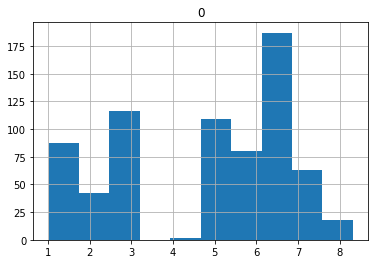

In [227]:
pd.DataFrame(preds).hist()

In [228]:
pd.DataFrame(preds).describe()

,0
count,704.000000
mean,4.750109
std,2.011480
min,1.010000
25%,2.780000
50%,5.190000
75%,6.274154
max,8.320000


In [229]:
n_subjects = 32
n_films = 40
pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
channels = [[] for i in range(n_subjects)]
for i in range(len(preds)):
    pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += np.array(preds)[i]
    num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
    labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += np.array(y_test_inv)[i]
    channels[np.array(test_subj)[i] - 1].append(chans[test_ch[i] - 1])
labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
labels = np.nan_to_num(labels)
pred = np.nan_to_num(pred)
predicted = []
lbl = []
for i in range(len(labels)):
    if sum(labels[i]) != 0:
        for j in range(n_films):
            if labels[i][j] != 0:
                lbl.append(labels[i][j])  
                predicted.append(pred[i][j])

In [230]:
for [l, p] in zip(lbl, predicted):
    print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))

label : 6.50 predicted: 5.65 
label : 5.63 predicted: 5.36 
label : 6.27 predicted: 1.68 
label : 7.06 predicted: 3.33 
label : 6.68 predicted: 5.68 
label : 2.78 predicted: 5.88 
label : 6.22 predicted: 6.38 
label : 6.10 predicted: 6.40 
label : 8.32 predicted: 4.10 
label : 2.36 predicted: 6.46 
label : 5.19 predicted: 5.41 
label : 1.37 predicted: 5.62 
label : 7.69 predicted: 5.47 
label : 6.03 predicted: 6.58 
label : 3.04 predicted: 4.92 
label : 1.79 predicted: 3.56 
label : 6.19 predicted: 5.36 
label : 7.08 predicted: 3.46 
label : 5.06 predicted: 6.03 
label : 1.00 predicted: 2.27 
label : 6.31 predicted: 4.05 
label : 6.40 predicted: 5.85 
label : 6.95 predicted: 3.37 
label : 1.33 predicted: 5.55 
label : 2.53 predicted: 2.18 
label : 6.18 predicted: 3.33 
label : 2.90 predicted: 6.79 
label : 6.78 predicted: 3.38 
label : 1.55 predicted: 2.84 
label : 1.00 predicted: 5.69 
label : 5.01 predicted: 6.54 
label : 7.10 predicted: 5.89 
label : 1.24 predicted: 5.92 
label : 1.

In [231]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [232]:
print('r2:', r2_score(lbl, predicted))
print('MAPE:', mean_absolute_percentage_error(lbl, predicted))
print('MAE : ', mean_absolute_error(lbl, predicted))

r2: -0.2776590339520766
MAPE: 1.0667531452659635
MAE :  2.2725919920394597


## Таблица со значениями метрик

In [238]:
data_all

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,1.484383,-0.007692,2.854492,0.314085,1.522358,0.193281,3.505953,0.742818,0.307039,0.987916,...,1.601542,0.824846,1.408808,12.906891,0.803484,0.999977,1,1,1,7.83
1,1.556828,-0.001690,2.903278,0.284743,1.503775,0.211067,3.861489,0.761305,0.302559,0.988604,...,1.616463,0.844913,1.465049,12.906891,0.818364,1.000000,1,1,2,7.83
2,1.585217,0.004273,2.883640,0.289118,1.580589,0.229094,3.410764,0.784833,0.303804,0.988171,...,1.601818,0.841968,1.506933,12.906891,0.811917,0.999577,1,1,3,7.83
3,1.636149,0.008965,2.644221,0.280260,1.584523,0.216789,3.376908,0.783152,0.313923,0.987522,...,1.614030,0.847914,1.555134,12.906891,0.817692,0.999983,1,1,4,7.83
4,1.829717,0.005163,3.007254,0.205972,1.549235,0.241468,3.858740,0.853737,0.290795,0.987040,...,1.630649,0.895176,1.777740,12.906891,0.843627,0.999926,1,1,5,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19561,1.728836,-0.004444,2.797080,0.261082,1.665462,0.247139,3.471880,0.821806,0.317735,0.988659,...,1.606150,0.860561,1.656421,12.906891,0.831258,0.999998,32,40,14,1.88
19562,1.594800,-0.055830,3.747132,0.335007,2.043562,0.331776,3.409042,0.830209,0.259786,0.987347,...,1.596723,0.810083,1.472948,12.906891,0.760206,0.999763,32,40,15,1.88
19563,1.787636,-0.016016,4.458728,0.209458,1.710900,0.373061,3.496581,0.887349,0.231478,0.986785,...,1.601611,0.893062,1.693747,12.906891,0.794703,0.999678,32,40,16,1.88
19564,1.355464,-0.034910,3.873512,0.439351,2.366161,0.372195,2.859996,0.762985,0.248196,0.987487,...,1.547087,0.730611,1.198213,12.906891,0.711782,0.999992,32,40,17,1.88


In [233]:
from tqdm import tqdm_notebook

In [235]:
models = ['CatboostRegressor']
metrics = ['MAPE', 'MAE', 'R2']
formes = ['inverted', 'average']
columns = [
    np.array([models[i] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([metrics[j] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([formes[k] for i in range(1) for j in range(3) for k in range(2)]),
]

In [240]:
result = pd.DataFrame()
grid_res = []
n_films = 40
n_subjects = 32
for film in tqdm_notebook(range(1, n_films + 1)):
    df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test_inv = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    
    X_train = X_train.drop(['film', 'Subj', 'labels'], axis=1)
    X_test = X_test.drop(['film', 'Subj', 'labels'], axis=1)
    
    qt_train = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
    qt_test = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))
    
    train_pool = Pool(X_train, y_train, cat_features=['ch'])
    test_pool = Pool(X_test, y_test, cat_features=['ch'])
    model = CatBoostRegressor()
    model.fit(train_pool)
    y_pred = model.predict(test_pool)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('CatboostRegressor', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('CatboostRegressor', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('CatboostRegressor', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    
    pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
    num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
    labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
    lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
    channels = [[] for i in range(n_subjects)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += preds[i]
        num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
        labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += y_test_inv[i]
        channels[np.array(test_subj)[i] - 1].append(chans[test_ch[i] - 1])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(n_films):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])

    df[('CatboostRegressor', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('CatboostRegressor', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('CatboostRegressor', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    result = pd.concat([result, df], axis=0)

  0%|          | 0/40 [00:00<?, ?it/s]

Learning rate set to 0.065231
0:	learn: 1.7832179	total: 37.8ms	remaining: 37.8s
1:	learn: 1.7815251	total: 72.4ms	remaining: 36.1s
2:	learn: 1.7797815	total: 110ms	remaining: 36.4s
3:	learn: 1.7782950	total: 145ms	remaining: 36.2s
4:	learn: 1.7762266	total: 179ms	remaining: 35.7s
5:	learn: 1.7748239	total: 219ms	remaining: 36.2s
6:	learn: 1.7728046	total: 258ms	remaining: 36.6s
7:	learn: 1.7710283	total: 300ms	remaining: 37.2s
8:	learn: 1.7699200	total: 342ms	remaining: 37.6s
9:	learn: 1.7686340	total: 385ms	remaining: 38.2s
10:	learn: 1.7671168	total: 429ms	remaining: 38.6s
11:	learn: 1.7655667	total: 476ms	remaining: 39.2s
12:	learn: 1.7643008	total: 518ms	remaining: 39.4s
13:	learn: 1.7628415	total: 559ms	remaining: 39.3s
14:	learn: 1.7615686	total: 596ms	remaining: 39.2s
15:	learn: 1.7607521	total: 632ms	remaining: 38.9s
16:	learn: 1.7593457	total: 664ms	remaining: 38.4s
17:	learn: 1.7582266	total: 702ms	remaining: 38.3s
18:	learn: 1.7571677	total: 739ms	remaining: 38.2s
19:	learn

166:	learn: 1.6592227	total: 6.56s	remaining: 32.7s
167:	learn: 1.6583600	total: 6.61s	remaining: 32.7s
168:	learn: 1.6574749	total: 6.64s	remaining: 32.7s
169:	learn: 1.6570156	total: 6.68s	remaining: 32.6s
170:	learn: 1.6565470	total: 6.72s	remaining: 32.6s
171:	learn: 1.6559843	total: 6.76s	remaining: 32.5s
172:	learn: 1.6554580	total: 6.79s	remaining: 32.5s
173:	learn: 1.6554543	total: 6.8s	remaining: 32.3s
174:	learn: 1.6554049	total: 6.83s	remaining: 32.2s
175:	learn: 1.6546913	total: 6.86s	remaining: 32.1s
176:	learn: 1.6541027	total: 6.9s	remaining: 32.1s
177:	learn: 1.6532912	total: 6.94s	remaining: 32.1s
178:	learn: 1.6524808	total: 6.98s	remaining: 32s
179:	learn: 1.6520156	total: 7.03s	remaining: 32s
180:	learn: 1.6515852	total: 7.07s	remaining: 32s
181:	learn: 1.6512372	total: 7.11s	remaining: 32s
182:	learn: 1.6506505	total: 7.15s	remaining: 31.9s
183:	learn: 1.6501770	total: 7.19s	remaining: 31.9s
184:	learn: 1.6500308	total: 7.23s	remaining: 31.9s
185:	learn: 1.6494742	

330:	learn: 1.5792420	total: 12.9s	remaining: 26.1s
331:	learn: 1.5790176	total: 13s	remaining: 26.1s
332:	learn: 1.5785338	total: 13s	remaining: 26.1s
333:	learn: 1.5779146	total: 13.1s	remaining: 26.1s
334:	learn: 1.5767564	total: 13.1s	remaining: 26s
335:	learn: 1.5762989	total: 13.2s	remaining: 26s
336:	learn: 1.5757991	total: 13.2s	remaining: 26s
337:	learn: 1.5751994	total: 13.2s	remaining: 25.9s
338:	learn: 1.5745737	total: 13.3s	remaining: 25.9s
339:	learn: 1.5741289	total: 13.3s	remaining: 25.8s
340:	learn: 1.5735623	total: 13.3s	remaining: 25.8s
341:	learn: 1.5730688	total: 13.4s	remaining: 25.8s
342:	learn: 1.5727031	total: 13.4s	remaining: 25.7s
343:	learn: 1.5723354	total: 13.5s	remaining: 25.7s
344:	learn: 1.5720050	total: 13.5s	remaining: 25.6s
345:	learn: 1.5716897	total: 13.5s	remaining: 25.6s
346:	learn: 1.5714713	total: 13.6s	remaining: 25.5s
347:	learn: 1.5710627	total: 13.6s	remaining: 25.5s
348:	learn: 1.5706043	total: 13.6s	remaining: 25.5s
349:	learn: 1.5702578	

490:	learn: 1.5104522	total: 19.2s	remaining: 20s
491:	learn: 1.5101013	total: 19.3s	remaining: 19.9s
492:	learn: 1.5100012	total: 19.3s	remaining: 19.9s
493:	learn: 1.5096273	total: 19.4s	remaining: 19.8s
494:	learn: 1.5092942	total: 19.4s	remaining: 19.8s
495:	learn: 1.5090769	total: 19.5s	remaining: 19.8s
496:	learn: 1.5090174	total: 19.5s	remaining: 19.7s
497:	learn: 1.5087484	total: 19.5s	remaining: 19.7s
498:	learn: 1.5082245	total: 19.6s	remaining: 19.7s
499:	learn: 1.5077512	total: 19.6s	remaining: 19.6s
500:	learn: 1.5072045	total: 19.7s	remaining: 19.6s
501:	learn: 1.5067482	total: 19.7s	remaining: 19.6s
502:	learn: 1.5065370	total: 19.8s	remaining: 19.5s
503:	learn: 1.5062796	total: 19.8s	remaining: 19.5s
504:	learn: 1.5059777	total: 19.8s	remaining: 19.5s
505:	learn: 1.5057352	total: 19.9s	remaining: 19.4s
506:	learn: 1.5054899	total: 19.9s	remaining: 19.4s
507:	learn: 1.5051691	total: 20s	remaining: 19.3s
508:	learn: 1.5047292	total: 20s	remaining: 19.3s
509:	learn: 1.5043

649:	learn: 1.4543048	total: 25.7s	remaining: 13.8s
650:	learn: 1.4539886	total: 25.7s	remaining: 13.8s
651:	learn: 1.4536404	total: 25.8s	remaining: 13.7s
652:	learn: 1.4535250	total: 25.8s	remaining: 13.7s
653:	learn: 1.4531444	total: 25.8s	remaining: 13.7s
654:	learn: 1.4528453	total: 25.9s	remaining: 13.6s
655:	learn: 1.4524999	total: 25.9s	remaining: 13.6s
656:	learn: 1.4521882	total: 25.9s	remaining: 13.5s
657:	learn: 1.4517628	total: 26s	remaining: 13.5s
658:	learn: 1.4515055	total: 26s	remaining: 13.5s
659:	learn: 1.4513224	total: 26s	remaining: 13.4s
660:	learn: 1.4510014	total: 26.1s	remaining: 13.4s
661:	learn: 1.4506891	total: 26.1s	remaining: 13.3s
662:	learn: 1.4504039	total: 26.2s	remaining: 13.3s
663:	learn: 1.4500697	total: 26.2s	remaining: 13.3s
664:	learn: 1.4498117	total: 26.3s	remaining: 13.2s
665:	learn: 1.4496128	total: 26.3s	remaining: 13.2s
666:	learn: 1.4491803	total: 26.3s	remaining: 13.1s
667:	learn: 1.4490411	total: 26.4s	remaining: 13.1s
668:	learn: 1.4486

811:	learn: 1.4046096	total: 32.2s	remaining: 7.45s
812:	learn: 1.4043014	total: 32.2s	remaining: 7.42s
813:	learn: 1.4041235	total: 32.3s	remaining: 7.38s
814:	learn: 1.4038728	total: 32.3s	remaining: 7.34s
815:	learn: 1.4036741	total: 32.4s	remaining: 7.3s
816:	learn: 1.4033637	total: 32.4s	remaining: 7.26s
817:	learn: 1.4029953	total: 32.4s	remaining: 7.22s
818:	learn: 1.4023411	total: 32.5s	remaining: 7.18s
819:	learn: 1.4020211	total: 32.5s	remaining: 7.14s
820:	learn: 1.4018599	total: 32.6s	remaining: 7.1s
821:	learn: 1.4016596	total: 32.6s	remaining: 7.06s
822:	learn: 1.4015066	total: 32.6s	remaining: 7.02s
823:	learn: 1.4011389	total: 32.7s	remaining: 6.98s
824:	learn: 1.4010153	total: 32.7s	remaining: 6.94s
825:	learn: 1.4008530	total: 32.8s	remaining: 6.9s
826:	learn: 1.4004539	total: 32.8s	remaining: 6.86s
827:	learn: 1.4001937	total: 32.9s	remaining: 6.82s
828:	learn: 1.3998845	total: 32.9s	remaining: 6.79s
829:	learn: 1.3994871	total: 32.9s	remaining: 6.75s
830:	learn: 1.3

971:	learn: 1.3567276	total: 38.7s	remaining: 1.11s
972:	learn: 1.3563594	total: 38.8s	remaining: 1.07s
973:	learn: 1.3561809	total: 38.8s	remaining: 1.03s
974:	learn: 1.3559338	total: 38.8s	remaining: 996ms
975:	learn: 1.3555931	total: 38.9s	remaining: 956ms
976:	learn: 1.3552954	total: 38.9s	remaining: 917ms
977:	learn: 1.3550476	total: 39s	remaining: 877ms
978:	learn: 1.3547648	total: 39s	remaining: 837ms
979:	learn: 1.3544914	total: 39.1s	remaining: 797ms
980:	learn: 1.3543784	total: 39.1s	remaining: 757ms
981:	learn: 1.3542566	total: 39.2s	remaining: 718ms
982:	learn: 1.3537170	total: 39.2s	remaining: 678ms
983:	learn: 1.3534425	total: 39.2s	remaining: 638ms
984:	learn: 1.3531504	total: 39.3s	remaining: 598ms
985:	learn: 1.3530156	total: 39.3s	remaining: 558ms
986:	learn: 1.3526943	total: 39.4s	remaining: 519ms
987:	learn: 1.3524526	total: 39.4s	remaining: 479ms
988:	learn: 1.3521368	total: 39.5s	remaining: 439ms
989:	learn: 1.3518975	total: 39.5s	remaining: 399ms
990:	learn: 1.35

134:	learn: 1.6581296	total: 5.77s	remaining: 36.9s
135:	learn: 1.6574038	total: 5.81s	remaining: 36.9s
136:	learn: 1.6569752	total: 5.84s	remaining: 36.8s
137:	learn: 1.6564143	total: 5.88s	remaining: 36.7s
138:	learn: 1.6560369	total: 5.92s	remaining: 36.7s
139:	learn: 1.6555478	total: 5.96s	remaining: 36.6s
140:	learn: 1.6547899	total: 6s	remaining: 36.5s
141:	learn: 1.6544928	total: 6.03s	remaining: 36.4s
142:	learn: 1.6540769	total: 6.07s	remaining: 36.4s
143:	learn: 1.6533101	total: 6.1s	remaining: 36.3s
144:	learn: 1.6528648	total: 6.14s	remaining: 36.2s
145:	learn: 1.6521393	total: 6.18s	remaining: 36.1s
146:	learn: 1.6516384	total: 6.22s	remaining: 36.1s
147:	learn: 1.6512879	total: 6.26s	remaining: 36s
148:	learn: 1.6510566	total: 6.3s	remaining: 36s
149:	learn: 1.6505708	total: 6.35s	remaining: 36s
150:	learn: 1.6501697	total: 6.39s	remaining: 35.9s
151:	learn: 1.6494905	total: 6.44s	remaining: 35.9s
152:	learn: 1.6489692	total: 6.48s	remaining: 35.9s
153:	learn: 1.6484509	t

297:	learn: 1.5715060	total: 12.6s	remaining: 29.6s
298:	learn: 1.5710568	total: 12.6s	remaining: 29.5s
299:	learn: 1.5706292	total: 12.6s	remaining: 29.5s
300:	learn: 1.5702011	total: 12.7s	remaining: 29.4s
301:	learn: 1.5699168	total: 12.7s	remaining: 29.4s
302:	learn: 1.5694963	total: 12.7s	remaining: 29.3s
303:	learn: 1.5689766	total: 12.8s	remaining: 29.2s
304:	learn: 1.5685058	total: 12.8s	remaining: 29.2s
305:	learn: 1.5675092	total: 12.8s	remaining: 29.1s
306:	learn: 1.5671353	total: 12.9s	remaining: 29.1s
307:	learn: 1.5668756	total: 12.9s	remaining: 29s
308:	learn: 1.5665834	total: 12.9s	remaining: 28.9s
309:	learn: 1.5658991	total: 13s	remaining: 28.9s
310:	learn: 1.5650928	total: 13s	remaining: 28.9s
311:	learn: 1.5646853	total: 13.1s	remaining: 28.8s
312:	learn: 1.5641996	total: 13.1s	remaining: 28.7s
313:	learn: 1.5637924	total: 13.1s	remaining: 28.7s
314:	learn: 1.5631463	total: 13.2s	remaining: 28.6s
315:	learn: 1.5627627	total: 13.2s	remaining: 28.6s
316:	learn: 1.5626

456:	learn: 1.5058303	total: 18.7s	remaining: 22.3s
457:	learn: 1.5055613	total: 18.8s	remaining: 22.2s
458:	learn: 1.5050723	total: 18.8s	remaining: 22.2s
459:	learn: 1.5047096	total: 18.9s	remaining: 22.1s
460:	learn: 1.5045922	total: 18.9s	remaining: 22.1s
461:	learn: 1.5040423	total: 18.9s	remaining: 22.1s
462:	learn: 1.5034600	total: 19s	remaining: 22s
463:	learn: 1.5032628	total: 19s	remaining: 22s
464:	learn: 1.5029317	total: 19.1s	remaining: 21.9s
465:	learn: 1.5024819	total: 19.1s	remaining: 21.9s
466:	learn: 1.5021811	total: 19.2s	remaining: 21.9s
467:	learn: 1.5015676	total: 19.2s	remaining: 21.8s
468:	learn: 1.5014710	total: 19.2s	remaining: 21.8s
469:	learn: 1.5009073	total: 19.3s	remaining: 21.7s
470:	learn: 1.5005185	total: 19.3s	remaining: 21.7s
471:	learn: 1.4999276	total: 19.4s	remaining: 21.6s
472:	learn: 1.4992782	total: 19.4s	remaining: 21.6s
473:	learn: 1.4991025	total: 19.4s	remaining: 21.6s
474:	learn: 1.4986410	total: 19.5s	remaining: 21.5s
475:	learn: 1.498182

615:	learn: 1.4485681	total: 25s	remaining: 15.6s
616:	learn: 1.4483413	total: 25.1s	remaining: 15.6s
617:	learn: 1.4478243	total: 25.1s	remaining: 15.5s
618:	learn: 1.4474915	total: 25.1s	remaining: 15.5s
619:	learn: 1.4471807	total: 25.2s	remaining: 15.4s
620:	learn: 1.4469601	total: 25.2s	remaining: 15.4s
621:	learn: 1.4464615	total: 25.3s	remaining: 15.4s
622:	learn: 1.4461785	total: 25.3s	remaining: 15.3s
623:	learn: 1.4458602	total: 25.3s	remaining: 15.3s
624:	learn: 1.4455928	total: 25.4s	remaining: 15.2s
625:	learn: 1.4452011	total: 25.4s	remaining: 15.2s
626:	learn: 1.4450698	total: 25.5s	remaining: 15.2s
627:	learn: 1.4447503	total: 25.5s	remaining: 15.1s
628:	learn: 1.4444220	total: 25.6s	remaining: 15.1s
629:	learn: 1.4441680	total: 25.6s	remaining: 15s
630:	learn: 1.4437991	total: 25.6s	remaining: 15s
631:	learn: 1.4435110	total: 25.7s	remaining: 15s
632:	learn: 1.4431205	total: 25.7s	remaining: 14.9s
633:	learn: 1.4428479	total: 25.8s	remaining: 14.9s
634:	learn: 1.442530

778:	learn: 1.3981437	total: 31.6s	remaining: 8.97s
779:	learn: 1.3979359	total: 31.7s	remaining: 8.93s
780:	learn: 1.3976405	total: 31.7s	remaining: 8.89s
781:	learn: 1.3973659	total: 31.7s	remaining: 8.85s
782:	learn: 1.3971881	total: 31.8s	remaining: 8.81s
783:	learn: 1.3967719	total: 31.8s	remaining: 8.77s
784:	learn: 1.3965097	total: 31.9s	remaining: 8.72s
785:	learn: 1.3963226	total: 31.9s	remaining: 8.68s
786:	learn: 1.3960783	total: 31.9s	remaining: 8.64s
787:	learn: 1.3954665	total: 32s	remaining: 8.6s
788:	learn: 1.3952405	total: 32s	remaining: 8.56s
789:	learn: 1.3948855	total: 32s	remaining: 8.52s
790:	learn: 1.3945657	total: 32.1s	remaining: 8.47s
791:	learn: 1.3941665	total: 32.1s	remaining: 8.43s
792:	learn: 1.3939030	total: 32.2s	remaining: 8.39s
793:	learn: 1.3935658	total: 32.2s	remaining: 8.35s
794:	learn: 1.3930568	total: 32.2s	remaining: 8.31s
795:	learn: 1.3927847	total: 32.3s	remaining: 8.27s
796:	learn: 1.3924409	total: 32.3s	remaining: 8.23s
797:	learn: 1.39228

941:	learn: 1.3499528	total: 38.1s	remaining: 2.35s
942:	learn: 1.3496364	total: 38.2s	remaining: 2.31s
943:	learn: 1.3492119	total: 38.2s	remaining: 2.27s
944:	learn: 1.3490429	total: 38.3s	remaining: 2.23s
945:	learn: 1.3487948	total: 38.3s	remaining: 2.19s
946:	learn: 1.3483807	total: 38.3s	remaining: 2.15s
947:	learn: 1.3481564	total: 38.4s	remaining: 2.1s
948:	learn: 1.3479384	total: 38.4s	remaining: 2.06s
949:	learn: 1.3476988	total: 38.5s	remaining: 2.02s
950:	learn: 1.3474438	total: 38.5s	remaining: 1.98s
951:	learn: 1.3470867	total: 38.6s	remaining: 1.94s
952:	learn: 1.3467074	total: 38.6s	remaining: 1.9s
953:	learn: 1.3463605	total: 38.6s	remaining: 1.86s
954:	learn: 1.3462958	total: 38.7s	remaining: 1.82s
955:	learn: 1.3460135	total: 38.7s	remaining: 1.78s
956:	learn: 1.3458127	total: 38.8s	remaining: 1.74s
957:	learn: 1.3454969	total: 38.8s	remaining: 1.7s
958:	learn: 1.3452393	total: 38.8s	remaining: 1.66s
959:	learn: 1.3449793	total: 38.9s	remaining: 1.62s
960:	learn: 1.3

104:	learn: 1.6648551	total: 4.23s	remaining: 36.1s
105:	learn: 1.6644154	total: 4.27s	remaining: 36s
106:	learn: 1.6635628	total: 4.32s	remaining: 36s
107:	learn: 1.6630786	total: 4.36s	remaining: 36s
108:	learn: 1.6628521	total: 4.4s	remaining: 35.9s
109:	learn: 1.6623234	total: 4.44s	remaining: 35.9s
110:	learn: 1.6615224	total: 4.48s	remaining: 35.9s
111:	learn: 1.6608471	total: 4.53s	remaining: 35.9s
112:	learn: 1.6605705	total: 4.57s	remaining: 35.8s
113:	learn: 1.6596660	total: 4.61s	remaining: 35.8s
114:	learn: 1.6588773	total: 4.65s	remaining: 35.8s
115:	learn: 1.6584326	total: 4.7s	remaining: 35.8s
116:	learn: 1.6579233	total: 4.74s	remaining: 35.8s
117:	learn: 1.6576252	total: 4.78s	remaining: 35.8s
118:	learn: 1.6573273	total: 4.82s	remaining: 35.7s
119:	learn: 1.6569869	total: 4.86s	remaining: 35.6s
120:	learn: 1.6562507	total: 4.9s	remaining: 35.6s
121:	learn: 1.6559782	total: 4.94s	remaining: 35.5s
122:	learn: 1.6554615	total: 4.97s	remaining: 35.5s
123:	learn: 1.6548504

264:	learn: 1.5774931	total: 10.6s	remaining: 29.4s
265:	learn: 1.5767095	total: 10.6s	remaining: 29.4s
266:	learn: 1.5762165	total: 10.7s	remaining: 29.3s
267:	learn: 1.5758956	total: 10.7s	remaining: 29.3s
268:	learn: 1.5754727	total: 10.8s	remaining: 29.2s
269:	learn: 1.5750032	total: 10.8s	remaining: 29.2s
270:	learn: 1.5745024	total: 10.8s	remaining: 29.2s
271:	learn: 1.5740963	total: 10.9s	remaining: 29.1s
272:	learn: 1.5734458	total: 10.9s	remaining: 29.1s
273:	learn: 1.5728883	total: 10.9s	remaining: 29s
274:	learn: 1.5719447	total: 11s	remaining: 29s
275:	learn: 1.5712611	total: 11s	remaining: 29s
276:	learn: 1.5707040	total: 11.1s	remaining: 28.9s
277:	learn: 1.5702384	total: 11.1s	remaining: 28.9s
278:	learn: 1.5698504	total: 11.2s	remaining: 28.9s
279:	learn: 1.5691366	total: 11.2s	remaining: 28.8s
280:	learn: 1.5685502	total: 11.3s	remaining: 28.8s
281:	learn: 1.5680757	total: 11.3s	remaining: 28.8s
282:	learn: 1.5677299	total: 11.3s	remaining: 28.7s
283:	learn: 1.5670507	

428:	learn: 1.5051466	total: 17.4s	remaining: 23.1s
429:	learn: 1.5047260	total: 17.4s	remaining: 23.1s
430:	learn: 1.5044390	total: 17.4s	remaining: 23s
431:	learn: 1.5042510	total: 17.5s	remaining: 23s
432:	learn: 1.5037992	total: 17.5s	remaining: 22.9s
433:	learn: 1.5033849	total: 17.5s	remaining: 22.9s
434:	learn: 1.5031485	total: 17.6s	remaining: 22.8s
435:	learn: 1.5029131	total: 17.6s	remaining: 22.8s
436:	learn: 1.5024622	total: 17.7s	remaining: 22.7s
437:	learn: 1.5023502	total: 17.7s	remaining: 22.7s
438:	learn: 1.5018635	total: 17.7s	remaining: 22.6s
439:	learn: 1.5013693	total: 17.8s	remaining: 22.6s
440:	learn: 1.5010615	total: 17.8s	remaining: 22.6s
441:	learn: 1.5006857	total: 17.8s	remaining: 22.5s
442:	learn: 1.5004740	total: 17.9s	remaining: 22.5s
443:	learn: 1.4999518	total: 17.9s	remaining: 22.4s
444:	learn: 1.4993506	total: 18s	remaining: 22.4s
445:	learn: 1.4990789	total: 18s	remaining: 22.4s
446:	learn: 1.4987451	total: 18s	remaining: 22.3s
447:	learn: 1.4982014	

591:	learn: 1.4474441	total: 23.9s	remaining: 16.5s
592:	learn: 1.4472505	total: 23.9s	remaining: 16.4s
593:	learn: 1.4466386	total: 24s	remaining: 16.4s
594:	learn: 1.4462046	total: 24s	remaining: 16.3s
595:	learn: 1.4459949	total: 24.1s	remaining: 16.3s
596:	learn: 1.4457381	total: 24.1s	remaining: 16.3s
597:	learn: 1.4453300	total: 24.1s	remaining: 16.2s
598:	learn: 1.4449838	total: 24.2s	remaining: 16.2s
599:	learn: 1.4447318	total: 24.2s	remaining: 16.1s
600:	learn: 1.4442287	total: 24.2s	remaining: 16.1s
601:	learn: 1.4437650	total: 24.3s	remaining: 16s
602:	learn: 1.4432843	total: 24.3s	remaining: 16s
603:	learn: 1.4427779	total: 24.4s	remaining: 16s
604:	learn: 1.4425090	total: 24.4s	remaining: 15.9s
605:	learn: 1.4422420	total: 24.4s	remaining: 15.9s
606:	learn: 1.4419742	total: 24.5s	remaining: 15.8s
607:	learn: 1.4415785	total: 24.5s	remaining: 15.8s
608:	learn: 1.4411876	total: 24.6s	remaining: 15.8s
609:	learn: 1.4410648	total: 24.6s	remaining: 15.7s
610:	learn: 1.4407919	

755:	learn: 1.3973117	total: 30.5s	remaining: 9.86s
756:	learn: 1.3970835	total: 30.6s	remaining: 9.82s
757:	learn: 1.3970206	total: 30.6s	remaining: 9.78s
758:	learn: 1.3966318	total: 30.7s	remaining: 9.73s
759:	learn: 1.3964565	total: 30.7s	remaining: 9.69s
760:	learn: 1.3959068	total: 30.7s	remaining: 9.65s
761:	learn: 1.3956120	total: 30.8s	remaining: 9.61s
762:	learn: 1.3953451	total: 30.8s	remaining: 9.56s
763:	learn: 1.3950565	total: 30.8s	remaining: 9.53s
764:	learn: 1.3947189	total: 30.9s	remaining: 9.48s
765:	learn: 1.3943753	total: 30.9s	remaining: 9.45s
766:	learn: 1.3941251	total: 31s	remaining: 9.4s
767:	learn: 1.3936942	total: 31s	remaining: 9.37s
768:	learn: 1.3932312	total: 31s	remaining: 9.32s
769:	learn: 1.3929674	total: 31.1s	remaining: 9.29s
770:	learn: 1.3927987	total: 31.1s	remaining: 9.25s
771:	learn: 1.3925425	total: 31.2s	remaining: 9.21s
772:	learn: 1.3922849	total: 31.2s	remaining: 9.17s
773:	learn: 1.3919389	total: 31.3s	remaining: 9.13s
774:	learn: 1.39165

916:	learn: 1.3492581	total: 37.1s	remaining: 3.36s
917:	learn: 1.3490556	total: 37.1s	remaining: 3.32s
918:	learn: 1.3488489	total: 37.2s	remaining: 3.28s
919:	learn: 1.3485502	total: 37.2s	remaining: 3.24s
920:	learn: 1.3480968	total: 37.3s	remaining: 3.2s
921:	learn: 1.3475528	total: 37.3s	remaining: 3.16s
922:	learn: 1.3472511	total: 37.4s	remaining: 3.12s
923:	learn: 1.3470116	total: 37.4s	remaining: 3.08s
924:	learn: 1.3467903	total: 37.5s	remaining: 3.04s
925:	learn: 1.3464418	total: 37.5s	remaining: 3s
926:	learn: 1.3461786	total: 37.5s	remaining: 2.96s
927:	learn: 1.3458725	total: 37.6s	remaining: 2.92s
928:	learn: 1.3456440	total: 37.6s	remaining: 2.88s
929:	learn: 1.3454656	total: 37.7s	remaining: 2.83s
930:	learn: 1.3452215	total: 37.7s	remaining: 2.79s
931:	learn: 1.3448801	total: 37.8s	remaining: 2.75s
932:	learn: 1.3446975	total: 37.8s	remaining: 2.71s
933:	learn: 1.3444192	total: 37.9s	remaining: 2.67s
934:	learn: 1.3440495	total: 37.9s	remaining: 2.63s
935:	learn: 1.34

78:	learn: 1.6989472	total: 3.44s	remaining: 40.1s
79:	learn: 1.6986888	total: 3.48s	remaining: 40s
80:	learn: 1.6984581	total: 3.52s	remaining: 39.9s
81:	learn: 1.6979786	total: 3.56s	remaining: 39.8s
82:	learn: 1.6975960	total: 3.6s	remaining: 39.7s
83:	learn: 1.6966240	total: 3.64s	remaining: 39.7s
84:	learn: 1.6961850	total: 3.69s	remaining: 39.7s
85:	learn: 1.6956753	total: 3.73s	remaining: 39.6s
86:	learn: 1.6951115	total: 3.76s	remaining: 39.5s
87:	learn: 1.6943662	total: 3.8s	remaining: 39.4s
88:	learn: 1.6938242	total: 3.84s	remaining: 39.3s
89:	learn: 1.6933536	total: 3.88s	remaining: 39.2s
90:	learn: 1.6928763	total: 3.92s	remaining: 39.2s
91:	learn: 1.6925822	total: 3.97s	remaining: 39.2s
92:	learn: 1.6918882	total: 4.01s	remaining: 39.1s
93:	learn: 1.6912982	total: 4.05s	remaining: 39.1s
94:	learn: 1.6907959	total: 4.1s	remaining: 39s
95:	learn: 1.6905517	total: 4.15s	remaining: 39.1s
96:	learn: 1.6897999	total: 4.2s	remaining: 39.1s
97:	learn: 1.6892502	total: 4.24s	remai

242:	learn: 1.6114818	total: 10.4s	remaining: 32.3s
243:	learn: 1.6112482	total: 10.4s	remaining: 32.3s
244:	learn: 1.6107651	total: 10.4s	remaining: 32.2s
245:	learn: 1.6106086	total: 10.5s	remaining: 32.2s
246:	learn: 1.6102658	total: 10.5s	remaining: 32.1s
247:	learn: 1.6097123	total: 10.6s	remaining: 32.1s
248:	learn: 1.6095685	total: 10.6s	remaining: 32.1s
249:	learn: 1.6092448	total: 10.7s	remaining: 32.1s
250:	learn: 1.6085029	total: 10.7s	remaining: 32s
251:	learn: 1.6081498	total: 10.8s	remaining: 32s
252:	learn: 1.6078051	total: 10.8s	remaining: 32s
253:	learn: 1.6074100	total: 10.9s	remaining: 32s
254:	learn: 1.6067883	total: 10.9s	remaining: 31.9s
255:	learn: 1.6058763	total: 11s	remaining: 31.9s
256:	learn: 1.6054041	total: 11s	remaining: 31.8s
257:	learn: 1.6053118	total: 11s	remaining: 31.7s
258:	learn: 1.6048816	total: 11.1s	remaining: 31.7s
259:	learn: 1.6045300	total: 11.1s	remaining: 31.6s
260:	learn: 1.6043868	total: 11.2s	remaining: 31.6s
261:	learn: 1.6038338	tota

403:	learn: 1.5355223	total: 17.3s	remaining: 25.5s
404:	learn: 1.5353689	total: 17.3s	remaining: 25.4s
405:	learn: 1.5346581	total: 17.3s	remaining: 25.4s
406:	learn: 1.5342344	total: 17.4s	remaining: 25.3s
407:	learn: 1.5339597	total: 17.4s	remaining: 25.3s
408:	learn: 1.5336321	total: 17.4s	remaining: 25.2s
409:	learn: 1.5332413	total: 17.5s	remaining: 25.2s
410:	learn: 1.5332153	total: 17.5s	remaining: 25.1s
411:	learn: 1.5330266	total: 17.6s	remaining: 25.1s
412:	learn: 1.5328188	total: 17.6s	remaining: 25s
413:	learn: 1.5322251	total: 17.6s	remaining: 25s
414:	learn: 1.5318059	total: 17.7s	remaining: 24.9s
415:	learn: 1.5317725	total: 17.7s	remaining: 24.9s
416:	learn: 1.5311262	total: 17.8s	remaining: 24.8s
417:	learn: 1.5307116	total: 17.8s	remaining: 24.8s
418:	learn: 1.5299977	total: 17.8s	remaining: 24.7s
419:	learn: 1.5295839	total: 17.9s	remaining: 24.7s
420:	learn: 1.5291390	total: 17.9s	remaining: 24.7s
421:	learn: 1.5285836	total: 18s	remaining: 24.6s
422:	learn: 1.5279

567:	learn: 1.4740305	total: 24.2s	remaining: 18.4s
568:	learn: 1.4734113	total: 24.2s	remaining: 18.4s
569:	learn: 1.4730034	total: 24.3s	remaining: 18.3s
570:	learn: 1.4729739	total: 24.3s	remaining: 18.3s
571:	learn: 1.4727677	total: 24.4s	remaining: 18.2s
572:	learn: 1.4724580	total: 24.4s	remaining: 18.2s
573:	learn: 1.4721340	total: 24.4s	remaining: 18.1s
574:	learn: 1.4718520	total: 24.5s	remaining: 18.1s
575:	learn: 1.4714339	total: 24.5s	remaining: 18s
576:	learn: 1.4712300	total: 24.6s	remaining: 18s
577:	learn: 1.4709453	total: 24.6s	remaining: 18s
578:	learn: 1.4705320	total: 24.6s	remaining: 17.9s
579:	learn: 1.4699429	total: 24.7s	remaining: 17.9s
580:	learn: 1.4695065	total: 24.7s	remaining: 17.8s
581:	learn: 1.4691531	total: 24.7s	remaining: 17.8s
582:	learn: 1.4687863	total: 24.8s	remaining: 17.7s
583:	learn: 1.4684632	total: 24.8s	remaining: 17.7s
584:	learn: 1.4681226	total: 24.8s	remaining: 17.6s
585:	learn: 1.4677765	total: 24.9s	remaining: 17.6s
586:	learn: 1.4675

729:	learn: 1.4192187	total: 31s	remaining: 11.5s
730:	learn: 1.4189035	total: 31.1s	remaining: 11.4s
731:	learn: 1.4185264	total: 31.1s	remaining: 11.4s
732:	learn: 1.4182817	total: 31.2s	remaining: 11.3s
733:	learn: 1.4181228	total: 31.2s	remaining: 11.3s
734:	learn: 1.4180336	total: 31.2s	remaining: 11.3s
735:	learn: 1.4173101	total: 31.3s	remaining: 11.2s
736:	learn: 1.4168737	total: 31.3s	remaining: 11.2s
737:	learn: 1.4166226	total: 31.3s	remaining: 11.1s
738:	learn: 1.4163486	total: 31.4s	remaining: 11.1s
739:	learn: 1.4161339	total: 31.4s	remaining: 11s
740:	learn: 1.4157438	total: 31.5s	remaining: 11s
741:	learn: 1.4154646	total: 31.5s	remaining: 11s
742:	learn: 1.4154087	total: 31.5s	remaining: 10.9s
743:	learn: 1.4151315	total: 31.6s	remaining: 10.9s
744:	learn: 1.4149327	total: 31.6s	remaining: 10.8s
745:	learn: 1.4145181	total: 31.7s	remaining: 10.8s
746:	learn: 1.4141707	total: 31.7s	remaining: 10.7s
747:	learn: 1.4137676	total: 31.7s	remaining: 10.7s
748:	learn: 1.413506

890:	learn: 1.3709189	total: 37.9s	remaining: 4.63s
891:	learn: 1.3708029	total: 37.9s	remaining: 4.59s
892:	learn: 1.3705552	total: 37.9s	remaining: 4.55s
893:	learn: 1.3701763	total: 38s	remaining: 4.5s
894:	learn: 1.3700132	total: 38s	remaining: 4.46s
895:	learn: 1.3697392	total: 38.1s	remaining: 4.42s
896:	learn: 1.3694614	total: 38.1s	remaining: 4.38s
897:	learn: 1.3691987	total: 38.2s	remaining: 4.33s
898:	learn: 1.3690023	total: 38.2s	remaining: 4.29s
899:	learn: 1.3688291	total: 38.2s	remaining: 4.25s
900:	learn: 1.3682633	total: 38.3s	remaining: 4.21s
901:	learn: 1.3679844	total: 38.4s	remaining: 4.17s
902:	learn: 1.3678034	total: 38.4s	remaining: 4.12s
903:	learn: 1.3674959	total: 38.4s	remaining: 4.08s
904:	learn: 1.3671916	total: 38.5s	remaining: 4.04s
905:	learn: 1.3671576	total: 38.5s	remaining: 4s
906:	learn: 1.3668549	total: 38.6s	remaining: 3.96s
907:	learn: 1.3663959	total: 38.6s	remaining: 3.91s
908:	learn: 1.3662279	total: 38.7s	remaining: 3.87s
909:	learn: 1.365939

52:	learn: 1.6989106	total: 2.32s	remaining: 41.4s
53:	learn: 1.6981289	total: 2.36s	remaining: 41.3s
54:	learn: 1.6968871	total: 2.4s	remaining: 41.3s
55:	learn: 1.6959866	total: 2.44s	remaining: 41.2s
56:	learn: 1.6952739	total: 2.48s	remaining: 41.1s
57:	learn: 1.6945941	total: 2.52s	remaining: 41s
58:	learn: 1.6942444	total: 2.56s	remaining: 40.9s
59:	learn: 1.6935196	total: 2.6s	remaining: 40.8s
60:	learn: 1.6924101	total: 2.64s	remaining: 40.6s
61:	learn: 1.6917102	total: 2.68s	remaining: 40.5s
62:	learn: 1.6904465	total: 2.72s	remaining: 40.4s
63:	learn: 1.6897587	total: 2.75s	remaining: 40.3s
64:	learn: 1.6888953	total: 2.8s	remaining: 40.3s
65:	learn: 1.6884469	total: 2.85s	remaining: 40.3s
66:	learn: 1.6883142	total: 2.88s	remaining: 40.1s
67:	learn: 1.6879670	total: 2.92s	remaining: 40s
68:	learn: 1.6870259	total: 2.96s	remaining: 39.9s
69:	learn: 1.6861055	total: 3s	remaining: 39.9s
70:	learn: 1.6854691	total: 3.05s	remaining: 39.9s
71:	learn: 1.6846108	total: 3.1s	remainin

217:	learn: 1.6070328	total: 9s	remaining: 32.3s
218:	learn: 1.6061433	total: 9.04s	remaining: 32.2s
219:	learn: 1.6055325	total: 9.07s	remaining: 32.2s
220:	learn: 1.6048328	total: 9.11s	remaining: 32.1s
221:	learn: 1.6041820	total: 9.15s	remaining: 32.1s
222:	learn: 1.6034770	total: 9.19s	remaining: 32s
223:	learn: 1.6030379	total: 9.23s	remaining: 32s
224:	learn: 1.6022425	total: 9.26s	remaining: 31.9s
225:	learn: 1.6018601	total: 9.3s	remaining: 31.9s
226:	learn: 1.6013493	total: 9.34s	remaining: 31.8s
227:	learn: 1.6009329	total: 9.38s	remaining: 31.8s
228:	learn: 1.6003118	total: 9.43s	remaining: 31.8s
229:	learn: 1.5993330	total: 9.48s	remaining: 31.7s
230:	learn: 1.5992280	total: 9.52s	remaining: 31.7s
231:	learn: 1.5985122	total: 9.57s	remaining: 31.7s
232:	learn: 1.5975095	total: 9.62s	remaining: 31.7s
233:	learn: 1.5971954	total: 9.66s	remaining: 31.6s
234:	learn: 1.5970515	total: 9.7s	remaining: 31.6s
235:	learn: 1.5964152	total: 9.74s	remaining: 31.5s
236:	learn: 1.5960726

380:	learn: 1.5302228	total: 15.8s	remaining: 25.6s
381:	learn: 1.5297548	total: 15.8s	remaining: 25.6s
382:	learn: 1.5297472	total: 15.9s	remaining: 25.5s
383:	learn: 1.5293231	total: 15.9s	remaining: 25.5s
384:	learn: 1.5290454	total: 15.9s	remaining: 25.5s
385:	learn: 1.5286398	total: 16s	remaining: 25.4s
386:	learn: 1.5281480	total: 16s	remaining: 25.4s
387:	learn: 1.5276230	total: 16s	remaining: 25.3s
388:	learn: 1.5275832	total: 16.1s	remaining: 25.3s
389:	learn: 1.5272621	total: 16.1s	remaining: 25.2s
390:	learn: 1.5265973	total: 16.2s	remaining: 25.2s
391:	learn: 1.5263287	total: 16.2s	remaining: 25.2s
392:	learn: 1.5258501	total: 16.3s	remaining: 25.1s
393:	learn: 1.5255277	total: 16.3s	remaining: 25.1s
394:	learn: 1.5250529	total: 16.4s	remaining: 25s
395:	learn: 1.5245029	total: 16.4s	remaining: 25s
396:	learn: 1.5244950	total: 16.4s	remaining: 25s
397:	learn: 1.5240942	total: 16.5s	remaining: 24.9s
398:	learn: 1.5237882	total: 16.5s	remaining: 24.9s
399:	learn: 1.5230745	to

539:	learn: 1.4694300	total: 22.4s	remaining: 19.1s
540:	learn: 1.4689776	total: 22.4s	remaining: 19s
541:	learn: 1.4686451	total: 22.5s	remaining: 19s
542:	learn: 1.4682660	total: 22.5s	remaining: 18.9s
543:	learn: 1.4679316	total: 22.5s	remaining: 18.9s
544:	learn: 1.4679282	total: 22.6s	remaining: 18.9s
545:	learn: 1.4675896	total: 22.6s	remaining: 18.8s
546:	learn: 1.4671779	total: 22.7s	remaining: 18.8s
547:	learn: 1.4669763	total: 22.7s	remaining: 18.7s
548:	learn: 1.4669147	total: 22.8s	remaining: 18.7s
549:	learn: 1.4665012	total: 22.8s	remaining: 18.7s
550:	learn: 1.4663009	total: 22.8s	remaining: 18.6s
551:	learn: 1.4660046	total: 22.9s	remaining: 18.6s
552:	learn: 1.4656352	total: 22.9s	remaining: 18.5s
553:	learn: 1.4654146	total: 23s	remaining: 18.5s
554:	learn: 1.4648482	total: 23s	remaining: 18.5s
555:	learn: 1.4644186	total: 23.1s	remaining: 18.4s
556:	learn: 1.4639837	total: 23.1s	remaining: 18.4s
557:	learn: 1.4635107	total: 23.2s	remaining: 18.3s
558:	learn: 1.462972

698:	learn: 1.4172814	total: 28.9s	remaining: 12.5s
699:	learn: 1.4169498	total: 29s	remaining: 12.4s
700:	learn: 1.4167673	total: 29s	remaining: 12.4s
701:	learn: 1.4165310	total: 29s	remaining: 12.3s
702:	learn: 1.4161794	total: 29.1s	remaining: 12.3s
703:	learn: 1.4157168	total: 29.1s	remaining: 12.2s
704:	learn: 1.4154688	total: 29.2s	remaining: 12.2s
705:	learn: 1.4152649	total: 29.2s	remaining: 12.2s
706:	learn: 1.4151485	total: 29.2s	remaining: 12.1s
707:	learn: 1.4148507	total: 29.3s	remaining: 12.1s
708:	learn: 1.4148399	total: 29.3s	remaining: 12s
709:	learn: 1.4144177	total: 29.4s	remaining: 12s
710:	learn: 1.4141967	total: 29.4s	remaining: 11.9s
711:	learn: 1.4139747	total: 29.4s	remaining: 11.9s
712:	learn: 1.4138331	total: 29.5s	remaining: 11.9s
713:	learn: 1.4132486	total: 29.5s	remaining: 11.8s
714:	learn: 1.4126932	total: 29.6s	remaining: 11.8s
715:	learn: 1.4122706	total: 29.6s	remaining: 11.7s
716:	learn: 1.4119610	total: 29.7s	remaining: 11.7s
717:	learn: 1.4115727	

861:	learn: 1.3689415	total: 35.7s	remaining: 5.71s
862:	learn: 1.3686998	total: 35.7s	remaining: 5.67s
863:	learn: 1.3681942	total: 35.7s	remaining: 5.63s
864:	learn: 1.3679692	total: 35.8s	remaining: 5.58s
865:	learn: 1.3676918	total: 35.8s	remaining: 5.54s
866:	learn: 1.3673745	total: 35.9s	remaining: 5.5s
867:	learn: 1.3670378	total: 35.9s	remaining: 5.46s
868:	learn: 1.3668497	total: 35.9s	remaining: 5.42s
869:	learn: 1.3665242	total: 36s	remaining: 5.37s
870:	learn: 1.3663602	total: 36s	remaining: 5.33s
871:	learn: 1.3659464	total: 36s	remaining: 5.29s
872:	learn: 1.3656586	total: 36.1s	remaining: 5.25s
873:	learn: 1.3654192	total: 36.1s	remaining: 5.21s
874:	learn: 1.3650719	total: 36.2s	remaining: 5.17s
875:	learn: 1.3646259	total: 36.2s	remaining: 5.13s
876:	learn: 1.3644739	total: 36.3s	remaining: 5.08s
877:	learn: 1.3642990	total: 36.3s	remaining: 5.04s
878:	learn: 1.3638101	total: 36.3s	remaining: 5s
879:	learn: 1.3635770	total: 36.4s	remaining: 4.96s
880:	learn: 1.3633923	

21:	learn: 1.7417475	total: 966ms	remaining: 42.9s
22:	learn: 1.7401511	total: 1.01s	remaining: 42.8s
23:	learn: 1.7390854	total: 1.05s	remaining: 42.6s
24:	learn: 1.7382224	total: 1.09s	remaining: 42.4s
25:	learn: 1.7372195	total: 1.13s	remaining: 42.2s
26:	learn: 1.7366686	total: 1.16s	remaining: 41.9s
27:	learn: 1.7355222	total: 1.2s	remaining: 41.7s
28:	learn: 1.7347030	total: 1.24s	remaining: 41.5s
29:	learn: 1.7339369	total: 1.28s	remaining: 41.4s
30:	learn: 1.7327740	total: 1.32s	remaining: 41.4s
31:	learn: 1.7318150	total: 1.36s	remaining: 41.3s
32:	learn: 1.7308611	total: 1.41s	remaining: 41.4s
33:	learn: 1.7296900	total: 1.46s	remaining: 41.4s
34:	learn: 1.7283602	total: 1.5s	remaining: 41.4s
35:	learn: 1.7276806	total: 1.56s	remaining: 41.7s
36:	learn: 1.7266194	total: 1.6s	remaining: 41.7s
37:	learn: 1.7258274	total: 1.65s	remaining: 41.7s
38:	learn: 1.7250699	total: 1.69s	remaining: 41.5s
39:	learn: 1.7234296	total: 1.72s	remaining: 41.4s
40:	learn: 1.7226008	total: 1.76s	

182:	learn: 1.6377958	total: 7.55s	remaining: 33.7s
183:	learn: 1.6374145	total: 7.58s	remaining: 33.6s
184:	learn: 1.6368522	total: 7.62s	remaining: 33.6s
185:	learn: 1.6364087	total: 7.65s	remaining: 33.5s
186:	learn: 1.6355602	total: 7.68s	remaining: 33.4s
187:	learn: 1.6349889	total: 7.72s	remaining: 33.3s
188:	learn: 1.6343215	total: 7.75s	remaining: 33.3s
189:	learn: 1.6336833	total: 7.79s	remaining: 33.2s
190:	learn: 1.6328697	total: 7.84s	remaining: 33.2s
191:	learn: 1.6322166	total: 7.88s	remaining: 33.1s
192:	learn: 1.6315379	total: 7.92s	remaining: 33.1s
193:	learn: 1.6309644	total: 7.96s	remaining: 33.1s
194:	learn: 1.6304564	total: 8.01s	remaining: 33.1s
195:	learn: 1.6298795	total: 8.06s	remaining: 33.1s
196:	learn: 1.6298199	total: 8.1s	remaining: 33s
197:	learn: 1.6297716	total: 8.15s	remaining: 33s
198:	learn: 1.6296120	total: 8.2s	remaining: 33s
199:	learn: 1.6291210	total: 8.25s	remaining: 33s
200:	learn: 1.6287167	total: 8.3s	remaining: 33s
201:	learn: 1.6283377	tot

345:	learn: 1.5702663	total: 14.4s	remaining: 27.2s
346:	learn: 1.5700928	total: 14.4s	remaining: 27.1s
347:	learn: 1.5694099	total: 14.5s	remaining: 27.1s
348:	learn: 1.5686746	total: 14.5s	remaining: 27s
349:	learn: 1.5681336	total: 14.5s	remaining: 27s
350:	learn: 1.5675530	total: 14.6s	remaining: 26.9s
351:	learn: 1.5673521	total: 14.6s	remaining: 26.9s
352:	learn: 1.5670791	total: 14.6s	remaining: 26.8s
353:	learn: 1.5664876	total: 14.7s	remaining: 26.8s
354:	learn: 1.5662718	total: 14.7s	remaining: 26.7s
355:	learn: 1.5651790	total: 14.8s	remaining: 26.7s
356:	learn: 1.5645607	total: 14.8s	remaining: 26.6s
357:	learn: 1.5642689	total: 14.8s	remaining: 26.6s
358:	learn: 1.5632060	total: 14.9s	remaining: 26.6s
359:	learn: 1.5624528	total: 14.9s	remaining: 26.5s
360:	learn: 1.5622871	total: 15s	remaining: 26.5s
361:	learn: 1.5618213	total: 15s	remaining: 26.5s
362:	learn: 1.5613240	total: 15.1s	remaining: 26.4s
363:	learn: 1.5609462	total: 15.1s	remaining: 26.4s
364:	learn: 1.560592

504:	learn: 1.5055787	total: 20.9s	remaining: 20.5s
505:	learn: 1.5051355	total: 20.9s	remaining: 20.4s
506:	learn: 1.5047696	total: 21s	remaining: 20.4s
507:	learn: 1.5043388	total: 21s	remaining: 20.3s
508:	learn: 1.5042021	total: 21s	remaining: 20.3s
509:	learn: 1.5037013	total: 21.1s	remaining: 20.2s
510:	learn: 1.5031475	total: 21.1s	remaining: 20.2s
511:	learn: 1.5027410	total: 21.1s	remaining: 20.2s
512:	learn: 1.5022364	total: 21.2s	remaining: 20.1s
513:	learn: 1.5019078	total: 21.2s	remaining: 20.1s
514:	learn: 1.5016236	total: 21.3s	remaining: 20s
515:	learn: 1.5009797	total: 21.3s	remaining: 20s
516:	learn: 1.5006366	total: 21.3s	remaining: 19.9s
517:	learn: 1.5001575	total: 21.4s	remaining: 19.9s
518:	learn: 1.4996416	total: 21.4s	remaining: 19.9s
519:	learn: 1.4993179	total: 21.5s	remaining: 19.8s
520:	learn: 1.4988457	total: 21.5s	remaining: 19.8s
521:	learn: 1.4985698	total: 21.6s	remaining: 19.7s
522:	learn: 1.4981257	total: 21.6s	remaining: 19.7s
523:	learn: 1.4976303	

663:	learn: 1.4514971	total: 27.5s	remaining: 13.9s
664:	learn: 1.4511470	total: 27.5s	remaining: 13.9s
665:	learn: 1.4508963	total: 27.6s	remaining: 13.8s
666:	learn: 1.4507182	total: 27.6s	remaining: 13.8s
667:	learn: 1.4505115	total: 27.7s	remaining: 13.7s
668:	learn: 1.4502915	total: 27.7s	remaining: 13.7s
669:	learn: 1.4499107	total: 27.7s	remaining: 13.7s
670:	learn: 1.4499044	total: 27.8s	remaining: 13.6s
671:	learn: 1.4496829	total: 27.8s	remaining: 13.6s
672:	learn: 1.4496389	total: 27.8s	remaining: 13.5s
673:	learn: 1.4492631	total: 27.9s	remaining: 13.5s
674:	learn: 1.4489801	total: 27.9s	remaining: 13.4s
675:	learn: 1.4485579	total: 28s	remaining: 13.4s
676:	learn: 1.4481579	total: 28s	remaining: 13.4s
677:	learn: 1.4477347	total: 28s	remaining: 13.3s
678:	learn: 1.4474470	total: 28.1s	remaining: 13.3s
679:	learn: 1.4468851	total: 28.1s	remaining: 13.2s
680:	learn: 1.4464895	total: 28.2s	remaining: 13.2s
681:	learn: 1.4462847	total: 28.2s	remaining: 13.2s
682:	learn: 1.4461

822:	learn: 1.4027807	total: 34.2s	remaining: 7.34s
823:	learn: 1.4023111	total: 34.2s	remaining: 7.3s
824:	learn: 1.4020704	total: 34.2s	remaining: 7.26s
825:	learn: 1.4018150	total: 34.3s	remaining: 7.22s
826:	learn: 1.4016293	total: 34.3s	remaining: 7.18s
827:	learn: 1.4013270	total: 34.4s	remaining: 7.14s
828:	learn: 1.4010005	total: 34.4s	remaining: 7.1s
829:	learn: 1.4008118	total: 34.4s	remaining: 7.05s
830:	learn: 1.4003933	total: 34.5s	remaining: 7.01s
831:	learn: 1.4001017	total: 34.5s	remaining: 6.97s
832:	learn: 1.3998044	total: 34.6s	remaining: 6.93s
833:	learn: 1.3993382	total: 34.6s	remaining: 6.89s
834:	learn: 1.3990644	total: 34.6s	remaining: 6.84s
835:	learn: 1.3989298	total: 34.7s	remaining: 6.8s
836:	learn: 1.3985389	total: 34.7s	remaining: 6.76s
837:	learn: 1.3982628	total: 34.8s	remaining: 6.72s
838:	learn: 1.3979414	total: 34.8s	remaining: 6.68s
839:	learn: 1.3976403	total: 34.9s	remaining: 6.64s
840:	learn: 1.3973722	total: 34.9s	remaining: 6.6s
841:	learn: 1.39

981:	learn: 1.3594111	total: 40.9s	remaining: 749ms
982:	learn: 1.3590873	total: 40.9s	remaining: 707ms
983:	learn: 1.3587852	total: 40.9s	remaining: 666ms
984:	learn: 1.3585641	total: 41s	remaining: 624ms
985:	learn: 1.3582839	total: 41s	remaining: 582ms
986:	learn: 1.3577825	total: 41.1s	remaining: 541ms
987:	learn: 1.3575734	total: 41.1s	remaining: 499ms
988:	learn: 1.3573166	total: 41.1s	remaining: 458ms
989:	learn: 1.3570502	total: 41.2s	remaining: 416ms
990:	learn: 1.3569109	total: 41.2s	remaining: 374ms
991:	learn: 1.3566342	total: 41.3s	remaining: 333ms
992:	learn: 1.3563297	total: 41.3s	remaining: 291ms
993:	learn: 1.3561389	total: 41.3s	remaining: 250ms
994:	learn: 1.3558497	total: 41.4s	remaining: 208ms
995:	learn: 1.3554291	total: 41.4s	remaining: 166ms
996:	learn: 1.3552469	total: 41.5s	remaining: 125ms
997:	learn: 1.3549149	total: 41.5s	remaining: 83.2ms
998:	learn: 1.3547953	total: 41.6s	remaining: 41.6ms
999:	learn: 1.3542404	total: 41.6s	remaining: 0us
Learning rate se

142:	learn: 1.6507500	total: 5.9s	remaining: 35.4s
143:	learn: 1.6505444	total: 5.93s	remaining: 35.3s
144:	learn: 1.6503614	total: 5.97s	remaining: 35.2s
145:	learn: 1.6495469	total: 6.01s	remaining: 35.2s
146:	learn: 1.6492647	total: 6.05s	remaining: 35.1s
147:	learn: 1.6487111	total: 6.09s	remaining: 35.1s
148:	learn: 1.6482543	total: 6.14s	remaining: 35.1s
149:	learn: 1.6475998	total: 6.18s	remaining: 35s
150:	learn: 1.6470124	total: 6.24s	remaining: 35.1s
151:	learn: 1.6465405	total: 6.29s	remaining: 35.1s
152:	learn: 1.6461163	total: 6.33s	remaining: 35.1s
153:	learn: 1.6456750	total: 6.39s	remaining: 35.1s
154:	learn: 1.6451571	total: 6.43s	remaining: 35s
155:	learn: 1.6443087	total: 6.47s	remaining: 35s
156:	learn: 1.6433791	total: 6.52s	remaining: 35s
157:	learn: 1.6431394	total: 6.57s	remaining: 35s
158:	learn: 1.6423960	total: 6.61s	remaining: 35s
159:	learn: 1.6419469	total: 6.65s	remaining: 34.9s
160:	learn: 1.6414409	total: 6.69s	remaining: 34.9s
161:	learn: 1.6406444	tot

303:	learn: 1.5735192	total: 12.5s	remaining: 28.6s
304:	learn: 1.5727107	total: 12.5s	remaining: 28.5s
305:	learn: 1.5723349	total: 12.6s	remaining: 28.5s
306:	learn: 1.5717652	total: 12.6s	remaining: 28.4s
307:	learn: 1.5713561	total: 12.6s	remaining: 28.4s
308:	learn: 1.5709500	total: 12.7s	remaining: 28.4s
309:	learn: 1.5704643	total: 12.7s	remaining: 28.3s
310:	learn: 1.5700124	total: 12.8s	remaining: 28.3s
311:	learn: 1.5698134	total: 12.8s	remaining: 28.2s
312:	learn: 1.5690318	total: 12.9s	remaining: 28.2s
313:	learn: 1.5688181	total: 12.9s	remaining: 28.2s
314:	learn: 1.5684207	total: 12.9s	remaining: 28.1s
315:	learn: 1.5681192	total: 13s	remaining: 28.1s
316:	learn: 1.5676633	total: 13s	remaining: 28.1s
317:	learn: 1.5674184	total: 13.1s	remaining: 28.1s
318:	learn: 1.5669245	total: 13.1s	remaining: 28.1s
319:	learn: 1.5663930	total: 13.2s	remaining: 28s
320:	learn: 1.5660071	total: 13.2s	remaining: 28s
321:	learn: 1.5656618	total: 13.3s	remaining: 28s
322:	learn: 1.5650507	

463:	learn: 1.5092285	total: 19.1s	remaining: 22s
464:	learn: 1.5089037	total: 19.1s	remaining: 22s
465:	learn: 1.5085884	total: 19.1s	remaining: 21.9s
466:	learn: 1.5083115	total: 19.2s	remaining: 21.9s
467:	learn: 1.5079697	total: 19.2s	remaining: 21.8s
468:	learn: 1.5075025	total: 19.2s	remaining: 21.8s
469:	learn: 1.5072390	total: 19.3s	remaining: 21.7s
470:	learn: 1.5069984	total: 19.3s	remaining: 21.7s
471:	learn: 1.5064121	total: 19.4s	remaining: 21.7s
472:	learn: 1.5059109	total: 19.4s	remaining: 21.6s
473:	learn: 1.5054238	total: 19.4s	remaining: 21.6s
474:	learn: 1.5050326	total: 19.5s	remaining: 21.5s
475:	learn: 1.5045223	total: 19.5s	remaining: 21.5s
476:	learn: 1.5043394	total: 19.6s	remaining: 21.5s
477:	learn: 1.5039329	total: 19.6s	remaining: 21.4s
478:	learn: 1.5036937	total: 19.7s	remaining: 21.4s
479:	learn: 1.5035060	total: 19.7s	remaining: 21.4s
480:	learn: 1.5027147	total: 19.8s	remaining: 21.3s
481:	learn: 1.5024888	total: 19.8s	remaining: 21.3s
482:	learn: 1.50

624:	learn: 1.4539582	total: 25.6s	remaining: 15.4s
625:	learn: 1.4537411	total: 25.7s	remaining: 15.3s
626:	learn: 1.4536057	total: 25.7s	remaining: 15.3s
627:	learn: 1.4530431	total: 25.8s	remaining: 15.3s
628:	learn: 1.4529997	total: 25.8s	remaining: 15.2s
629:	learn: 1.4527030	total: 25.8s	remaining: 15.2s
630:	learn: 1.4523772	total: 25.9s	remaining: 15.1s
631:	learn: 1.4520857	total: 25.9s	remaining: 15.1s
632:	learn: 1.4520331	total: 25.9s	remaining: 15s
633:	learn: 1.4515967	total: 26s	remaining: 15s
634:	learn: 1.4513974	total: 26s	remaining: 14.9s
635:	learn: 1.4509681	total: 26.1s	remaining: 14.9s
636:	learn: 1.4507521	total: 26.1s	remaining: 14.9s
637:	learn: 1.4504521	total: 26.1s	remaining: 14.8s
638:	learn: 1.4501134	total: 26.2s	remaining: 14.8s
639:	learn: 1.4497382	total: 26.2s	remaining: 14.8s
640:	learn: 1.4494023	total: 26.3s	remaining: 14.7s
641:	learn: 1.4490108	total: 26.3s	remaining: 14.7s
642:	learn: 1.4487459	total: 26.4s	remaining: 14.6s
643:	learn: 1.448442

787:	learn: 1.4036913	total: 32.3s	remaining: 8.7s
788:	learn: 1.4034585	total: 32.4s	remaining: 8.66s
789:	learn: 1.4032526	total: 32.4s	remaining: 8.62s
790:	learn: 1.4030115	total: 32.5s	remaining: 8.57s
791:	learn: 1.4027668	total: 32.5s	remaining: 8.53s
792:	learn: 1.4024096	total: 32.5s	remaining: 8.49s
793:	learn: 1.4020390	total: 32.6s	remaining: 8.45s
794:	learn: 1.4019178	total: 32.6s	remaining: 8.41s
795:	learn: 1.4016064	total: 32.6s	remaining: 8.37s
796:	learn: 1.4013600	total: 32.7s	remaining: 8.32s
797:	learn: 1.4012314	total: 32.7s	remaining: 8.28s
798:	learn: 1.4009074	total: 32.8s	remaining: 8.24s
799:	learn: 1.4004436	total: 32.8s	remaining: 8.21s
800:	learn: 1.4000232	total: 32.9s	remaining: 8.17s
801:	learn: 1.3999177	total: 32.9s	remaining: 8.13s
802:	learn: 1.3998446	total: 33s	remaining: 8.09s
803:	learn: 1.3994145	total: 33s	remaining: 8.05s
804:	learn: 1.3989102	total: 33.1s	remaining: 8.01s
805:	learn: 1.3986517	total: 33.1s	remaining: 7.97s
806:	learn: 1.398

949:	learn: 1.3570397	total: 38.9s	remaining: 2.05s
950:	learn: 1.3568295	total: 39s	remaining: 2.01s
951:	learn: 1.3566394	total: 39s	remaining: 1.97s
952:	learn: 1.3563664	total: 39.1s	remaining: 1.93s
953:	learn: 1.3561185	total: 39.1s	remaining: 1.89s
954:	learn: 1.3559184	total: 39.1s	remaining: 1.84s
955:	learn: 1.3554511	total: 39.2s	remaining: 1.8s
956:	learn: 1.3551653	total: 39.2s	remaining: 1.76s
957:	learn: 1.3548003	total: 39.3s	remaining: 1.72s
958:	learn: 1.3545166	total: 39.3s	remaining: 1.68s
959:	learn: 1.3540699	total: 39.3s	remaining: 1.64s
960:	learn: 1.3539589	total: 39.4s	remaining: 1.6s
961:	learn: 1.3536722	total: 39.5s	remaining: 1.56s
962:	learn: 1.3532969	total: 39.5s	remaining: 1.52s
963:	learn: 1.3530988	total: 39.5s	remaining: 1.48s
964:	learn: 1.3530913	total: 39.6s	remaining: 1.44s
965:	learn: 1.3526418	total: 39.6s	remaining: 1.39s
966:	learn: 1.3522153	total: 39.7s	remaining: 1.35s
967:	learn: 1.3521152	total: 39.7s	remaining: 1.31s
968:	learn: 1.3518

109:	learn: 1.6654691	total: 4.54s	remaining: 36.8s
110:	learn: 1.6649818	total: 4.58s	remaining: 36.7s
111:	learn: 1.6641562	total: 4.62s	remaining: 36.6s
112:	learn: 1.6636848	total: 4.66s	remaining: 36.6s
113:	learn: 1.6631937	total: 4.7s	remaining: 36.5s
114:	learn: 1.6626909	total: 4.74s	remaining: 36.4s
115:	learn: 1.6621082	total: 4.78s	remaining: 36.5s
116:	learn: 1.6616537	total: 4.83s	remaining: 36.4s
117:	learn: 1.6609184	total: 4.87s	remaining: 36.4s
118:	learn: 1.6602378	total: 4.91s	remaining: 36.4s
119:	learn: 1.6593401	total: 4.96s	remaining: 36.3s
120:	learn: 1.6588816	total: 5s	remaining: 36.3s
121:	learn: 1.6586704	total: 5.04s	remaining: 36.3s
122:	learn: 1.6580157	total: 5.08s	remaining: 36.2s
123:	learn: 1.6572168	total: 5.12s	remaining: 36.2s
124:	learn: 1.6568865	total: 5.16s	remaining: 36.1s
125:	learn: 1.6566516	total: 5.2s	remaining: 36s
126:	learn: 1.6556165	total: 5.24s	remaining: 36s
127:	learn: 1.6552448	total: 5.27s	remaining: 35.9s
128:	learn: 1.6546735

273:	learn: 1.5899058	total: 11.1s	remaining: 29.5s
274:	learn: 1.5894483	total: 11.2s	remaining: 29.5s
275:	learn: 1.5889665	total: 11.2s	remaining: 29.4s
276:	learn: 1.5881740	total: 11.3s	remaining: 29.4s
277:	learn: 1.5874015	total: 11.3s	remaining: 29.3s
278:	learn: 1.5871886	total: 11.3s	remaining: 29.3s
279:	learn: 1.5868529	total: 11.4s	remaining: 29.3s
280:	learn: 1.5859242	total: 11.4s	remaining: 29.2s
281:	learn: 1.5851897	total: 11.5s	remaining: 29.2s
282:	learn: 1.5847977	total: 11.5s	remaining: 29.1s
283:	learn: 1.5846116	total: 11.5s	remaining: 29.1s
284:	learn: 1.5842607	total: 11.6s	remaining: 29.1s
285:	learn: 1.5839290	total: 11.6s	remaining: 29s
286:	learn: 1.5834942	total: 11.7s	remaining: 29s
287:	learn: 1.5832105	total: 11.7s	remaining: 28.9s
288:	learn: 1.5828745	total: 11.7s	remaining: 28.9s
289:	learn: 1.5825737	total: 11.8s	remaining: 28.8s
290:	learn: 1.5822494	total: 11.8s	remaining: 28.8s
291:	learn: 1.5816340	total: 11.9s	remaining: 28.8s
292:	learn: 1.58

434:	learn: 1.5253714	total: 17.9s	remaining: 23.2s
435:	learn: 1.5251442	total: 17.9s	remaining: 23.2s
436:	learn: 1.5247877	total: 17.9s	remaining: 23.1s
437:	learn: 1.5243474	total: 18s	remaining: 23.1s
438:	learn: 1.5240610	total: 18s	remaining: 23s
439:	learn: 1.5238680	total: 18.1s	remaining: 23s
440:	learn: 1.5236078	total: 18.1s	remaining: 23s
441:	learn: 1.5232153	total: 18.2s	remaining: 22.9s
442:	learn: 1.5229063	total: 18.2s	remaining: 22.9s
443:	learn: 1.5228127	total: 18.2s	remaining: 22.9s
444:	learn: 1.5227997	total: 18.3s	remaining: 22.8s
445:	learn: 1.5224454	total: 18.3s	remaining: 22.8s
446:	learn: 1.5220694	total: 18.4s	remaining: 22.7s
447:	learn: 1.5218408	total: 18.4s	remaining: 22.7s
448:	learn: 1.5211659	total: 18.4s	remaining: 22.6s
449:	learn: 1.5206424	total: 18.5s	remaining: 22.6s
450:	learn: 1.5200436	total: 18.5s	remaining: 22.6s
451:	learn: 1.5198167	total: 18.6s	remaining: 22.5s
452:	learn: 1.5195640	total: 18.6s	remaining: 22.5s
453:	learn: 1.5192216	

598:	learn: 1.4663153	total: 24.7s	remaining: 16.5s
599:	learn: 1.4661319	total: 24.7s	remaining: 16.5s
600:	learn: 1.4657244	total: 24.7s	remaining: 16.4s
601:	learn: 1.4651946	total: 24.8s	remaining: 16.4s
602:	learn: 1.4649007	total: 24.8s	remaining: 16.3s
603:	learn: 1.4645125	total: 24.9s	remaining: 16.3s
604:	learn: 1.4640300	total: 24.9s	remaining: 16.3s
605:	learn: 1.4637620	total: 25s	remaining: 16.2s
606:	learn: 1.4633919	total: 25s	remaining: 16.2s
607:	learn: 1.4630564	total: 25s	remaining: 16.1s
608:	learn: 1.4628689	total: 25.1s	remaining: 16.1s
609:	learn: 1.4626027	total: 25.1s	remaining: 16.1s
610:	learn: 1.4622177	total: 25.1s	remaining: 16s
611:	learn: 1.4616922	total: 25.2s	remaining: 16s
612:	learn: 1.4614221	total: 25.2s	remaining: 15.9s
613:	learn: 1.4611226	total: 25.3s	remaining: 15.9s
614:	learn: 1.4609635	total: 25.3s	remaining: 15.8s
615:	learn: 1.4607718	total: 25.3s	remaining: 15.8s
616:	learn: 1.4607518	total: 25.4s	remaining: 15.7s
617:	learn: 1.4604248	

759:	learn: 1.4162357	total: 31.2s	remaining: 9.86s
760:	learn: 1.4158589	total: 31.3s	remaining: 9.82s
761:	learn: 1.4156269	total: 31.3s	remaining: 9.78s
762:	learn: 1.4152157	total: 31.4s	remaining: 9.74s
763:	learn: 1.4149360	total: 31.4s	remaining: 9.71s
764:	learn: 1.4147568	total: 31.5s	remaining: 9.67s
765:	learn: 1.4144862	total: 31.5s	remaining: 9.63s
766:	learn: 1.4142432	total: 31.6s	remaining: 9.59s
767:	learn: 1.4142074	total: 31.6s	remaining: 9.55s
768:	learn: 1.4139166	total: 31.7s	remaining: 9.51s
769:	learn: 1.4135748	total: 31.7s	remaining: 9.47s
770:	learn: 1.4132013	total: 31.7s	remaining: 9.43s
771:	learn: 1.4130059	total: 31.8s	remaining: 9.39s
772:	learn: 1.4125047	total: 31.8s	remaining: 9.35s
773:	learn: 1.4123208	total: 31.9s	remaining: 9.3s
774:	learn: 1.4118662	total: 31.9s	remaining: 9.26s
775:	learn: 1.4114143	total: 31.9s	remaining: 9.22s
776:	learn: 1.4112732	total: 32s	remaining: 9.18s
777:	learn: 1.4109035	total: 32s	remaining: 9.14s
778:	learn: 1.410

921:	learn: 1.3705821	total: 37.8s	remaining: 3.2s
922:	learn: 1.3704820	total: 37.9s	remaining: 3.16s
923:	learn: 1.3700716	total: 37.9s	remaining: 3.12s
924:	learn: 1.3697359	total: 38s	remaining: 3.08s
925:	learn: 1.3693788	total: 38s	remaining: 3.04s
926:	learn: 1.3693593	total: 38.1s	remaining: 3s
927:	learn: 1.3691831	total: 38.1s	remaining: 2.96s
928:	learn: 1.3690066	total: 38.2s	remaining: 2.92s
929:	learn: 1.3688195	total: 38.2s	remaining: 2.88s
930:	learn: 1.3685281	total: 38.2s	remaining: 2.83s
931:	learn: 1.3682202	total: 38.3s	remaining: 2.79s
932:	learn: 1.3677401	total: 38.3s	remaining: 2.75s
933:	learn: 1.3675413	total: 38.4s	remaining: 2.71s
934:	learn: 1.3671020	total: 38.4s	remaining: 2.67s
935:	learn: 1.3670565	total: 38.5s	remaining: 2.63s
936:	learn: 1.3667554	total: 38.5s	remaining: 2.59s
937:	learn: 1.3664172	total: 38.5s	remaining: 2.55s
938:	learn: 1.3661180	total: 38.6s	remaining: 2.5s
939:	learn: 1.3659129	total: 38.6s	remaining: 2.46s
940:	learn: 1.3657465

83:	learn: 1.6858472	total: 3.56s	remaining: 38.9s
84:	learn: 1.6847685	total: 3.62s	remaining: 38.9s
85:	learn: 1.6841449	total: 3.67s	remaining: 39s
86:	learn: 1.6834530	total: 3.72s	remaining: 39s
87:	learn: 1.6831433	total: 3.77s	remaining: 39.1s
88:	learn: 1.6828165	total: 3.81s	remaining: 39.1s
89:	learn: 1.6823722	total: 3.87s	remaining: 39.1s
90:	learn: 1.6814361	total: 3.96s	remaining: 39.6s
91:	learn: 1.6808491	total: 4.02s	remaining: 39.7s
92:	learn: 1.6804479	total: 4.07s	remaining: 39.7s
93:	learn: 1.6797912	total: 4.11s	remaining: 39.6s
94:	learn: 1.6792234	total: 4.15s	remaining: 39.5s
95:	learn: 1.6785868	total: 4.19s	remaining: 39.5s
96:	learn: 1.6779453	total: 4.24s	remaining: 39.5s
97:	learn: 1.6774217	total: 4.28s	remaining: 39.4s
98:	learn: 1.6767652	total: 4.32s	remaining: 39.3s
99:	learn: 1.6762644	total: 4.36s	remaining: 39.2s
100:	learn: 1.6757109	total: 4.4s	remaining: 39.2s
101:	learn: 1.6750520	total: 4.45s	remaining: 39.2s
102:	learn: 1.6749397	total: 4.5s	

244:	learn: 1.6055164	total: 10.6s	remaining: 32.8s
245:	learn: 1.6051906	total: 10.7s	remaining: 32.8s
246:	learn: 1.6045294	total: 10.7s	remaining: 32.7s
247:	learn: 1.6041004	total: 10.8s	remaining: 32.7s
248:	learn: 1.6039304	total: 10.8s	remaining: 32.6s
249:	learn: 1.6035078	total: 10.8s	remaining: 32.5s
250:	learn: 1.6032102	total: 10.9s	remaining: 32.5s
251:	learn: 1.6023924	total: 10.9s	remaining: 32.4s
252:	learn: 1.6015630	total: 11s	remaining: 32.4s
253:	learn: 1.6009405	total: 11s	remaining: 32.3s
254:	learn: 1.6001979	total: 11s	remaining: 32.2s
255:	learn: 1.5997413	total: 11.1s	remaining: 32.2s
256:	learn: 1.5995634	total: 11.1s	remaining: 32.1s
257:	learn: 1.5993558	total: 11.1s	remaining: 32.1s
258:	learn: 1.5990388	total: 11.2s	remaining: 32s
259:	learn: 1.5987156	total: 11.2s	remaining: 31.9s
260:	learn: 1.5983683	total: 11.3s	remaining: 31.9s
261:	learn: 1.5979962	total: 11.3s	remaining: 31.8s
262:	learn: 1.5976318	total: 11.3s	remaining: 31.8s
263:	learn: 1.596967

403:	learn: 1.5354897	total: 17.4s	remaining: 25.6s
404:	learn: 1.5347904	total: 17.4s	remaining: 25.6s
405:	learn: 1.5343929	total: 17.4s	remaining: 25.5s
406:	learn: 1.5340454	total: 17.5s	remaining: 25.5s
407:	learn: 1.5338232	total: 17.5s	remaining: 25.4s
408:	learn: 1.5336160	total: 17.6s	remaining: 25.4s
409:	learn: 1.5332805	total: 17.6s	remaining: 25.3s
410:	learn: 1.5328569	total: 17.6s	remaining: 25.3s
411:	learn: 1.5324916	total: 17.7s	remaining: 25.2s
412:	learn: 1.5322297	total: 17.7s	remaining: 25.2s
413:	learn: 1.5319585	total: 17.7s	remaining: 25.1s
414:	learn: 1.5316072	total: 17.8s	remaining: 25.1s
415:	learn: 1.5311328	total: 17.8s	remaining: 25s
416:	learn: 1.5306487	total: 17.9s	remaining: 25s
417:	learn: 1.5302648	total: 17.9s	remaining: 24.9s
418:	learn: 1.5300103	total: 17.9s	remaining: 24.9s
419:	learn: 1.5295665	total: 18s	remaining: 24.8s
420:	learn: 1.5292230	total: 18s	remaining: 24.8s
421:	learn: 1.5287481	total: 18s	remaining: 24.7s
422:	learn: 1.5282258	

564:	learn: 1.4750552	total: 24s	remaining: 18.5s
565:	learn: 1.4746786	total: 24.1s	remaining: 18.5s
566:	learn: 1.4745781	total: 24.1s	remaining: 18.4s
567:	learn: 1.4742137	total: 24.2s	remaining: 18.4s
568:	learn: 1.4738972	total: 24.2s	remaining: 18.3s
569:	learn: 1.4736834	total: 24.2s	remaining: 18.3s
570:	learn: 1.4734091	total: 24.3s	remaining: 18.2s
571:	learn: 1.4731126	total: 24.3s	remaining: 18.2s
572:	learn: 1.4727184	total: 24.4s	remaining: 18.2s
573:	learn: 1.4724887	total: 24.4s	remaining: 18.1s
574:	learn: 1.4722095	total: 24.4s	remaining: 18.1s
575:	learn: 1.4716000	total: 24.5s	remaining: 18s
576:	learn: 1.4714251	total: 24.5s	remaining: 18s
577:	learn: 1.4712852	total: 24.5s	remaining: 17.9s
578:	learn: 1.4709800	total: 24.6s	remaining: 17.9s
579:	learn: 1.4706660	total: 24.6s	remaining: 17.8s
580:	learn: 1.4702805	total: 24.7s	remaining: 17.8s
581:	learn: 1.4697757	total: 24.7s	remaining: 17.7s
582:	learn: 1.4692306	total: 24.7s	remaining: 17.7s
583:	learn: 1.4689

726:	learn: 1.4224337	total: 30.6s	remaining: 11.5s
727:	learn: 1.4222258	total: 30.7s	remaining: 11.5s
728:	learn: 1.4219986	total: 30.7s	remaining: 11.4s
729:	learn: 1.4216354	total: 30.8s	remaining: 11.4s
730:	learn: 1.4213600	total: 30.8s	remaining: 11.3s
731:	learn: 1.4210207	total: 30.8s	remaining: 11.3s
732:	learn: 1.4205872	total: 30.9s	remaining: 11.3s
733:	learn: 1.4200933	total: 30.9s	remaining: 11.2s
734:	learn: 1.4198832	total: 31s	remaining: 11.2s
735:	learn: 1.4196055	total: 31s	remaining: 11.1s
736:	learn: 1.4194419	total: 31s	remaining: 11.1s
737:	learn: 1.4192937	total: 31.1s	remaining: 11s
738:	learn: 1.4189516	total: 31.1s	remaining: 11s
739:	learn: 1.4184926	total: 31.2s	remaining: 10.9s
740:	learn: 1.4181930	total: 31.2s	remaining: 10.9s
741:	learn: 1.4178149	total: 31.2s	remaining: 10.9s
742:	learn: 1.4178024	total: 31.3s	remaining: 10.8s
743:	learn: 1.4173710	total: 31.3s	remaining: 10.8s
744:	learn: 1.4172680	total: 31.3s	remaining: 10.7s
745:	learn: 1.4169536	

886:	learn: 1.3772901	total: 37.2s	remaining: 4.74s
887:	learn: 1.3770361	total: 37.3s	remaining: 4.7s
888:	learn: 1.3766124	total: 37.3s	remaining: 4.66s
889:	learn: 1.3763412	total: 37.3s	remaining: 4.62s
890:	learn: 1.3760386	total: 37.4s	remaining: 4.57s
891:	learn: 1.3757496	total: 37.4s	remaining: 4.53s
892:	learn: 1.3753885	total: 37.5s	remaining: 4.49s
893:	learn: 1.3751592	total: 37.5s	remaining: 4.45s
894:	learn: 1.3749661	total: 37.6s	remaining: 4.41s
895:	learn: 1.3744431	total: 37.6s	remaining: 4.37s
896:	learn: 1.3741450	total: 37.7s	remaining: 4.32s
897:	learn: 1.3737132	total: 37.7s	remaining: 4.28s
898:	learn: 1.3732710	total: 37.7s	remaining: 4.24s
899:	learn: 1.3730086	total: 37.8s	remaining: 4.2s
900:	learn: 1.3726831	total: 37.8s	remaining: 4.15s
901:	learn: 1.3724566	total: 37.8s	remaining: 4.11s
902:	learn: 1.3722295	total: 37.9s	remaining: 4.07s
903:	learn: 1.3718548	total: 37.9s	remaining: 4.03s
904:	learn: 1.3717074	total: 38s	remaining: 3.98s
905:	learn: 1.37

47:	learn: 1.7221254	total: 1.99s	remaining: 39.5s
48:	learn: 1.7215341	total: 2.03s	remaining: 39.4s
49:	learn: 1.7205409	total: 2.08s	remaining: 39.4s
50:	learn: 1.7195995	total: 2.12s	remaining: 39.5s
51:	learn: 1.7187229	total: 2.17s	remaining: 39.5s
52:	learn: 1.7180405	total: 2.21s	remaining: 39.5s
53:	learn: 1.7169115	total: 2.25s	remaining: 39.5s
54:	learn: 1.7161811	total: 2.3s	remaining: 39.5s
55:	learn: 1.7151050	total: 2.34s	remaining: 39.4s
56:	learn: 1.7143229	total: 2.38s	remaining: 39.3s
57:	learn: 1.7133322	total: 2.42s	remaining: 39.3s
58:	learn: 1.7127015	total: 2.46s	remaining: 39.2s
59:	learn: 1.7120243	total: 2.5s	remaining: 39.1s
60:	learn: 1.7110070	total: 2.54s	remaining: 39s
61:	learn: 1.7099695	total: 2.57s	remaining: 39s
62:	learn: 1.7095705	total: 2.61s	remaining: 38.9s
63:	learn: 1.7085120	total: 2.65s	remaining: 38.8s
64:	learn: 1.7075888	total: 2.69s	remaining: 38.6s
65:	learn: 1.7063476	total: 2.73s	remaining: 38.6s
66:	learn: 1.7053582	total: 2.76s	rem

208:	learn: 1.6238399	total: 8.64s	remaining: 32.7s
209:	learn: 1.6230786	total: 8.68s	remaining: 32.7s
210:	learn: 1.6226975	total: 8.72s	remaining: 32.6s
211:	learn: 1.6218182	total: 8.76s	remaining: 32.6s
212:	learn: 1.6215971	total: 8.8s	remaining: 32.5s
213:	learn: 1.6209585	total: 8.85s	remaining: 32.5s
214:	learn: 1.6207351	total: 8.91s	remaining: 32.5s
215:	learn: 1.6197093	total: 8.97s	remaining: 32.6s
216:	learn: 1.6190576	total: 9.01s	remaining: 32.5s
217:	learn: 1.6185043	total: 9.05s	remaining: 32.5s
218:	learn: 1.6178788	total: 9.1s	remaining: 32.5s
219:	learn: 1.6173237	total: 9.15s	remaining: 32.4s
220:	learn: 1.6167388	total: 9.2s	remaining: 32.4s
221:	learn: 1.6164646	total: 9.24s	remaining: 32.4s
222:	learn: 1.6159861	total: 9.28s	remaining: 32.4s
223:	learn: 1.6155441	total: 9.32s	remaining: 32.3s
224:	learn: 1.6150623	total: 9.36s	remaining: 32.2s
225:	learn: 1.6148893	total: 9.4s	remaining: 32.2s
226:	learn: 1.6143383	total: 9.44s	remaining: 32.1s
227:	learn: 1.61

368:	learn: 1.5510442	total: 15.3s	remaining: 26.2s
369:	learn: 1.5504802	total: 15.3s	remaining: 26.1s
370:	learn: 1.5496264	total: 15.4s	remaining: 26.1s
371:	learn: 1.5494435	total: 15.4s	remaining: 26s
372:	learn: 1.5484761	total: 15.4s	remaining: 26s
373:	learn: 1.5480488	total: 15.5s	remaining: 25.9s
374:	learn: 1.5476480	total: 15.5s	remaining: 25.9s
375:	learn: 1.5471946	total: 15.6s	remaining: 25.9s
376:	learn: 1.5467138	total: 15.6s	remaining: 25.8s
377:	learn: 1.5464441	total: 15.7s	remaining: 25.8s
378:	learn: 1.5458872	total: 15.7s	remaining: 25.7s
379:	learn: 1.5456184	total: 15.8s	remaining: 25.7s
380:	learn: 1.5452273	total: 15.8s	remaining: 25.7s
381:	learn: 1.5449626	total: 15.8s	remaining: 25.6s
382:	learn: 1.5446851	total: 15.9s	remaining: 25.6s
383:	learn: 1.5441905	total: 15.9s	remaining: 25.5s
384:	learn: 1.5437869	total: 16s	remaining: 25.5s
385:	learn: 1.5433250	total: 16s	remaining: 25.5s
386:	learn: 1.5430275	total: 16s	remaining: 25.4s
387:	learn: 1.5426430	

532:	learn: 1.4913211	total: 22s	remaining: 19.3s
533:	learn: 1.4907971	total: 22s	remaining: 19.2s
534:	learn: 1.4904904	total: 22.1s	remaining: 19.2s
535:	learn: 1.4902246	total: 22.1s	remaining: 19.1s
536:	learn: 1.4899643	total: 22.2s	remaining: 19.1s
537:	learn: 1.4895122	total: 22.2s	remaining: 19.1s
538:	learn: 1.4892174	total: 22.2s	remaining: 19s
539:	learn: 1.4888008	total: 22.3s	remaining: 19s
540:	learn: 1.4884331	total: 22.3s	remaining: 18.9s
541:	learn: 1.4878666	total: 22.4s	remaining: 18.9s
542:	learn: 1.4875388	total: 22.4s	remaining: 18.8s
543:	learn: 1.4872062	total: 22.4s	remaining: 18.8s
544:	learn: 1.4869269	total: 22.5s	remaining: 18.8s
545:	learn: 1.4865256	total: 22.5s	remaining: 18.7s
546:	learn: 1.4862949	total: 22.6s	remaining: 18.7s
547:	learn: 1.4859160	total: 22.6s	remaining: 18.7s
548:	learn: 1.4856328	total: 22.7s	remaining: 18.6s
549:	learn: 1.4852532	total: 22.7s	remaining: 18.6s
550:	learn: 1.4850277	total: 22.7s	remaining: 18.5s
551:	learn: 1.484661

692:	learn: 1.4374089	total: 28.6s	remaining: 12.7s
693:	learn: 1.4372810	total: 28.6s	remaining: 12.6s
694:	learn: 1.4371116	total: 28.7s	remaining: 12.6s
695:	learn: 1.4366220	total: 28.7s	remaining: 12.5s
696:	learn: 1.4363829	total: 28.8s	remaining: 12.5s
697:	learn: 1.4360105	total: 28.8s	remaining: 12.5s
698:	learn: 1.4357079	total: 28.8s	remaining: 12.4s
699:	learn: 1.4353568	total: 28.9s	remaining: 12.4s
700:	learn: 1.4350328	total: 28.9s	remaining: 12.3s
701:	learn: 1.4346814	total: 28.9s	remaining: 12.3s
702:	learn: 1.4342624	total: 29s	remaining: 12.2s
703:	learn: 1.4340882	total: 29s	remaining: 12.2s
704:	learn: 1.4338878	total: 29.1s	remaining: 12.2s
705:	learn: 1.4336738	total: 29.1s	remaining: 12.1s
706:	learn: 1.4333888	total: 29.1s	remaining: 12.1s
707:	learn: 1.4331831	total: 29.2s	remaining: 12s
708:	learn: 1.4326676	total: 29.2s	remaining: 12s
709:	learn: 1.4326490	total: 29.3s	remaining: 12s
710:	learn: 1.4325326	total: 29.3s	remaining: 11.9s
711:	learn: 1.4322295	

854:	learn: 1.3892087	total: 35.2s	remaining: 5.97s
855:	learn: 1.3890539	total: 35.3s	remaining: 5.93s
856:	learn: 1.3886915	total: 35.3s	remaining: 5.89s
857:	learn: 1.3882756	total: 35.3s	remaining: 5.85s
858:	learn: 1.3879479	total: 35.4s	remaining: 5.81s
859:	learn: 1.3876433	total: 35.4s	remaining: 5.77s
860:	learn: 1.3872815	total: 35.5s	remaining: 5.73s
861:	learn: 1.3869354	total: 35.5s	remaining: 5.68s
862:	learn: 1.3868104	total: 35.6s	remaining: 5.64s
863:	learn: 1.3865859	total: 35.6s	remaining: 5.6s
864:	learn: 1.3862427	total: 35.6s	remaining: 5.56s
865:	learn: 1.3861407	total: 35.7s	remaining: 5.52s
866:	learn: 1.3858194	total: 35.7s	remaining: 5.48s
867:	learn: 1.3855255	total: 35.7s	remaining: 5.43s
868:	learn: 1.3851702	total: 35.8s	remaining: 5.39s
869:	learn: 1.3847306	total: 35.8s	remaining: 5.35s
870:	learn: 1.3845246	total: 35.9s	remaining: 5.31s
871:	learn: 1.3841040	total: 35.9s	remaining: 5.27s
872:	learn: 1.3838831	total: 35.9s	remaining: 5.23s
873:	learn: 1

16:	learn: 1.7394147	total: 745ms	remaining: 43s
17:	learn: 1.7384554	total: 791ms	remaining: 43.2s
18:	learn: 1.7363836	total: 834ms	remaining: 43.1s
19:	learn: 1.7352799	total: 878ms	remaining: 43s
20:	learn: 1.7338876	total: 921ms	remaining: 42.9s
21:	learn: 1.7326564	total: 967ms	remaining: 43s
22:	learn: 1.7317877	total: 1.01s	remaining: 42.9s
23:	learn: 1.7306135	total: 1.05s	remaining: 42.7s
24:	learn: 1.7294945	total: 1.09s	remaining: 42.5s
25:	learn: 1.7288985	total: 1.13s	remaining: 42.4s
26:	learn: 1.7280385	total: 1.17s	remaining: 42.1s
27:	learn: 1.7266458	total: 1.21s	remaining: 42s
28:	learn: 1.7259029	total: 1.25s	remaining: 41.8s
29:	learn: 1.7246930	total: 1.29s	remaining: 41.6s
30:	learn: 1.7240861	total: 1.32s	remaining: 41.4s
31:	learn: 1.7228189	total: 1.37s	remaining: 41.4s
32:	learn: 1.7220461	total: 1.41s	remaining: 41.4s
33:	learn: 1.7207176	total: 1.46s	remaining: 41.5s
34:	learn: 1.7196052	total: 1.5s	remaining: 41.5s
35:	learn: 1.7181801	total: 1.55s	remain

180:	learn: 1.6238923	total: 7.49s	remaining: 33.9s
181:	learn: 1.6234707	total: 7.53s	remaining: 33.9s
182:	learn: 1.6230343	total: 7.58s	remaining: 33.8s
183:	learn: 1.6228504	total: 7.62s	remaining: 33.8s
184:	learn: 1.6226739	total: 7.66s	remaining: 33.8s
185:	learn: 1.6221345	total: 7.71s	remaining: 33.7s
186:	learn: 1.6215378	total: 7.75s	remaining: 33.7s
187:	learn: 1.6210191	total: 7.78s	remaining: 33.6s
188:	learn: 1.6210041	total: 7.82s	remaining: 33.5s
189:	learn: 1.6204406	total: 7.85s	remaining: 33.5s
190:	learn: 1.6197216	total: 7.89s	remaining: 33.4s
191:	learn: 1.6190771	total: 7.93s	remaining: 33.4s
192:	learn: 1.6186870	total: 7.97s	remaining: 33.3s
193:	learn: 1.6179902	total: 8.01s	remaining: 33.3s
194:	learn: 1.6175985	total: 8.05s	remaining: 33.2s
195:	learn: 1.6170058	total: 8.09s	remaining: 33.2s
196:	learn: 1.6162749	total: 8.14s	remaining: 33.2s
197:	learn: 1.6157159	total: 8.18s	remaining: 33.1s
198:	learn: 1.6153586	total: 8.22s	remaining: 33.1s
199:	learn: 

343:	learn: 1.5429439	total: 14.3s	remaining: 27.2s
344:	learn: 1.5424185	total: 14.3s	remaining: 27.2s
345:	learn: 1.5421038	total: 14.4s	remaining: 27.1s
346:	learn: 1.5416976	total: 14.4s	remaining: 27.1s
347:	learn: 1.5413863	total: 14.5s	remaining: 27.1s
348:	learn: 1.5407134	total: 14.5s	remaining: 27.1s
349:	learn: 1.5402488	total: 14.5s	remaining: 27s
350:	learn: 1.5397846	total: 14.6s	remaining: 27s
351:	learn: 1.5391666	total: 14.6s	remaining: 27s
352:	learn: 1.5386815	total: 14.7s	remaining: 26.9s
353:	learn: 1.5381463	total: 14.7s	remaining: 26.9s
354:	learn: 1.5377427	total: 14.8s	remaining: 26.8s
355:	learn: 1.5371793	total: 14.8s	remaining: 26.8s
356:	learn: 1.5365503	total: 14.8s	remaining: 26.7s
357:	learn: 1.5361891	total: 14.9s	remaining: 26.7s
358:	learn: 1.5356252	total: 14.9s	remaining: 26.7s
359:	learn: 1.5351598	total: 15s	remaining: 26.6s
360:	learn: 1.5346745	total: 15s	remaining: 26.6s
361:	learn: 1.5342811	total: 15s	remaining: 26.5s
362:	learn: 1.5333579	to

503:	learn: 1.4852145	total: 21s	remaining: 20.7s
504:	learn: 1.4848351	total: 21s	remaining: 20.6s
505:	learn: 1.4844278	total: 21.1s	remaining: 20.6s
506:	learn: 1.4842412	total: 21.1s	remaining: 20.5s
507:	learn: 1.4838435	total: 21.2s	remaining: 20.5s
508:	learn: 1.4834037	total: 21.2s	remaining: 20.5s
509:	learn: 1.4831040	total: 21.3s	remaining: 20.4s
510:	learn: 1.4826343	total: 21.3s	remaining: 20.4s
511:	learn: 1.4818869	total: 21.3s	remaining: 20.3s
512:	learn: 1.4815270	total: 21.4s	remaining: 20.3s
513:	learn: 1.4809064	total: 21.4s	remaining: 20.3s
514:	learn: 1.4806392	total: 21.5s	remaining: 20.2s
515:	learn: 1.4802501	total: 21.5s	remaining: 20.2s
516:	learn: 1.4801378	total: 21.5s	remaining: 20.1s
517:	learn: 1.4799265	total: 21.6s	remaining: 20.1s
518:	learn: 1.4796693	total: 21.6s	remaining: 20s
519:	learn: 1.4796544	total: 21.7s	remaining: 20s
520:	learn: 1.4791853	total: 21.7s	remaining: 19.9s
521:	learn: 1.4785016	total: 21.7s	remaining: 19.9s
522:	learn: 1.478322

665:	learn: 1.4313899	total: 27.6s	remaining: 13.9s
666:	learn: 1.4312352	total: 27.7s	remaining: 13.8s
667:	learn: 1.4309508	total: 27.7s	remaining: 13.8s
668:	learn: 1.4305810	total: 27.7s	remaining: 13.7s
669:	learn: 1.4305606	total: 27.8s	remaining: 13.7s
670:	learn: 1.4300684	total: 27.8s	remaining: 13.6s
671:	learn: 1.4299214	total: 27.9s	remaining: 13.6s
672:	learn: 1.4295089	total: 27.9s	remaining: 13.6s
673:	learn: 1.4290912	total: 27.9s	remaining: 13.5s
674:	learn: 1.4288956	total: 28s	remaining: 13.5s
675:	learn: 1.4286514	total: 28s	remaining: 13.4s
676:	learn: 1.4282481	total: 28.1s	remaining: 13.4s
677:	learn: 1.4278776	total: 28.1s	remaining: 13.4s
678:	learn: 1.4275396	total: 28.2s	remaining: 13.3s
679:	learn: 1.4274338	total: 28.2s	remaining: 13.3s
680:	learn: 1.4270531	total: 28.3s	remaining: 13.2s
681:	learn: 1.4267236	total: 28.3s	remaining: 13.2s
682:	learn: 1.4264642	total: 28.4s	remaining: 13.2s
683:	learn: 1.4261464	total: 28.4s	remaining: 13.1s
684:	learn: 1.42

828:	learn: 1.3813310	total: 34.4s	remaining: 7.09s
829:	learn: 1.3808107	total: 34.4s	remaining: 7.05s
830:	learn: 1.3802753	total: 34.5s	remaining: 7.01s
831:	learn: 1.3799980	total: 34.5s	remaining: 6.96s
832:	learn: 1.3795053	total: 34.5s	remaining: 6.92s
833:	learn: 1.3789233	total: 34.6s	remaining: 6.88s
834:	learn: 1.3786316	total: 34.6s	remaining: 6.84s
835:	learn: 1.3785083	total: 34.6s	remaining: 6.8s
836:	learn: 1.3782300	total: 34.7s	remaining: 6.76s
837:	learn: 1.3779100	total: 34.7s	remaining: 6.71s
838:	learn: 1.3776307	total: 34.8s	remaining: 6.67s
839:	learn: 1.3773030	total: 34.8s	remaining: 6.63s
840:	learn: 1.3768827	total: 34.9s	remaining: 6.59s
841:	learn: 1.3766717	total: 34.9s	remaining: 6.55s
842:	learn: 1.3764380	total: 35s	remaining: 6.51s
843:	learn: 1.3761819	total: 35s	remaining: 6.47s
844:	learn: 1.3760004	total: 35.1s	remaining: 6.43s
845:	learn: 1.3757496	total: 35.1s	remaining: 6.39s
846:	learn: 1.3754969	total: 35.2s	remaining: 6.35s
847:	learn: 1.375

989:	learn: 1.3375039	total: 41.2s	remaining: 416ms
990:	learn: 1.3372822	total: 41.2s	remaining: 375ms
991:	learn: 1.3371219	total: 41.3s	remaining: 333ms
992:	learn: 1.3368485	total: 41.3s	remaining: 291ms
993:	learn: 1.3366678	total: 41.4s	remaining: 250ms
994:	learn: 1.3365911	total: 41.4s	remaining: 208ms
995:	learn: 1.3362321	total: 41.4s	remaining: 166ms
996:	learn: 1.3359761	total: 41.5s	remaining: 125ms
997:	learn: 1.3357323	total: 41.5s	remaining: 83.2ms
998:	learn: 1.3355283	total: 41.6s	remaining: 41.6ms
999:	learn: 1.3353561	total: 41.6s	remaining: 0us
Learning rate set to 0.065225
0:	learn: 1.7729840	total: 39.5ms	remaining: 39.5s
1:	learn: 1.7706050	total: 82.5ms	remaining: 41.2s
2:	learn: 1.7684769	total: 129ms	remaining: 42.9s
3:	learn: 1.7662992	total: 172ms	remaining: 42.9s
4:	learn: 1.7642502	total: 221ms	remaining: 44s
5:	learn: 1.7623569	total: 269ms	remaining: 44.6s
6:	learn: 1.7605667	total: 314ms	remaining: 44.5s
7:	learn: 1.7591510	total: 350ms	remaining: 43.4

155:	learn: 1.6538757	total: 7.08s	remaining: 38.3s
156:	learn: 1.6534254	total: 7.12s	remaining: 38.2s
157:	learn: 1.6531817	total: 7.17s	remaining: 38.2s
158:	learn: 1.6529441	total: 7.21s	remaining: 38.1s
159:	learn: 1.6522569	total: 7.26s	remaining: 38.1s
160:	learn: 1.6516220	total: 7.33s	remaining: 38.2s
161:	learn: 1.6515510	total: 7.37s	remaining: 38.1s
162:	learn: 1.6512881	total: 7.42s	remaining: 38.1s
163:	learn: 1.6505765	total: 7.45s	remaining: 38s
164:	learn: 1.6500652	total: 7.49s	remaining: 37.9s
165:	learn: 1.6495767	total: 7.53s	remaining: 37.8s
166:	learn: 1.6490196	total: 7.58s	remaining: 37.8s
167:	learn: 1.6486834	total: 7.61s	remaining: 37.7s
168:	learn: 1.6483248	total: 7.65s	remaining: 37.6s
169:	learn: 1.6477629	total: 7.69s	remaining: 37.5s
170:	learn: 1.6471729	total: 7.73s	remaining: 37.5s
171:	learn: 1.6466627	total: 7.77s	remaining: 37.4s
172:	learn: 1.6462691	total: 7.81s	remaining: 37.3s
173:	learn: 1.6455468	total: 7.84s	remaining: 37.2s
174:	learn: 1.

318:	learn: 1.5743610	total: 14.1s	remaining: 30.1s
319:	learn: 1.5738677	total: 14.1s	remaining: 30s
320:	learn: 1.5734713	total: 14.2s	remaining: 30s
321:	learn: 1.5730696	total: 14.2s	remaining: 30s
322:	learn: 1.5725614	total: 14.3s	remaining: 29.9s
323:	learn: 1.5721889	total: 14.3s	remaining: 29.9s
324:	learn: 1.5717026	total: 14.4s	remaining: 29.8s
325:	learn: 1.5714212	total: 14.4s	remaining: 29.8s
326:	learn: 1.5709612	total: 14.5s	remaining: 29.7s
327:	learn: 1.5704945	total: 14.5s	remaining: 29.7s
328:	learn: 1.5701804	total: 14.5s	remaining: 29.7s
329:	learn: 1.5697705	total: 14.6s	remaining: 29.6s
330:	learn: 1.5695232	total: 14.6s	remaining: 29.6s
331:	learn: 1.5690743	total: 14.7s	remaining: 29.5s
332:	learn: 1.5685465	total: 14.7s	remaining: 29.5s
333:	learn: 1.5681791	total: 14.8s	remaining: 29.4s
334:	learn: 1.5678683	total: 14.8s	remaining: 29.4s
335:	learn: 1.5675485	total: 14.9s	remaining: 29.4s
336:	learn: 1.5670750	total: 14.9s	remaining: 29.3s
337:	learn: 1.5665

481:	learn: 1.5079562	total: 21.5s	remaining: 23.1s
482:	learn: 1.5074760	total: 21.5s	remaining: 23s
483:	learn: 1.5070649	total: 21.6s	remaining: 23s
484:	learn: 1.5066591	total: 21.6s	remaining: 22.9s
485:	learn: 1.5062561	total: 21.6s	remaining: 22.9s
486:	learn: 1.5060375	total: 21.7s	remaining: 22.8s
487:	learn: 1.5055508	total: 21.7s	remaining: 22.8s
488:	learn: 1.5051342	total: 21.8s	remaining: 22.8s
489:	learn: 1.5047902	total: 21.8s	remaining: 22.7s
490:	learn: 1.5042260	total: 21.9s	remaining: 22.7s
491:	learn: 1.5038083	total: 21.9s	remaining: 22.6s
492:	learn: 1.5033889	total: 22s	remaining: 22.6s
493:	learn: 1.5031814	total: 22s	remaining: 22.5s
494:	learn: 1.5028840	total: 22.1s	remaining: 22.5s
495:	learn: 1.5025372	total: 22.1s	remaining: 22.4s
496:	learn: 1.5021962	total: 22.1s	remaining: 22.4s
497:	learn: 1.5018006	total: 22.2s	remaining: 22.4s
498:	learn: 1.5015638	total: 22.2s	remaining: 22.3s
499:	learn: 1.5010373	total: 22.3s	remaining: 22.3s
500:	learn: 1.500555

643:	learn: 1.4507382	total: 28.4s	remaining: 15.7s
644:	learn: 1.4504120	total: 28.4s	remaining: 15.7s
645:	learn: 1.4502149	total: 28.5s	remaining: 15.6s
646:	learn: 1.4499197	total: 28.5s	remaining: 15.6s
647:	learn: 1.4495735	total: 28.6s	remaining: 15.5s
648:	learn: 1.4492759	total: 28.6s	remaining: 15.5s
649:	learn: 1.4489253	total: 28.6s	remaining: 15.4s
650:	learn: 1.4486673	total: 28.7s	remaining: 15.4s
651:	learn: 1.4482919	total: 28.7s	remaining: 15.3s
652:	learn: 1.4480258	total: 28.8s	remaining: 15.3s
653:	learn: 1.4475993	total: 28.8s	remaining: 15.2s
654:	learn: 1.4473051	total: 28.9s	remaining: 15.2s
655:	learn: 1.4466985	total: 28.9s	remaining: 15.2s
656:	learn: 1.4463239	total: 29s	remaining: 15.1s
657:	learn: 1.4459283	total: 29s	remaining: 15.1s
658:	learn: 1.4456808	total: 29s	remaining: 15s
659:	learn: 1.4452778	total: 29.1s	remaining: 15s
660:	learn: 1.4450045	total: 29.1s	remaining: 14.9s
661:	learn: 1.4447130	total: 29.2s	remaining: 14.9s
662:	learn: 1.4442951	

804:	learn: 1.3995709	total: 35.3s	remaining: 8.56s
805:	learn: 1.3992390	total: 35.4s	remaining: 8.51s
806:	learn: 1.3987538	total: 35.4s	remaining: 8.47s
807:	learn: 1.3985495	total: 35.4s	remaining: 8.42s
808:	learn: 1.3982732	total: 35.5s	remaining: 8.38s
809:	learn: 1.3980129	total: 35.5s	remaining: 8.33s
810:	learn: 1.3975377	total: 35.6s	remaining: 8.29s
811:	learn: 1.3973186	total: 35.6s	remaining: 8.24s
812:	learn: 1.3973032	total: 35.6s	remaining: 8.2s
813:	learn: 1.3969525	total: 35.7s	remaining: 8.15s
814:	learn: 1.3963616	total: 35.7s	remaining: 8.11s
815:	learn: 1.3962246	total: 35.8s	remaining: 8.07s
816:	learn: 1.3960004	total: 35.8s	remaining: 8.02s
817:	learn: 1.3957144	total: 35.8s	remaining: 7.98s
818:	learn: 1.3954637	total: 35.9s	remaining: 7.93s
819:	learn: 1.3952600	total: 35.9s	remaining: 7.88s
820:	learn: 1.3948725	total: 36s	remaining: 7.84s
821:	learn: 1.3943953	total: 36s	remaining: 7.8s
822:	learn: 1.3942777	total: 36s	remaining: 7.75s
823:	learn: 1.393966

963:	learn: 1.3540644	total: 42s	remaining: 1.57s
964:	learn: 1.3536046	total: 42s	remaining: 1.52s
965:	learn: 1.3533151	total: 42s	remaining: 1.48s
966:	learn: 1.3528205	total: 42.1s	remaining: 1.44s
967:	learn: 1.3525057	total: 42.1s	remaining: 1.39s
968:	learn: 1.3523019	total: 42.2s	remaining: 1.35s
969:	learn: 1.3520424	total: 42.2s	remaining: 1.3s
970:	learn: 1.3516828	total: 42.2s	remaining: 1.26s
971:	learn: 1.3515090	total: 42.3s	remaining: 1.22s
972:	learn: 1.3513336	total: 42.3s	remaining: 1.17s
973:	learn: 1.3511005	total: 42.4s	remaining: 1.13s
974:	learn: 1.3508972	total: 42.4s	remaining: 1.09s
975:	learn: 1.3507676	total: 42.5s	remaining: 1.04s
976:	learn: 1.3505620	total: 42.5s	remaining: 1s
977:	learn: 1.3501739	total: 42.6s	remaining: 957ms
978:	learn: 1.3500802	total: 42.6s	remaining: 914ms
979:	learn: 1.3498688	total: 42.6s	remaining: 870ms
980:	learn: 1.3496025	total: 42.7s	remaining: 827ms
981:	learn: 1.3491614	total: 42.7s	remaining: 783ms
982:	learn: 1.3489130	

126:	learn: 1.6687351	total: 5.4s	remaining: 37.1s
127:	learn: 1.6684041	total: 5.44s	remaining: 37.1s
128:	learn: 1.6680353	total: 5.48s	remaining: 37s
129:	learn: 1.6676463	total: 5.52s	remaining: 36.9s
130:	learn: 1.6673375	total: 5.56s	remaining: 36.9s
131:	learn: 1.6663914	total: 5.6s	remaining: 36.8s
132:	learn: 1.6660889	total: 5.64s	remaining: 36.8s
133:	learn: 1.6655870	total: 5.67s	remaining: 36.7s
134:	learn: 1.6649804	total: 5.71s	remaining: 36.6s
135:	learn: 1.6645949	total: 5.75s	remaining: 36.5s
136:	learn: 1.6640061	total: 5.79s	remaining: 36.5s
137:	learn: 1.6637243	total: 5.83s	remaining: 36.5s
138:	learn: 1.6629158	total: 5.88s	remaining: 36.4s
139:	learn: 1.6619888	total: 5.93s	remaining: 36.4s
140:	learn: 1.6615463	total: 5.97s	remaining: 36.4s
141:	learn: 1.6609146	total: 6.02s	remaining: 36.4s
142:	learn: 1.6603068	total: 6.07s	remaining: 36.4s
143:	learn: 1.6599810	total: 6.11s	remaining: 36.3s
144:	learn: 1.6596290	total: 6.16s	remaining: 36.3s
145:	learn: 1.65

286:	learn: 1.5878702	total: 12.1s	remaining: 30s
287:	learn: 1.5876147	total: 12.1s	remaining: 29.9s
288:	learn: 1.5871016	total: 12.2s	remaining: 29.9s
289:	learn: 1.5865928	total: 12.2s	remaining: 29.9s
290:	learn: 1.5862002	total: 12.3s	remaining: 29.9s
291:	learn: 1.5856746	total: 12.3s	remaining: 29.9s
292:	learn: 1.5854514	total: 12.4s	remaining: 29.8s
293:	learn: 1.5853397	total: 12.4s	remaining: 29.8s
294:	learn: 1.5851112	total: 12.5s	remaining: 29.8s
295:	learn: 1.5845528	total: 12.5s	remaining: 29.8s
296:	learn: 1.5844201	total: 12.6s	remaining: 29.7s
297:	learn: 1.5836248	total: 12.6s	remaining: 29.7s
298:	learn: 1.5832077	total: 12.6s	remaining: 29.6s
299:	learn: 1.5828741	total: 12.7s	remaining: 29.6s
300:	learn: 1.5827445	total: 12.7s	remaining: 29.5s
301:	learn: 1.5821251	total: 12.8s	remaining: 29.5s
302:	learn: 1.5816083	total: 12.8s	remaining: 29.4s
303:	learn: 1.5810073	total: 12.8s	remaining: 29.4s
304:	learn: 1.5805038	total: 12.9s	remaining: 29.3s
305:	learn: 1.

445:	learn: 1.5248359	total: 18.9s	remaining: 23.5s
446:	learn: 1.5245295	total: 18.9s	remaining: 23.4s
447:	learn: 1.5239680	total: 19s	remaining: 23.4s
448:	learn: 1.5236526	total: 19s	remaining: 23.3s
449:	learn: 1.5231390	total: 19.1s	remaining: 23.3s
450:	learn: 1.5229590	total: 19.1s	remaining: 23.3s
451:	learn: 1.5225158	total: 19.1s	remaining: 23.2s
452:	learn: 1.5221499	total: 19.2s	remaining: 23.2s
453:	learn: 1.5220287	total: 19.2s	remaining: 23.1s
454:	learn: 1.5218928	total: 19.2s	remaining: 23.1s
455:	learn: 1.5214873	total: 19.3s	remaining: 23s
456:	learn: 1.5211760	total: 19.3s	remaining: 23s
457:	learn: 1.5207410	total: 19.4s	remaining: 22.9s
458:	learn: 1.5205181	total: 19.4s	remaining: 22.9s
459:	learn: 1.5199595	total: 19.5s	remaining: 22.9s
460:	learn: 1.5195155	total: 19.5s	remaining: 22.8s
461:	learn: 1.5193586	total: 19.6s	remaining: 22.8s
462:	learn: 1.5190669	total: 19.6s	remaining: 22.8s
463:	learn: 1.5187494	total: 19.7s	remaining: 22.7s
464:	learn: 1.518569

605:	learn: 1.4654586	total: 25.7s	remaining: 16.7s
606:	learn: 1.4651842	total: 25.8s	remaining: 16.7s
607:	learn: 1.4648984	total: 25.8s	remaining: 16.6s
608:	learn: 1.4645452	total: 25.9s	remaining: 16.6s
609:	learn: 1.4638553	total: 25.9s	remaining: 16.6s
610:	learn: 1.4634286	total: 26s	remaining: 16.5s
611:	learn: 1.4633504	total: 26s	remaining: 16.5s
612:	learn: 1.4632615	total: 26s	remaining: 16.4s
613:	learn: 1.4627862	total: 26.1s	remaining: 16.4s
614:	learn: 1.4624809	total: 26.1s	remaining: 16.4s
615:	learn: 1.4624672	total: 26.2s	remaining: 16.3s
616:	learn: 1.4621161	total: 26.2s	remaining: 16.3s
617:	learn: 1.4618443	total: 26.3s	remaining: 16.2s
618:	learn: 1.4615356	total: 26.3s	remaining: 16.2s
619:	learn: 1.4609441	total: 26.4s	remaining: 16.2s
620:	learn: 1.4606934	total: 26.4s	remaining: 16.1s
621:	learn: 1.4604753	total: 26.4s	remaining: 16.1s
622:	learn: 1.4603545	total: 26.5s	remaining: 16s
623:	learn: 1.4600276	total: 26.5s	remaining: 16s
624:	learn: 1.4595413	

767:	learn: 1.4144834	total: 32.9s	remaining: 9.94s
768:	learn: 1.4142307	total: 33s	remaining: 9.9s
769:	learn: 1.4136354	total: 33s	remaining: 9.86s
770:	learn: 1.4133880	total: 33s	remaining: 9.81s
771:	learn: 1.4130534	total: 33.1s	remaining: 9.77s
772:	learn: 1.4129034	total: 33.1s	remaining: 9.72s
773:	learn: 1.4124236	total: 33.2s	remaining: 9.68s
774:	learn: 1.4119455	total: 33.2s	remaining: 9.64s
775:	learn: 1.4116168	total: 33.2s	remaining: 9.6s
776:	learn: 1.4111427	total: 33.3s	remaining: 9.55s
777:	learn: 1.4107542	total: 33.3s	remaining: 9.51s
778:	learn: 1.4106676	total: 33.4s	remaining: 9.47s
779:	learn: 1.4103885	total: 33.4s	remaining: 9.43s
780:	learn: 1.4100178	total: 33.5s	remaining: 9.39s
781:	learn: 1.4094886	total: 33.5s	remaining: 9.35s
782:	learn: 1.4093226	total: 33.6s	remaining: 9.31s
783:	learn: 1.4089624	total: 33.6s	remaining: 9.27s
784:	learn: 1.4085755	total: 33.7s	remaining: 9.22s
785:	learn: 1.4081988	total: 33.7s	remaining: 9.18s
786:	learn: 1.407834

926:	learn: 1.3655177	total: 39.8s	remaining: 3.13s
927:	learn: 1.3653214	total: 39.8s	remaining: 3.09s
928:	learn: 1.3649959	total: 39.9s	remaining: 3.05s
929:	learn: 1.3647571	total: 39.9s	remaining: 3s
930:	learn: 1.3644934	total: 40s	remaining: 2.96s
931:	learn: 1.3640956	total: 40s	remaining: 2.92s
932:	learn: 1.3639248	total: 40.1s	remaining: 2.88s
933:	learn: 1.3636282	total: 40.1s	remaining: 2.83s
934:	learn: 1.3633731	total: 40.2s	remaining: 2.79s
935:	learn: 1.3629471	total: 40.2s	remaining: 2.75s
936:	learn: 1.3626376	total: 40.2s	remaining: 2.71s
937:	learn: 1.3623598	total: 40.3s	remaining: 2.66s
938:	learn: 1.3623528	total: 40.3s	remaining: 2.62s
939:	learn: 1.3620447	total: 40.4s	remaining: 2.58s
940:	learn: 1.3618010	total: 40.4s	remaining: 2.53s
941:	learn: 1.3615920	total: 40.4s	remaining: 2.49s
942:	learn: 1.3611620	total: 40.5s	remaining: 2.45s
943:	learn: 1.3609628	total: 40.5s	remaining: 2.4s
944:	learn: 1.3606814	total: 40.6s	remaining: 2.36s
945:	learn: 1.360454

89:	learn: 1.6682931	total: 3.88s	remaining: 39.2s
90:	learn: 1.6679093	total: 3.92s	remaining: 39.2s
91:	learn: 1.6669834	total: 3.96s	remaining: 39.1s
92:	learn: 1.6664154	total: 4.01s	remaining: 39.1s
93:	learn: 1.6660659	total: 4.06s	remaining: 39.1s
94:	learn: 1.6657621	total: 4.11s	remaining: 39.2s
95:	learn: 1.6652763	total: 4.16s	remaining: 39.2s
96:	learn: 1.6650204	total: 4.21s	remaining: 39.2s
97:	learn: 1.6647045	total: 4.25s	remaining: 39.2s
98:	learn: 1.6645072	total: 4.3s	remaining: 39.2s
99:	learn: 1.6642317	total: 4.35s	remaining: 39.1s
100:	learn: 1.6635433	total: 4.39s	remaining: 39.1s
101:	learn: 1.6630795	total: 4.43s	remaining: 39s
102:	learn: 1.6627138	total: 4.47s	remaining: 39s
103:	learn: 1.6619030	total: 4.51s	remaining: 38.9s
104:	learn: 1.6611398	total: 4.55s	remaining: 38.8s
105:	learn: 1.6605636	total: 4.6s	remaining: 38.8s
106:	learn: 1.6600029	total: 4.64s	remaining: 38.7s
107:	learn: 1.6590437	total: 4.68s	remaining: 38.6s
108:	learn: 1.6584636	total: 

250:	learn: 1.5859286	total: 10.7s	remaining: 32s
251:	learn: 1.5851929	total: 10.8s	remaining: 31.9s
252:	learn: 1.5848378	total: 10.8s	remaining: 31.9s
253:	learn: 1.5843601	total: 10.8s	remaining: 31.8s
254:	learn: 1.5838780	total: 10.9s	remaining: 31.8s
255:	learn: 1.5835086	total: 10.9s	remaining: 31.7s
256:	learn: 1.5829572	total: 11s	remaining: 31.7s
257:	learn: 1.5822861	total: 11s	remaining: 31.6s
258:	learn: 1.5820563	total: 11s	remaining: 31.6s
259:	learn: 1.5816015	total: 11.1s	remaining: 31.5s
260:	learn: 1.5812082	total: 11.1s	remaining: 31.5s
261:	learn: 1.5807375	total: 11.2s	remaining: 31.4s
262:	learn: 1.5802849	total: 11.2s	remaining: 31.4s
263:	learn: 1.5798163	total: 11.2s	remaining: 31.3s
264:	learn: 1.5792678	total: 11.3s	remaining: 31.2s
265:	learn: 1.5787850	total: 11.3s	remaining: 31.2s
266:	learn: 1.5785632	total: 11.3s	remaining: 31.1s
267:	learn: 1.5779869	total: 11.4s	remaining: 31.1s
268:	learn: 1.5777237	total: 11.4s	remaining: 31s
269:	learn: 1.5775485	

414:	learn: 1.5172370	total: 17.6s	remaining: 24.9s
415:	learn: 1.5168131	total: 17.7s	remaining: 24.8s
416:	learn: 1.5165375	total: 17.7s	remaining: 24.8s
417:	learn: 1.5162981	total: 17.8s	remaining: 24.7s
418:	learn: 1.5158900	total: 17.8s	remaining: 24.7s
419:	learn: 1.5152838	total: 17.9s	remaining: 24.7s
420:	learn: 1.5148974	total: 17.9s	remaining: 24.6s
421:	learn: 1.5146570	total: 18s	remaining: 24.6s
422:	learn: 1.5140430	total: 18s	remaining: 24.6s
423:	learn: 1.5134765	total: 18s	remaining: 24.5s
424:	learn: 1.5128457	total: 18.1s	remaining: 24.5s
425:	learn: 1.5125731	total: 18.1s	remaining: 24.4s
426:	learn: 1.5119119	total: 18.2s	remaining: 24.4s
427:	learn: 1.5115110	total: 18.2s	remaining: 24.4s
428:	learn: 1.5110842	total: 18.3s	remaining: 24.3s
429:	learn: 1.5107598	total: 18.3s	remaining: 24.3s
430:	learn: 1.5103986	total: 18.4s	remaining: 24.2s
431:	learn: 1.5098203	total: 18.4s	remaining: 24.2s
432:	learn: 1.5097300	total: 18.4s	remaining: 24.1s
433:	learn: 1.5090

573:	learn: 1.4599658	total: 24.5s	remaining: 18.2s
574:	learn: 1.4598509	total: 24.6s	remaining: 18.1s
575:	learn: 1.4595453	total: 24.6s	remaining: 18.1s
576:	learn: 1.4589666	total: 24.6s	remaining: 18.1s
577:	learn: 1.4586441	total: 24.7s	remaining: 18s
578:	learn: 1.4582550	total: 24.7s	remaining: 18s
579:	learn: 1.4577996	total: 24.8s	remaining: 17.9s
580:	learn: 1.4575389	total: 24.8s	remaining: 17.9s
581:	learn: 1.4572988	total: 24.9s	remaining: 17.9s
582:	learn: 1.4571484	total: 24.9s	remaining: 17.8s
583:	learn: 1.4569837	total: 24.9s	remaining: 17.8s
584:	learn: 1.4565728	total: 25s	remaining: 17.7s
585:	learn: 1.4564595	total: 25s	remaining: 17.7s
586:	learn: 1.4559816	total: 25.1s	remaining: 17.6s
587:	learn: 1.4557043	total: 25.1s	remaining: 17.6s
588:	learn: 1.4551869	total: 25.1s	remaining: 17.5s
589:	learn: 1.4546015	total: 25.2s	remaining: 17.5s
590:	learn: 1.4540506	total: 25.2s	remaining: 17.5s
591:	learn: 1.4533423	total: 25.3s	remaining: 17.4s
592:	learn: 1.453063

737:	learn: 1.4048347	total: 31.8s	remaining: 11.3s
738:	learn: 1.4046261	total: 31.8s	remaining: 11.2s
739:	learn: 1.4044088	total: 31.9s	remaining: 11.2s
740:	learn: 1.4041350	total: 31.9s	remaining: 11.2s
741:	learn: 1.4039524	total: 32s	remaining: 11.1s
742:	learn: 1.4038174	total: 32s	remaining: 11.1s
743:	learn: 1.4036796	total: 32.1s	remaining: 11s
744:	learn: 1.4033299	total: 32.1s	remaining: 11s
745:	learn: 1.4032667	total: 32.1s	remaining: 10.9s
746:	learn: 1.4031432	total: 32.2s	remaining: 10.9s
747:	learn: 1.4027663	total: 32.2s	remaining: 10.9s
748:	learn: 1.4025852	total: 32.3s	remaining: 10.8s
749:	learn: 1.4021309	total: 32.3s	remaining: 10.8s
750:	learn: 1.4018831	total: 32.4s	remaining: 10.7s
751:	learn: 1.4016646	total: 32.4s	remaining: 10.7s
752:	learn: 1.4014438	total: 32.5s	remaining: 10.7s
753:	learn: 1.4012844	total: 32.5s	remaining: 10.6s
754:	learn: 1.4010845	total: 32.6s	remaining: 10.6s
755:	learn: 1.4007733	total: 32.6s	remaining: 10.5s
756:	learn: 1.400565

896:	learn: 1.3595453	total: 38.5s	remaining: 4.42s
897:	learn: 1.3592509	total: 38.6s	remaining: 4.38s
898:	learn: 1.3589495	total: 38.6s	remaining: 4.34s
899:	learn: 1.3587679	total: 38.6s	remaining: 4.29s
900:	learn: 1.3584290	total: 38.7s	remaining: 4.25s
901:	learn: 1.3582440	total: 38.7s	remaining: 4.21s
902:	learn: 1.3579675	total: 38.8s	remaining: 4.17s
903:	learn: 1.3575680	total: 38.8s	remaining: 4.12s
904:	learn: 1.3574124	total: 38.9s	remaining: 4.08s
905:	learn: 1.3572080	total: 38.9s	remaining: 4.04s
906:	learn: 1.3569068	total: 39s	remaining: 3.99s
907:	learn: 1.3567073	total: 39s	remaining: 3.95s
908:	learn: 1.3564603	total: 39s	remaining: 3.91s
909:	learn: 1.3561209	total: 39.1s	remaining: 3.86s
910:	learn: 1.3558994	total: 39.1s	remaining: 3.82s
911:	learn: 1.3555320	total: 39.2s	remaining: 3.78s
912:	learn: 1.3552103	total: 39.2s	remaining: 3.73s
913:	learn: 1.3549221	total: 39.2s	remaining: 3.69s
914:	learn: 1.3546249	total: 39.3s	remaining: 3.65s
915:	learn: 1.3544

55:	learn: 1.7151892	total: 2.39s	remaining: 40.3s
56:	learn: 1.7145417	total: 2.43s	remaining: 40.2s
57:	learn: 1.7140300	total: 2.47s	remaining: 40.1s
58:	learn: 1.7133746	total: 2.51s	remaining: 40s
59:	learn: 1.7126990	total: 2.54s	remaining: 39.9s
60:	learn: 1.7120010	total: 2.58s	remaining: 39.8s
61:	learn: 1.7114511	total: 2.62s	remaining: 39.7s
62:	learn: 1.7108435	total: 2.66s	remaining: 39.6s
63:	learn: 1.7100990	total: 2.7s	remaining: 39.6s
64:	learn: 1.7090100	total: 2.75s	remaining: 39.5s
65:	learn: 1.7079444	total: 2.79s	remaining: 39.5s
66:	learn: 1.7071479	total: 2.83s	remaining: 39.5s
67:	learn: 1.7068040	total: 2.88s	remaining: 39.5s
68:	learn: 1.7060891	total: 2.93s	remaining: 39.5s
69:	learn: 1.7050485	total: 2.98s	remaining: 39.6s
70:	learn: 1.7042198	total: 3.02s	remaining: 39.6s
71:	learn: 1.7033002	total: 3.07s	remaining: 39.6s
72:	learn: 1.7028362	total: 3.12s	remaining: 39.6s
73:	learn: 1.7023829	total: 3.16s	remaining: 39.6s
74:	learn: 1.7019265	total: 3.2s	r

216:	learn: 1.6309013	total: 9.08s	remaining: 32.8s
217:	learn: 1.6307503	total: 9.12s	remaining: 32.7s
218:	learn: 1.6306171	total: 9.16s	remaining: 32.7s
219:	learn: 1.6300075	total: 9.21s	remaining: 32.6s
220:	learn: 1.6296034	total: 9.25s	remaining: 32.6s
221:	learn: 1.6293937	total: 9.3s	remaining: 32.6s
222:	learn: 1.6288572	total: 9.35s	remaining: 32.6s
223:	learn: 1.6285983	total: 9.39s	remaining: 32.5s
224:	learn: 1.6281234	total: 9.44s	remaining: 32.5s
225:	learn: 1.6276939	total: 9.49s	remaining: 32.5s
226:	learn: 1.6272483	total: 9.53s	remaining: 32.5s
227:	learn: 1.6264760	total: 9.58s	remaining: 32.4s
228:	learn: 1.6260132	total: 9.62s	remaining: 32.4s
229:	learn: 1.6255279	total: 9.66s	remaining: 32.3s
230:	learn: 1.6245514	total: 9.71s	remaining: 32.3s
231:	learn: 1.6243867	total: 9.75s	remaining: 32.3s
232:	learn: 1.6241363	total: 9.8s	remaining: 32.3s
233:	learn: 1.6237019	total: 9.84s	remaining: 32.2s
234:	learn: 1.6233045	total: 9.88s	remaining: 32.2s
235:	learn: 1.

377:	learn: 1.5536979	total: 15.9s	remaining: 26.1s
378:	learn: 1.5534985	total: 15.9s	remaining: 26.1s
379:	learn: 1.5532819	total: 16s	remaining: 26.1s
380:	learn: 1.5526293	total: 16s	remaining: 26s
381:	learn: 1.5523992	total: 16.1s	remaining: 26s
382:	learn: 1.5520484	total: 16.1s	remaining: 25.9s
383:	learn: 1.5517041	total: 16.2s	remaining: 25.9s
384:	learn: 1.5512883	total: 16.2s	remaining: 25.9s
385:	learn: 1.5507821	total: 16.2s	remaining: 25.8s
386:	learn: 1.5505174	total: 16.3s	remaining: 25.8s
387:	learn: 1.5501195	total: 16.3s	remaining: 25.7s
388:	learn: 1.5495872	total: 16.4s	remaining: 25.7s
389:	learn: 1.5491396	total: 16.4s	remaining: 25.7s
390:	learn: 1.5488540	total: 16.4s	remaining: 25.6s
391:	learn: 1.5486144	total: 16.5s	remaining: 25.6s
392:	learn: 1.5480432	total: 16.5s	remaining: 25.5s
393:	learn: 1.5475267	total: 16.6s	remaining: 25.5s
394:	learn: 1.5471887	total: 16.6s	remaining: 25.4s
395:	learn: 1.5469229	total: 16.7s	remaining: 25.4s
396:	learn: 1.546343

541:	learn: 1.4933261	total: 22.7s	remaining: 19.2s
542:	learn: 1.4929378	total: 22.7s	remaining: 19.1s
543:	learn: 1.4926269	total: 22.8s	remaining: 19.1s
544:	learn: 1.4922717	total: 22.8s	remaining: 19s
545:	learn: 1.4917335	total: 22.8s	remaining: 19s
546:	learn: 1.4913862	total: 22.9s	remaining: 19s
547:	learn: 1.4910586	total: 22.9s	remaining: 18.9s
548:	learn: 1.4908156	total: 23s	remaining: 18.9s
549:	learn: 1.4903708	total: 23s	remaining: 18.8s
550:	learn: 1.4901510	total: 23.1s	remaining: 18.8s
551:	learn: 1.4899054	total: 23.1s	remaining: 18.8s
552:	learn: 1.4895797	total: 23.2s	remaining: 18.7s
553:	learn: 1.4892632	total: 23.2s	remaining: 18.7s
554:	learn: 1.4888743	total: 23.3s	remaining: 18.6s
555:	learn: 1.4887260	total: 23.3s	remaining: 18.6s
556:	learn: 1.4882127	total: 23.3s	remaining: 18.6s
557:	learn: 1.4876578	total: 23.4s	remaining: 18.5s
558:	learn: 1.4871946	total: 23.4s	remaining: 18.5s
559:	learn: 1.4868091	total: 23.5s	remaining: 18.4s
560:	learn: 1.4865407	

701:	learn: 1.4419676	total: 29.5s	remaining: 12.5s
702:	learn: 1.4417471	total: 29.5s	remaining: 12.5s
703:	learn: 1.4415671	total: 29.6s	remaining: 12.4s
704:	learn: 1.4412847	total: 29.6s	remaining: 12.4s
705:	learn: 1.4408167	total: 29.7s	remaining: 12.4s
706:	learn: 1.4406987	total: 29.7s	remaining: 12.3s
707:	learn: 1.4404912	total: 29.8s	remaining: 12.3s
708:	learn: 1.4402654	total: 29.8s	remaining: 12.2s
709:	learn: 1.4400360	total: 29.8s	remaining: 12.2s
710:	learn: 1.4395167	total: 29.9s	remaining: 12.1s
711:	learn: 1.4391359	total: 29.9s	remaining: 12.1s
712:	learn: 1.4388032	total: 30s	remaining: 12.1s
713:	learn: 1.4385970	total: 30s	remaining: 12s
714:	learn: 1.4382260	total: 30s	remaining: 12s
715:	learn: 1.4379879	total: 30.1s	remaining: 11.9s
716:	learn: 1.4375603	total: 30.1s	remaining: 11.9s
717:	learn: 1.4373312	total: 30.2s	remaining: 11.8s
718:	learn: 1.4369611	total: 30.2s	remaining: 11.8s
719:	learn: 1.4367926	total: 30.3s	remaining: 11.8s
720:	learn: 1.4363843	

864:	learn: 1.3939331	total: 36.4s	remaining: 5.68s
865:	learn: 1.3936978	total: 36.4s	remaining: 5.63s
866:	learn: 1.3932569	total: 36.4s	remaining: 5.59s
867:	learn: 1.3929764	total: 36.5s	remaining: 5.55s
868:	learn: 1.3926402	total: 36.5s	remaining: 5.5s
869:	learn: 1.3923234	total: 36.6s	remaining: 5.46s
870:	learn: 1.3919684	total: 36.6s	remaining: 5.42s
871:	learn: 1.3914552	total: 36.6s	remaining: 5.38s
872:	learn: 1.3912090	total: 36.7s	remaining: 5.34s
873:	learn: 1.3909653	total: 36.7s	remaining: 5.3s
874:	learn: 1.3907237	total: 36.8s	remaining: 5.25s
875:	learn: 1.3905813	total: 36.8s	remaining: 5.21s
876:	learn: 1.3903137	total: 36.9s	remaining: 5.17s
877:	learn: 1.3901808	total: 36.9s	remaining: 5.13s
878:	learn: 1.3898876	total: 37s	remaining: 5.09s
879:	learn: 1.3898181	total: 37s	remaining: 5.05s
880:	learn: 1.3895400	total: 37.1s	remaining: 5s
881:	learn: 1.3893638	total: 37.1s	remaining: 4.96s
882:	learn: 1.3891555	total: 37.1s	remaining: 4.92s
883:	learn: 1.3890622

25:	learn: 1.7478242	total: 1.14s	remaining: 42.6s
26:	learn: 1.7465260	total: 1.18s	remaining: 42.6s
27:	learn: 1.7447856	total: 1.23s	remaining: 42.7s
28:	learn: 1.7438221	total: 1.27s	remaining: 42.7s
29:	learn: 1.7426026	total: 1.31s	remaining: 42.5s
30:	learn: 1.7418814	total: 1.36s	remaining: 42.4s
31:	learn: 1.7409253	total: 1.4s	remaining: 42.2s
32:	learn: 1.7398158	total: 1.44s	remaining: 42.2s
33:	learn: 1.7392018	total: 1.48s	remaining: 42s
34:	learn: 1.7385538	total: 1.51s	remaining: 41.7s
35:	learn: 1.7372382	total: 1.55s	remaining: 41.6s
36:	learn: 1.7361505	total: 1.59s	remaining: 41.5s
37:	learn: 1.7352353	total: 1.63s	remaining: 41.4s
38:	learn: 1.7341181	total: 1.67s	remaining: 41.2s
39:	learn: 1.7333832	total: 1.72s	remaining: 41.3s
40:	learn: 1.7325032	total: 1.76s	remaining: 41.1s
41:	learn: 1.7317991	total: 1.8s	remaining: 41s
42:	learn: 1.7309574	total: 1.84s	remaining: 41s
43:	learn: 1.7303217	total: 1.88s	remaining: 40.9s
44:	learn: 1.7297119	total: 1.93s	remai

189:	learn: 1.6418207	total: 8.03s	remaining: 34.2s
190:	learn: 1.6411749	total: 8.07s	remaining: 34.2s
191:	learn: 1.6409677	total: 8.1s	remaining: 34.1s
192:	learn: 1.6404044	total: 8.14s	remaining: 34s
193:	learn: 1.6400968	total: 8.18s	remaining: 34s
194:	learn: 1.6394618	total: 8.21s	remaining: 33.9s
195:	learn: 1.6392364	total: 8.27s	remaining: 33.9s
196:	learn: 1.6390890	total: 8.31s	remaining: 33.9s
197:	learn: 1.6384693	total: 8.35s	remaining: 33.8s
198:	learn: 1.6381017	total: 8.4s	remaining: 33.8s
199:	learn: 1.6374045	total: 8.45s	remaining: 33.8s
200:	learn: 1.6368811	total: 8.5s	remaining: 33.8s
201:	learn: 1.6367057	total: 8.54s	remaining: 33.8s
202:	learn: 1.6363835	total: 8.59s	remaining: 33.7s
203:	learn: 1.6359247	total: 8.63s	remaining: 33.7s
204:	learn: 1.6358479	total: 8.67s	remaining: 33.6s
205:	learn: 1.6349763	total: 8.71s	remaining: 33.6s
206:	learn: 1.6341473	total: 8.75s	remaining: 33.5s
207:	learn: 1.6335929	total: 8.79s	remaining: 33.5s
208:	learn: 1.63309

348:	learn: 1.5651802	total: 14.7s	remaining: 27.4s
349:	learn: 1.5649957	total: 14.7s	remaining: 27.3s
350:	learn: 1.5645066	total: 14.8s	remaining: 27.3s
351:	learn: 1.5638968	total: 14.8s	remaining: 27.3s
352:	learn: 1.5633412	total: 14.9s	remaining: 27.2s
353:	learn: 1.5628167	total: 14.9s	remaining: 27.2s
354:	learn: 1.5625529	total: 15s	remaining: 27.2s
355:	learn: 1.5621441	total: 15s	remaining: 27.2s
356:	learn: 1.5615969	total: 15.1s	remaining: 27.1s
357:	learn: 1.5613916	total: 15.1s	remaining: 27.1s
358:	learn: 1.5609890	total: 15.1s	remaining: 27s
359:	learn: 1.5603693	total: 15.2s	remaining: 27s
360:	learn: 1.5599398	total: 15.2s	remaining: 27s
361:	learn: 1.5595426	total: 15.3s	remaining: 26.9s
362:	learn: 1.5588923	total: 15.3s	remaining: 26.9s
363:	learn: 1.5584521	total: 15.4s	remaining: 26.8s
364:	learn: 1.5579487	total: 15.4s	remaining: 26.8s
365:	learn: 1.5576367	total: 15.4s	remaining: 26.7s
366:	learn: 1.5572060	total: 15.5s	remaining: 26.7s
367:	learn: 1.5565782	

509:	learn: 1.5012338	total: 21.4s	remaining: 20.6s
510:	learn: 1.5003204	total: 21.5s	remaining: 20.5s
511:	learn: 1.4999686	total: 21.5s	remaining: 20.5s
512:	learn: 1.4996195	total: 21.5s	remaining: 20.5s
513:	learn: 1.4994294	total: 21.6s	remaining: 20.4s
514:	learn: 1.4991570	total: 21.6s	remaining: 20.4s
515:	learn: 1.4987014	total: 21.7s	remaining: 20.3s
516:	learn: 1.4985216	total: 21.7s	remaining: 20.3s
517:	learn: 1.4982006	total: 21.7s	remaining: 20.2s
518:	learn: 1.4979642	total: 21.8s	remaining: 20.2s
519:	learn: 1.4973863	total: 21.8s	remaining: 20.1s
520:	learn: 1.4969611	total: 21.9s	remaining: 20.1s
521:	learn: 1.4967423	total: 21.9s	remaining: 20.1s
522:	learn: 1.4963414	total: 21.9s	remaining: 20s
523:	learn: 1.4959629	total: 22s	remaining: 20s
524:	learn: 1.4954559	total: 22s	remaining: 19.9s
525:	learn: 1.4950175	total: 22s	remaining: 19.9s
526:	learn: 1.4947510	total: 22.1s	remaining: 19.8s
527:	learn: 1.4944372	total: 22.1s	remaining: 19.8s
528:	learn: 1.4940937	

671:	learn: 1.4453636	total: 28.9s	remaining: 14.1s
672:	learn: 1.4448377	total: 28.9s	remaining: 14.1s
673:	learn: 1.4448262	total: 29s	remaining: 14s
674:	learn: 1.4444850	total: 29s	remaining: 14s
675:	learn: 1.4443221	total: 29.1s	remaining: 13.9s
676:	learn: 1.4440495	total: 29.1s	remaining: 13.9s
677:	learn: 1.4436515	total: 29.2s	remaining: 13.8s
678:	learn: 1.4433082	total: 29.2s	remaining: 13.8s
679:	learn: 1.4426707	total: 29.2s	remaining: 13.8s
680:	learn: 1.4420508	total: 29.3s	remaining: 13.7s
681:	learn: 1.4415767	total: 29.3s	remaining: 13.7s
682:	learn: 1.4412119	total: 29.4s	remaining: 13.6s
683:	learn: 1.4409379	total: 29.4s	remaining: 13.6s
684:	learn: 1.4406085	total: 29.4s	remaining: 13.5s
685:	learn: 1.4402635	total: 29.5s	remaining: 13.5s
686:	learn: 1.4398042	total: 29.5s	remaining: 13.4s
687:	learn: 1.4395549	total: 29.5s	remaining: 13.4s
688:	learn: 1.4391260	total: 29.6s	remaining: 13.4s
689:	learn: 1.4387674	total: 29.6s	remaining: 13.3s
690:	learn: 1.438416

835:	learn: 1.3939116	total: 35.9s	remaining: 7.05s
836:	learn: 1.3935094	total: 36s	remaining: 7s
837:	learn: 1.3931975	total: 36s	remaining: 6.96s
838:	learn: 1.3929511	total: 36.1s	remaining: 6.92s
839:	learn: 1.3926046	total: 36.1s	remaining: 6.88s
840:	learn: 1.3923406	total: 36.2s	remaining: 6.84s
841:	learn: 1.3918589	total: 36.2s	remaining: 6.79s
842:	learn: 1.3915199	total: 36.3s	remaining: 6.75s
843:	learn: 1.3913281	total: 36.3s	remaining: 6.71s
844:	learn: 1.3910165	total: 36.3s	remaining: 6.67s
845:	learn: 1.3907945	total: 36.4s	remaining: 6.62s
846:	learn: 1.3906293	total: 36.4s	remaining: 6.58s
847:	learn: 1.3902279	total: 36.5s	remaining: 6.54s
848:	learn: 1.3898699	total: 36.5s	remaining: 6.49s
849:	learn: 1.3897087	total: 36.6s	remaining: 6.45s
850:	learn: 1.3894041	total: 36.6s	remaining: 6.41s
851:	learn: 1.3892264	total: 36.6s	remaining: 6.36s
852:	learn: 1.3890054	total: 36.7s	remaining: 6.32s
853:	learn: 1.3888447	total: 36.7s	remaining: 6.28s
854:	learn: 1.38862

998:	learn: 1.3487654	total: 43s	remaining: 43ms
999:	learn: 1.3486138	total: 43s	remaining: 0us
Learning rate set to 0.065232
0:	learn: 1.7706443	total: 35.4ms	remaining: 35.3s
1:	learn: 1.7685098	total: 68.4ms	remaining: 34.1s
2:	learn: 1.7665453	total: 109ms	remaining: 36.2s
3:	learn: 1.7645169	total: 148ms	remaining: 36.7s
4:	learn: 1.7625670	total: 193ms	remaining: 38.5s
5:	learn: 1.7608373	total: 245ms	remaining: 40.5s
6:	learn: 1.7589752	total: 292ms	remaining: 41.4s
7:	learn: 1.7575539	total: 340ms	remaining: 42.2s
8:	learn: 1.7555394	total: 389ms	remaining: 42.8s
9:	learn: 1.7543051	total: 437ms	remaining: 43.2s
10:	learn: 1.7528910	total: 488ms	remaining: 43.9s
11:	learn: 1.7518446	total: 533ms	remaining: 43.9s
12:	learn: 1.7502808	total: 579ms	remaining: 44s
13:	learn: 1.7488518	total: 627ms	remaining: 44.2s
14:	learn: 1.7475471	total: 673ms	remaining: 44.2s
15:	learn: 1.7458460	total: 721ms	remaining: 44.3s
16:	learn: 1.7448583	total: 761ms	remaining: 44s
17:	learn: 1.74360

160:	learn: 1.6458144	total: 6.99s	remaining: 36.4s
161:	learn: 1.6453894	total: 7.04s	remaining: 36.4s
162:	learn: 1.6448272	total: 7.08s	remaining: 36.4s
163:	learn: 1.6442544	total: 7.12s	remaining: 36.3s
164:	learn: 1.6438664	total: 7.16s	remaining: 36.2s
165:	learn: 1.6433767	total: 7.21s	remaining: 36.2s
166:	learn: 1.6430251	total: 7.24s	remaining: 36.1s
167:	learn: 1.6426981	total: 7.28s	remaining: 36.1s
168:	learn: 1.6418481	total: 7.32s	remaining: 36s
169:	learn: 1.6418414	total: 7.34s	remaining: 35.8s
170:	learn: 1.6413334	total: 7.38s	remaining: 35.8s
171:	learn: 1.6406947	total: 7.41s	remaining: 35.7s
172:	learn: 1.6404948	total: 7.45s	remaining: 35.6s
173:	learn: 1.6399814	total: 7.48s	remaining: 35.5s
174:	learn: 1.6398436	total: 7.52s	remaining: 35.4s
175:	learn: 1.6395957	total: 7.55s	remaining: 35.4s
176:	learn: 1.6392713	total: 7.59s	remaining: 35.3s
177:	learn: 1.6387974	total: 7.63s	remaining: 35.2s
178:	learn: 1.6381441	total: 7.68s	remaining: 35.2s
179:	learn: 1.

323:	learn: 1.5675650	total: 13.8s	remaining: 28.7s
324:	learn: 1.5673671	total: 13.8s	remaining: 28.7s
325:	learn: 1.5667754	total: 13.9s	remaining: 28.7s
326:	learn: 1.5664109	total: 13.9s	remaining: 28.6s
327:	learn: 1.5661353	total: 13.9s	remaining: 28.6s
328:	learn: 1.5657492	total: 14s	remaining: 28.5s
329:	learn: 1.5654664	total: 14s	remaining: 28.5s
330:	learn: 1.5650435	total: 14.1s	remaining: 28.5s
331:	learn: 1.5645385	total: 14.1s	remaining: 28.4s
332:	learn: 1.5642714	total: 14.2s	remaining: 28.4s
333:	learn: 1.5636480	total: 14.2s	remaining: 28.4s
334:	learn: 1.5629886	total: 14.3s	remaining: 28.3s
335:	learn: 1.5626232	total: 14.3s	remaining: 28.3s
336:	learn: 1.5622363	total: 14.4s	remaining: 28.3s
337:	learn: 1.5617279	total: 14.4s	remaining: 28.2s
338:	learn: 1.5613999	total: 14.4s	remaining: 28.2s
339:	learn: 1.5609851	total: 14.5s	remaining: 28.1s
340:	learn: 1.5607808	total: 14.5s	remaining: 28.1s
341:	learn: 1.5602670	total: 14.6s	remaining: 28s
342:	learn: 1.5601

485:	learn: 1.4994839	total: 20.6s	remaining: 21.8s
486:	learn: 1.4992106	total: 20.7s	remaining: 21.8s
487:	learn: 1.4986451	total: 20.7s	remaining: 21.7s
488:	learn: 1.4980782	total: 20.8s	remaining: 21.7s
489:	learn: 1.4975693	total: 20.8s	remaining: 21.7s
490:	learn: 1.4973766	total: 20.9s	remaining: 21.6s
491:	learn: 1.4969722	total: 20.9s	remaining: 21.6s
492:	learn: 1.4966641	total: 20.9s	remaining: 21.5s
493:	learn: 1.4963242	total: 21s	remaining: 21.5s
494:	learn: 1.4955483	total: 21s	remaining: 21.4s
495:	learn: 1.4949368	total: 21.1s	remaining: 21.4s
496:	learn: 1.4943597	total: 21.1s	remaining: 21.4s
497:	learn: 1.4938888	total: 21.1s	remaining: 21.3s
498:	learn: 1.4938429	total: 21.2s	remaining: 21.3s
499:	learn: 1.4938216	total: 21.2s	remaining: 21.2s
500:	learn: 1.4935886	total: 21.3s	remaining: 21.2s
501:	learn: 1.4934337	total: 21.3s	remaining: 21.2s
502:	learn: 1.4930117	total: 21.4s	remaining: 21.1s
503:	learn: 1.4927463	total: 21.4s	remaining: 21.1s
504:	learn: 1.49

644:	learn: 1.4438983	total: 27.5s	remaining: 15.1s
645:	learn: 1.4436681	total: 27.5s	remaining: 15.1s
646:	learn: 1.4433875	total: 27.5s	remaining: 15s
647:	learn: 1.4431479	total: 27.6s	remaining: 15s
648:	learn: 1.4429213	total: 27.6s	remaining: 14.9s
649:	learn: 1.4426680	total: 27.6s	remaining: 14.9s
650:	learn: 1.4423347	total: 27.7s	remaining: 14.8s
651:	learn: 1.4420746	total: 27.7s	remaining: 14.8s
652:	learn: 1.4416864	total: 27.8s	remaining: 14.8s
653:	learn: 1.4413852	total: 27.8s	remaining: 14.7s
654:	learn: 1.4410463	total: 27.9s	remaining: 14.7s
655:	learn: 1.4405456	total: 27.9s	remaining: 14.6s
656:	learn: 1.4401761	total: 28s	remaining: 14.6s
657:	learn: 1.4398592	total: 28s	remaining: 14.6s
658:	learn: 1.4395923	total: 28.1s	remaining: 14.5s
659:	learn: 1.4393943	total: 28.1s	remaining: 14.5s
660:	learn: 1.4389237	total: 28.1s	remaining: 14.4s
661:	learn: 1.4387333	total: 28.2s	remaining: 14.4s
662:	learn: 1.4384598	total: 28.2s	remaining: 14.3s
663:	learn: 1.438038

805:	learn: 1.3931784	total: 34.2s	remaining: 8.22s
806:	learn: 1.3928096	total: 34.2s	remaining: 8.18s
807:	learn: 1.3926615	total: 34.3s	remaining: 8.14s
808:	learn: 1.3923506	total: 34.3s	remaining: 8.1s
809:	learn: 1.3921579	total: 34.3s	remaining: 8.06s
810:	learn: 1.3918259	total: 34.4s	remaining: 8.02s
811:	learn: 1.3915229	total: 34.4s	remaining: 7.97s
812:	learn: 1.3911120	total: 34.5s	remaining: 7.93s
813:	learn: 1.3907005	total: 34.5s	remaining: 7.89s
814:	learn: 1.3904046	total: 34.6s	remaining: 7.85s
815:	learn: 1.3901606	total: 34.6s	remaining: 7.8s
816:	learn: 1.3898102	total: 34.6s	remaining: 7.76s
817:	learn: 1.3893699	total: 34.7s	remaining: 7.72s
818:	learn: 1.3892253	total: 34.7s	remaining: 7.67s
819:	learn: 1.3890202	total: 34.8s	remaining: 7.63s
820:	learn: 1.3888305	total: 34.8s	remaining: 7.59s
821:	learn: 1.3884580	total: 34.8s	remaining: 7.54s
822:	learn: 1.3880593	total: 34.9s	remaining: 7.5s
823:	learn: 1.3877821	total: 34.9s	remaining: 7.46s
824:	learn: 1.3

965:	learn: 1.3471783	total: 40.9s	remaining: 1.44s
966:	learn: 1.3469432	total: 40.9s	remaining: 1.4s
967:	learn: 1.3466456	total: 41s	remaining: 1.35s
968:	learn: 1.3462999	total: 41s	remaining: 1.31s
969:	learn: 1.3460009	total: 41s	remaining: 1.27s
970:	learn: 1.3459923	total: 41.1s	remaining: 1.23s
971:	learn: 1.3457457	total: 41.1s	remaining: 1.18s
972:	learn: 1.3455057	total: 41.2s	remaining: 1.14s
973:	learn: 1.3452328	total: 41.2s	remaining: 1.1s
974:	learn: 1.3450695	total: 41.2s	remaining: 1.06s
975:	learn: 1.3448369	total: 41.3s	remaining: 1.01s
976:	learn: 1.3446134	total: 41.3s	remaining: 973ms
977:	learn: 1.3444319	total: 41.4s	remaining: 931ms
978:	learn: 1.3442778	total: 41.4s	remaining: 888ms
979:	learn: 1.3439165	total: 41.5s	remaining: 846ms
980:	learn: 1.3437242	total: 41.5s	remaining: 804ms
981:	learn: 1.3434038	total: 41.5s	remaining: 761ms
982:	learn: 1.3431999	total: 41.6s	remaining: 719ms
983:	learn: 1.3429068	total: 41.6s	remaining: 677ms
984:	learn: 1.342615

128:	learn: 1.6693559	total: 5.5s	remaining: 37.1s
129:	learn: 1.6687719	total: 5.54s	remaining: 37.1s
130:	learn: 1.6684461	total: 5.59s	remaining: 37.1s
131:	learn: 1.6680861	total: 5.63s	remaining: 37s
132:	learn: 1.6677504	total: 5.67s	remaining: 37s
133:	learn: 1.6669672	total: 5.71s	remaining: 36.9s
134:	learn: 1.6661825	total: 5.75s	remaining: 36.9s
135:	learn: 1.6654128	total: 5.79s	remaining: 36.8s
136:	learn: 1.6648765	total: 5.83s	remaining: 36.7s
137:	learn: 1.6641116	total: 5.87s	remaining: 36.6s
138:	learn: 1.6639413	total: 5.9s	remaining: 36.6s
139:	learn: 1.6628750	total: 5.94s	remaining: 36.5s
140:	learn: 1.6625394	total: 5.98s	remaining: 36.4s
141:	learn: 1.6620312	total: 6.02s	remaining: 36.4s
142:	learn: 1.6612341	total: 6.05s	remaining: 36.3s
143:	learn: 1.6607168	total: 6.09s	remaining: 36.2s
144:	learn: 1.6601806	total: 6.13s	remaining: 36.1s
145:	learn: 1.6593854	total: 6.16s	remaining: 36.1s
146:	learn: 1.6585620	total: 6.2s	remaining: 36s
147:	learn: 1.6581791

287:	learn: 1.5902322	total: 12.1s	remaining: 30s
288:	learn: 1.5898508	total: 12.2s	remaining: 29.9s
289:	learn: 1.5894570	total: 12.2s	remaining: 29.9s
290:	learn: 1.5893018	total: 12.2s	remaining: 29.8s
291:	learn: 1.5888770	total: 12.3s	remaining: 29.7s
292:	learn: 1.5884251	total: 12.3s	remaining: 29.7s
293:	learn: 1.5879227	total: 12.3s	remaining: 29.7s
294:	learn: 1.5874646	total: 12.4s	remaining: 29.6s
295:	learn: 1.5872496	total: 12.4s	remaining: 29.6s
296:	learn: 1.5869230	total: 12.5s	remaining: 29.5s
297:	learn: 1.5863723	total: 12.5s	remaining: 29.5s
298:	learn: 1.5863440	total: 12.5s	remaining: 29.4s
299:	learn: 1.5856840	total: 12.6s	remaining: 29.4s
300:	learn: 1.5852566	total: 12.6s	remaining: 29.3s
301:	learn: 1.5848542	total: 12.7s	remaining: 29.3s
302:	learn: 1.5843871	total: 12.7s	remaining: 29.3s
303:	learn: 1.5839866	total: 12.8s	remaining: 29.3s
304:	learn: 1.5839603	total: 12.8s	remaining: 29.3s
305:	learn: 1.5834850	total: 12.9s	remaining: 29.2s
306:	learn: 1.

448:	learn: 1.5228254	total: 18.9s	remaining: 23.2s
449:	learn: 1.5228031	total: 18.9s	remaining: 23.1s
450:	learn: 1.5223582	total: 19s	remaining: 23.1s
451:	learn: 1.5219653	total: 19s	remaining: 23.1s
452:	learn: 1.5214585	total: 19.1s	remaining: 23s
453:	learn: 1.5211740	total: 19.1s	remaining: 23s
454:	learn: 1.5203998	total: 19.2s	remaining: 23s
455:	learn: 1.5201545	total: 19.2s	remaining: 22.9s
456:	learn: 1.5197631	total: 19.3s	remaining: 22.9s
457:	learn: 1.5195945	total: 19.3s	remaining: 22.8s
458:	learn: 1.5193027	total: 19.3s	remaining: 22.8s
459:	learn: 1.5189214	total: 19.4s	remaining: 22.7s
460:	learn: 1.5184074	total: 19.4s	remaining: 22.7s
461:	learn: 1.5178908	total: 19.5s	remaining: 22.7s
462:	learn: 1.5172723	total: 19.5s	remaining: 22.6s
463:	learn: 1.5169208	total: 19.5s	remaining: 22.6s
464:	learn: 1.5166614	total: 19.6s	remaining: 22.5s
465:	learn: 1.5162584	total: 19.6s	remaining: 22.5s
466:	learn: 1.5159663	total: 19.6s	remaining: 22.4s
467:	learn: 1.5155731	

608:	learn: 1.4642053	total: 25.7s	remaining: 16.5s
609:	learn: 1.4639499	total: 25.7s	remaining: 16.4s
610:	learn: 1.4635964	total: 25.7s	remaining: 16.4s
611:	learn: 1.4633328	total: 25.8s	remaining: 16.4s
612:	learn: 1.4627560	total: 25.8s	remaining: 16.3s
613:	learn: 1.4622432	total: 25.9s	remaining: 16.3s
614:	learn: 1.4620600	total: 25.9s	remaining: 16.2s
615:	learn: 1.4614569	total: 26s	remaining: 16.2s
616:	learn: 1.4611870	total: 26s	remaining: 16.1s
617:	learn: 1.4606138	total: 26s	remaining: 16.1s
618:	learn: 1.4604191	total: 26.1s	remaining: 16.1s
619:	learn: 1.4599743	total: 26.1s	remaining: 16s
620:	learn: 1.4595973	total: 26.2s	remaining: 16s
621:	learn: 1.4591362	total: 26.2s	remaining: 15.9s
622:	learn: 1.4585155	total: 26.2s	remaining: 15.9s
623:	learn: 1.4582795	total: 26.3s	remaining: 15.8s
624:	learn: 1.4580455	total: 26.3s	remaining: 15.8s
625:	learn: 1.4577681	total: 26.4s	remaining: 15.8s
626:	learn: 1.4574205	total: 26.4s	remaining: 15.7s
627:	learn: 1.4571306	

769:	learn: 1.4113070	total: 32.8s	remaining: 9.79s
770:	learn: 1.4112074	total: 32.8s	remaining: 9.75s
771:	learn: 1.4107564	total: 32.9s	remaining: 9.71s
772:	learn: 1.4104341	total: 32.9s	remaining: 9.67s
773:	learn: 1.4099308	total: 33s	remaining: 9.63s
774:	learn: 1.4095801	total: 33s	remaining: 9.59s
775:	learn: 1.4094803	total: 33.1s	remaining: 9.55s
776:	learn: 1.4089510	total: 33.1s	remaining: 9.51s
777:	learn: 1.4087259	total: 33.2s	remaining: 9.46s
778:	learn: 1.4084671	total: 33.2s	remaining: 9.42s
779:	learn: 1.4081406	total: 33.3s	remaining: 9.38s
780:	learn: 1.4079274	total: 33.3s	remaining: 9.34s
781:	learn: 1.4077574	total: 33.3s	remaining: 9.29s
782:	learn: 1.4074274	total: 33.4s	remaining: 9.25s
783:	learn: 1.4071509	total: 33.4s	remaining: 9.21s
784:	learn: 1.4068922	total: 33.5s	remaining: 9.16s
785:	learn: 1.4065719	total: 33.5s	remaining: 9.12s
786:	learn: 1.4063158	total: 33.5s	remaining: 9.07s
787:	learn: 1.4060811	total: 33.6s	remaining: 9.03s
788:	learn: 1.40

930:	learn: 1.3659075	total: 39.7s	remaining: 2.94s
931:	learn: 1.3654114	total: 39.8s	remaining: 2.9s
932:	learn: 1.3650903	total: 39.8s	remaining: 2.86s
933:	learn: 1.3650410	total: 39.8s	remaining: 2.81s
934:	learn: 1.3648676	total: 39.9s	remaining: 2.77s
935:	learn: 1.3645507	total: 39.9s	remaining: 2.73s
936:	learn: 1.3641596	total: 40s	remaining: 2.69s
937:	learn: 1.3638890	total: 40s	remaining: 2.64s
938:	learn: 1.3636165	total: 40s	remaining: 2.6s
939:	learn: 1.3632716	total: 40.1s	remaining: 2.56s
940:	learn: 1.3629811	total: 40.1s	remaining: 2.51s
941:	learn: 1.3627611	total: 40.1s	remaining: 2.47s
942:	learn: 1.3623608	total: 40.2s	remaining: 2.43s
943:	learn: 1.3618969	total: 40.2s	remaining: 2.39s
944:	learn: 1.3617285	total: 40.3s	remaining: 2.34s
945:	learn: 1.3613663	total: 40.3s	remaining: 2.3s
946:	learn: 1.3610958	total: 40.4s	remaining: 2.26s
947:	learn: 1.3608467	total: 40.4s	remaining: 2.22s
948:	learn: 1.3606220	total: 40.5s	remaining: 2.17s
949:	learn: 1.3602363

92:	learn: 1.6913437	total: 4.27s	remaining: 41.6s
93:	learn: 1.6909601	total: 4.31s	remaining: 41.5s
94:	learn: 1.6905748	total: 4.35s	remaining: 41.4s
95:	learn: 1.6902580	total: 4.39s	remaining: 41.3s
96:	learn: 1.6894714	total: 4.43s	remaining: 41.3s
97:	learn: 1.6889612	total: 4.47s	remaining: 41.1s
98:	learn: 1.6882832	total: 4.51s	remaining: 41.1s
99:	learn: 1.6873411	total: 4.55s	remaining: 41s
100:	learn: 1.6870255	total: 4.59s	remaining: 40.8s
101:	learn: 1.6866204	total: 4.63s	remaining: 40.7s
102:	learn: 1.6860362	total: 4.67s	remaining: 40.6s
103:	learn: 1.6858455	total: 4.7s	remaining: 40.5s
104:	learn: 1.6855926	total: 4.74s	remaining: 40.4s
105:	learn: 1.6849359	total: 4.78s	remaining: 40.3s
106:	learn: 1.6845685	total: 4.82s	remaining: 40.2s
107:	learn: 1.6841796	total: 4.86s	remaining: 40.1s
108:	learn: 1.6830889	total: 4.9s	remaining: 40.1s
109:	learn: 1.6821835	total: 4.94s	remaining: 40s
110:	learn: 1.6815800	total: 4.99s	remaining: 40s
111:	learn: 1.6808051	total:

251:	learn: 1.6083159	total: 11s	remaining: 32.6s
252:	learn: 1.6078116	total: 11s	remaining: 32.5s
253:	learn: 1.6073683	total: 11.1s	remaining: 32.5s
254:	learn: 1.6067103	total: 11.1s	remaining: 32.4s
255:	learn: 1.6064665	total: 11.1s	remaining: 32.4s
256:	learn: 1.6057358	total: 11.2s	remaining: 32.3s
257:	learn: 1.6049887	total: 11.2s	remaining: 32.3s
258:	learn: 1.6041562	total: 11.3s	remaining: 32.2s
259:	learn: 1.6032121	total: 11.3s	remaining: 32.2s
260:	learn: 1.6025475	total: 11.3s	remaining: 32.1s
261:	learn: 1.6021509	total: 11.4s	remaining: 32.1s
262:	learn: 1.6015971	total: 11.4s	remaining: 32s
263:	learn: 1.6006154	total: 11.5s	remaining: 32s
264:	learn: 1.6001999	total: 11.5s	remaining: 32s
265:	learn: 1.5998392	total: 11.6s	remaining: 31.9s
266:	learn: 1.5993026	total: 11.6s	remaining: 31.9s
267:	learn: 1.5991891	total: 11.7s	remaining: 31.9s
268:	learn: 1.5985134	total: 11.7s	remaining: 31.8s
269:	learn: 1.5979557	total: 11.8s	remaining: 31.8s
270:	learn: 1.5973359	

413:	learn: 1.5314303	total: 17.9s	remaining: 25.3s
414:	learn: 1.5310520	total: 18s	remaining: 25.3s
415:	learn: 1.5305920	total: 18s	remaining: 25.3s
416:	learn: 1.5301255	total: 18.1s	remaining: 25.2s
417:	learn: 1.5296957	total: 18.1s	remaining: 25.2s
418:	learn: 1.5291884	total: 18.1s	remaining: 25.2s
419:	learn: 1.5288693	total: 18.2s	remaining: 25.1s
420:	learn: 1.5284297	total: 18.2s	remaining: 25.1s
421:	learn: 1.5281434	total: 18.3s	remaining: 25s
422:	learn: 1.5276494	total: 18.3s	remaining: 25s
423:	learn: 1.5272131	total: 18.4s	remaining: 25s
424:	learn: 1.5269042	total: 18.4s	remaining: 24.9s
425:	learn: 1.5264757	total: 18.4s	remaining: 24.9s
426:	learn: 1.5259878	total: 18.5s	remaining: 24.8s
427:	learn: 1.5253272	total: 18.5s	remaining: 24.8s
428:	learn: 1.5251108	total: 18.6s	remaining: 24.7s
429:	learn: 1.5247719	total: 18.6s	remaining: 24.7s
430:	learn: 1.5244437	total: 18.6s	remaining: 24.6s
431:	learn: 1.5241640	total: 18.7s	remaining: 24.6s
432:	learn: 1.5236509	

574:	learn: 1.4739543	total: 24.9s	remaining: 18.4s
575:	learn: 1.4737005	total: 24.9s	remaining: 18.3s
576:	learn: 1.4735518	total: 25s	remaining: 18.3s
577:	learn: 1.4732299	total: 25s	remaining: 18.2s
578:	learn: 1.4728569	total: 25s	remaining: 18.2s
579:	learn: 1.4725331	total: 25.1s	remaining: 18.2s
580:	learn: 1.4721961	total: 25.1s	remaining: 18.1s
581:	learn: 1.4719051	total: 25.1s	remaining: 18.1s
582:	learn: 1.4715112	total: 25.2s	remaining: 18s
583:	learn: 1.4711692	total: 25.2s	remaining: 18s
584:	learn: 1.4708490	total: 25.3s	remaining: 17.9s
585:	learn: 1.4704842	total: 25.3s	remaining: 17.9s
586:	learn: 1.4702454	total: 25.3s	remaining: 17.8s
587:	learn: 1.4699504	total: 25.4s	remaining: 17.8s
588:	learn: 1.4696683	total: 25.4s	remaining: 17.7s
589:	learn: 1.4692135	total: 25.5s	remaining: 17.7s
590:	learn: 1.4689004	total: 25.5s	remaining: 17.7s
591:	learn: 1.4683527	total: 25.6s	remaining: 17.6s
592:	learn: 1.4679076	total: 25.6s	remaining: 17.6s
593:	learn: 1.4674190	

735:	learn: 1.4259461	total: 31.7s	remaining: 11.4s
736:	learn: 1.4254928	total: 31.7s	remaining: 11.3s
737:	learn: 1.4251930	total: 31.8s	remaining: 11.3s
738:	learn: 1.4249323	total: 31.8s	remaining: 11.2s
739:	learn: 1.4245934	total: 31.9s	remaining: 11.2s
740:	learn: 1.4242200	total: 31.9s	remaining: 11.2s
741:	learn: 1.4239345	total: 32s	remaining: 11.1s
742:	learn: 1.4235348	total: 32s	remaining: 11.1s
743:	learn: 1.4232986	total: 32.1s	remaining: 11s
744:	learn: 1.4230486	total: 32.1s	remaining: 11s
745:	learn: 1.4228840	total: 32.1s	remaining: 10.9s
746:	learn: 1.4224796	total: 32.2s	remaining: 10.9s
747:	learn: 1.4223349	total: 32.2s	remaining: 10.9s
748:	learn: 1.4219716	total: 32.3s	remaining: 10.8s
749:	learn: 1.4217264	total: 32.3s	remaining: 10.8s
750:	learn: 1.4214797	total: 32.4s	remaining: 10.7s
751:	learn: 1.4208171	total: 32.4s	remaining: 10.7s
752:	learn: 1.4205770	total: 32.4s	remaining: 10.6s
753:	learn: 1.4205750	total: 32.5s	remaining: 10.6s
754:	learn: 1.420277

896:	learn: 1.3789057	total: 38.6s	remaining: 4.43s
897:	learn: 1.3787468	total: 38.6s	remaining: 4.39s
898:	learn: 1.3784575	total: 38.7s	remaining: 4.34s
899:	learn: 1.3783873	total: 38.7s	remaining: 4.3s
900:	learn: 1.3782016	total: 38.7s	remaining: 4.26s
901:	learn: 1.3780075	total: 38.8s	remaining: 4.21s
902:	learn: 1.3776540	total: 38.8s	remaining: 4.17s
903:	learn: 1.3770204	total: 38.9s	remaining: 4.13s
904:	learn: 1.3765697	total: 38.9s	remaining: 4.08s
905:	learn: 1.3762756	total: 38.9s	remaining: 4.04s
906:	learn: 1.3759080	total: 39s	remaining: 4s
907:	learn: 1.3756638	total: 39s	remaining: 3.95s
908:	learn: 1.3756581	total: 39.1s	remaining: 3.91s
909:	learn: 1.3753686	total: 39.1s	remaining: 3.87s
910:	learn: 1.3753627	total: 39.1s	remaining: 3.82s
911:	learn: 1.3750749	total: 39.2s	remaining: 3.78s
912:	learn: 1.3748764	total: 39.2s	remaining: 3.74s
913:	learn: 1.3744206	total: 39.3s	remaining: 3.69s
914:	learn: 1.3741866	total: 39.3s	remaining: 3.65s
915:	learn: 1.374036

58:	learn: 1.6862664	total: 2.58s	remaining: 41.1s
59:	learn: 1.6855037	total: 2.62s	remaining: 41s
60:	learn: 1.6847545	total: 2.66s	remaining: 40.9s
61:	learn: 1.6838196	total: 2.7s	remaining: 40.9s
62:	learn: 1.6828225	total: 2.75s	remaining: 40.9s
63:	learn: 1.6818486	total: 2.8s	remaining: 40.9s
64:	learn: 1.6809650	total: 2.85s	remaining: 41s
65:	learn: 1.6804963	total: 2.9s	remaining: 41s
66:	learn: 1.6801006	total: 2.94s	remaining: 41s
67:	learn: 1.6791431	total: 2.99s	remaining: 41s
68:	learn: 1.6782766	total: 3.03s	remaining: 40.9s
69:	learn: 1.6779900	total: 3.08s	remaining: 40.9s
70:	learn: 1.6771910	total: 3.12s	remaining: 40.9s
71:	learn: 1.6770379	total: 3.16s	remaining: 40.7s
72:	learn: 1.6761583	total: 3.2s	remaining: 40.7s
73:	learn: 1.6757544	total: 3.24s	remaining: 40.5s
74:	learn: 1.6754908	total: 3.28s	remaining: 40.4s
75:	learn: 1.6749753	total: 3.32s	remaining: 40.4s
76:	learn: 1.6746335	total: 3.36s	remaining: 40.2s
77:	learn: 1.6742628	total: 3.4s	remaining: 4

220:	learn: 1.5984216	total: 9.46s	remaining: 33.3s
221:	learn: 1.5975850	total: 9.51s	remaining: 33.3s
222:	learn: 1.5971593	total: 9.55s	remaining: 33.3s
223:	learn: 1.5969482	total: 9.59s	remaining: 33.2s
224:	learn: 1.5967482	total: 9.63s	remaining: 33.2s
225:	learn: 1.5963369	total: 9.67s	remaining: 33.1s
226:	learn: 1.5956253	total: 9.71s	remaining: 33.1s
227:	learn: 1.5953014	total: 9.75s	remaining: 33s
228:	learn: 1.5948529	total: 9.78s	remaining: 32.9s
229:	learn: 1.5944066	total: 9.82s	remaining: 32.9s
230:	learn: 1.5937814	total: 9.87s	remaining: 32.8s
231:	learn: 1.5933575	total: 9.91s	remaining: 32.8s
232:	learn: 1.5924583	total: 9.95s	remaining: 32.7s
233:	learn: 1.5919801	total: 9.98s	remaining: 32.7s
234:	learn: 1.5914637	total: 10s	remaining: 32.6s
235:	learn: 1.5908560	total: 10.1s	remaining: 32.6s
236:	learn: 1.5903273	total: 10.1s	remaining: 32.5s
237:	learn: 1.5898361	total: 10.2s	remaining: 32.5s
238:	learn: 1.5893977	total: 10.2s	remaining: 32.5s
239:	learn: 1.58

381:	learn: 1.5256339	total: 16.6s	remaining: 26.9s
382:	learn: 1.5253406	total: 16.7s	remaining: 26.9s
383:	learn: 1.5247253	total: 16.7s	remaining: 26.8s
384:	learn: 1.5245854	total: 16.8s	remaining: 26.8s
385:	learn: 1.5243966	total: 16.8s	remaining: 26.8s
386:	learn: 1.5241198	total: 16.9s	remaining: 26.7s
387:	learn: 1.5236193	total: 16.9s	remaining: 26.7s
388:	learn: 1.5233968	total: 17s	remaining: 26.6s
389:	learn: 1.5226996	total: 17s	remaining: 26.6s
390:	learn: 1.5220884	total: 17s	remaining: 26.5s
391:	learn: 1.5214086	total: 17.1s	remaining: 26.5s
392:	learn: 1.5209748	total: 17.1s	remaining: 26.5s
393:	learn: 1.5203013	total: 17.2s	remaining: 26.4s
394:	learn: 1.5200845	total: 17.2s	remaining: 26.4s
395:	learn: 1.5198737	total: 17.3s	remaining: 26.3s
396:	learn: 1.5193171	total: 17.3s	remaining: 26.3s
397:	learn: 1.5192157	total: 17.3s	remaining: 26.2s
398:	learn: 1.5187318	total: 17.4s	remaining: 26.2s
399:	learn: 1.5182941	total: 17.4s	remaining: 26.1s
400:	learn: 1.5179

543:	learn: 1.4653929	total: 23.5s	remaining: 19.7s
544:	learn: 1.4650196	total: 23.6s	remaining: 19.7s
545:	learn: 1.4646553	total: 23.6s	remaining: 19.6s
546:	learn: 1.4640693	total: 23.7s	remaining: 19.6s
547:	learn: 1.4637220	total: 23.7s	remaining: 19.6s
548:	learn: 1.4635020	total: 23.8s	remaining: 19.5s
549:	learn: 1.4634086	total: 23.8s	remaining: 19.5s
550:	learn: 1.4630663	total: 23.8s	remaining: 19.4s
551:	learn: 1.4628050	total: 23.9s	remaining: 19.4s
552:	learn: 1.4627100	total: 23.9s	remaining: 19.3s
553:	learn: 1.4625778	total: 24s	remaining: 19.3s
554:	learn: 1.4621750	total: 24s	remaining: 19.3s
555:	learn: 1.4617614	total: 24.1s	remaining: 19.2s
556:	learn: 1.4610819	total: 24.1s	remaining: 19.2s
557:	learn: 1.4606904	total: 24.2s	remaining: 19.1s
558:	learn: 1.4603251	total: 24.2s	remaining: 19.1s
559:	learn: 1.4599491	total: 24.3s	remaining: 19.1s
560:	learn: 1.4595482	total: 24.3s	remaining: 19s
561:	learn: 1.4590367	total: 24.4s	remaining: 19s
562:	learn: 1.458766

704:	learn: 1.4102500	total: 30.7s	remaining: 12.8s
705:	learn: 1.4099845	total: 30.7s	remaining: 12.8s
706:	learn: 1.4097982	total: 30.8s	remaining: 12.7s
707:	learn: 1.4096404	total: 30.8s	remaining: 12.7s
708:	learn: 1.4092377	total: 30.8s	remaining: 12.7s
709:	learn: 1.4090644	total: 30.9s	remaining: 12.6s
710:	learn: 1.4087119	total: 30.9s	remaining: 12.6s
711:	learn: 1.4081726	total: 30.9s	remaining: 12.5s
712:	learn: 1.4078596	total: 31s	remaining: 12.5s
713:	learn: 1.4075048	total: 31s	remaining: 12.4s
714:	learn: 1.4073241	total: 31.1s	remaining: 12.4s
715:	learn: 1.4068761	total: 31.1s	remaining: 12.3s
716:	learn: 1.4064962	total: 31.1s	remaining: 12.3s
717:	learn: 1.4060767	total: 31.2s	remaining: 12.2s
718:	learn: 1.4055696	total: 31.2s	remaining: 12.2s
719:	learn: 1.4052146	total: 31.3s	remaining: 12.2s
720:	learn: 1.4048876	total: 31.3s	remaining: 12.1s
721:	learn: 1.4045131	total: 31.4s	remaining: 12.1s
722:	learn: 1.4042284	total: 31.4s	remaining: 12s
723:	learn: 1.4039

863:	learn: 1.3628975	total: 37.5s	remaining: 5.9s
864:	learn: 1.3626447	total: 37.5s	remaining: 5.85s
865:	learn: 1.3623762	total: 37.5s	remaining: 5.81s
866:	learn: 1.3621300	total: 37.6s	remaining: 5.76s
867:	learn: 1.3618292	total: 37.6s	remaining: 5.72s
868:	learn: 1.3612941	total: 37.7s	remaining: 5.68s
869:	learn: 1.3609440	total: 37.7s	remaining: 5.63s
870:	learn: 1.3606424	total: 37.7s	remaining: 5.59s
871:	learn: 1.3601449	total: 37.8s	remaining: 5.55s
872:	learn: 1.3596558	total: 37.8s	remaining: 5.5s
873:	learn: 1.3593032	total: 37.9s	remaining: 5.46s
874:	learn: 1.3591367	total: 37.9s	remaining: 5.42s
875:	learn: 1.3588584	total: 38s	remaining: 5.37s
876:	learn: 1.3584027	total: 38s	remaining: 5.33s
877:	learn: 1.3582038	total: 38.1s	remaining: 5.29s
878:	learn: 1.3578834	total: 38.1s	remaining: 5.24s
879:	learn: 1.3576083	total: 38.2s	remaining: 5.2s
880:	learn: 1.3569970	total: 38.2s	remaining: 5.16s
881:	learn: 1.3567361	total: 38.2s	remaining: 5.12s
882:	learn: 1.35647

22:	learn: 1.7367946	total: 1.18s	remaining: 50.2s
23:	learn: 1.7360098	total: 1.23s	remaining: 50.2s
24:	learn: 1.7352300	total: 1.28s	remaining: 49.9s
25:	learn: 1.7336881	total: 1.32s	remaining: 49.6s
26:	learn: 1.7317989	total: 1.36s	remaining: 49.2s
27:	learn: 1.7301145	total: 1.41s	remaining: 48.9s
28:	learn: 1.7290940	total: 1.45s	remaining: 48.7s
29:	learn: 1.7282788	total: 1.49s	remaining: 48.3s
30:	learn: 1.7275409	total: 1.53s	remaining: 48s
31:	learn: 1.7262570	total: 1.57s	remaining: 47.6s
32:	learn: 1.7253657	total: 1.61s	remaining: 47.3s
33:	learn: 1.7243077	total: 1.66s	remaining: 47.2s
34:	learn: 1.7228420	total: 1.71s	remaining: 47.1s
35:	learn: 1.7218395	total: 1.75s	remaining: 47s
36:	learn: 1.7207192	total: 1.8s	remaining: 46.9s
37:	learn: 1.7197741	total: 1.86s	remaining: 47s
38:	learn: 1.7183467	total: 1.91s	remaining: 47.1s
39:	learn: 1.7173192	total: 1.96s	remaining: 47.1s
40:	learn: 1.7165138	total: 2.03s	remaining: 47.5s
41:	learn: 1.7158454	total: 2.09s	rema

182:	learn: 1.6325697	total: 8.78s	remaining: 39.2s
183:	learn: 1.6321041	total: 8.82s	remaining: 39.1s
184:	learn: 1.6314097	total: 8.87s	remaining: 39.1s
185:	learn: 1.6308264	total: 8.91s	remaining: 39s
186:	learn: 1.6301408	total: 8.96s	remaining: 38.9s
187:	learn: 1.6296389	total: 9s	remaining: 38.9s
188:	learn: 1.6289283	total: 9.04s	remaining: 38.8s
189:	learn: 1.6284702	total: 9.09s	remaining: 38.7s
190:	learn: 1.6281783	total: 9.12s	remaining: 38.6s
191:	learn: 1.6276873	total: 9.16s	remaining: 38.6s
192:	learn: 1.6267941	total: 9.2s	remaining: 38.5s
193:	learn: 1.6262170	total: 9.24s	remaining: 38.4s
194:	learn: 1.6257330	total: 9.28s	remaining: 38.3s
195:	learn: 1.6251723	total: 9.32s	remaining: 38.2s
196:	learn: 1.6243270	total: 9.36s	remaining: 38.2s
197:	learn: 1.6239142	total: 9.4s	remaining: 38.1s
198:	learn: 1.6234216	total: 9.44s	remaining: 38s
199:	learn: 1.6225753	total: 9.49s	remaining: 38s
200:	learn: 1.6221042	total: 9.53s	remaining: 37.9s
201:	learn: 1.6213407	t

345:	learn: 1.5507644	total: 15.7s	remaining: 29.7s
346:	learn: 1.5502804	total: 15.8s	remaining: 29.6s
347:	learn: 1.5499145	total: 15.8s	remaining: 29.6s
348:	learn: 1.5496141	total: 15.8s	remaining: 29.5s
349:	learn: 1.5492480	total: 15.9s	remaining: 29.5s
350:	learn: 1.5489127	total: 15.9s	remaining: 29.4s
351:	learn: 1.5485479	total: 16s	remaining: 29.4s
352:	learn: 1.5477905	total: 16s	remaining: 29.4s
353:	learn: 1.5473089	total: 16.1s	remaining: 29.3s
354:	learn: 1.5471581	total: 16.1s	remaining: 29.3s
355:	learn: 1.5471217	total: 16.2s	remaining: 29.2s
356:	learn: 1.5462156	total: 16.2s	remaining: 29.2s
357:	learn: 1.5455973	total: 16.3s	remaining: 29.1s
358:	learn: 1.5449653	total: 16.3s	remaining: 29.1s
359:	learn: 1.5448198	total: 16.3s	remaining: 29s
360:	learn: 1.5444694	total: 16.4s	remaining: 29s
361:	learn: 1.5441644	total: 16.4s	remaining: 28.9s
362:	learn: 1.5436876	total: 16.5s	remaining: 28.9s
363:	learn: 1.5431218	total: 16.5s	remaining: 28.8s
364:	learn: 1.542842

505:	learn: 1.4910560	total: 22.5s	remaining: 22s
506:	learn: 1.4905377	total: 22.6s	remaining: 22s
507:	learn: 1.4899403	total: 22.6s	remaining: 21.9s
508:	learn: 1.4897508	total: 22.7s	remaining: 21.9s
509:	learn: 1.4890713	total: 22.7s	remaining: 21.8s
510:	learn: 1.4890387	total: 22.8s	remaining: 21.8s
511:	learn: 1.4884165	total: 22.8s	remaining: 21.7s
512:	learn: 1.4880439	total: 22.8s	remaining: 21.7s
513:	learn: 1.4877402	total: 22.9s	remaining: 21.6s
514:	learn: 1.4872704	total: 22.9s	remaining: 21.6s
515:	learn: 1.4870453	total: 23s	remaining: 21.5s
516:	learn: 1.4865912	total: 23s	remaining: 21.5s
517:	learn: 1.4862521	total: 23s	remaining: 21.4s
518:	learn: 1.4857018	total: 23.1s	remaining: 21.4s
519:	learn: 1.4854115	total: 23.1s	remaining: 21.3s
520:	learn: 1.4849521	total: 23.1s	remaining: 21.3s
521:	learn: 1.4846503	total: 23.2s	remaining: 21.2s
522:	learn: 1.4844161	total: 23.2s	remaining: 21.2s
523:	learn: 1.4841405	total: 23.3s	remaining: 21.1s
524:	learn: 1.4836480	

668:	learn: 1.4365849	total: 29.6s	remaining: 14.7s
669:	learn: 1.4364092	total: 29.7s	remaining: 14.6s
670:	learn: 1.4359373	total: 29.7s	remaining: 14.6s
671:	learn: 1.4354826	total: 29.7s	remaining: 14.5s
672:	learn: 1.4353011	total: 29.8s	remaining: 14.5s
673:	learn: 1.4350793	total: 29.8s	remaining: 14.4s
674:	learn: 1.4347537	total: 29.9s	remaining: 14.4s
675:	learn: 1.4345298	total: 29.9s	remaining: 14.3s
676:	learn: 1.4342702	total: 30s	remaining: 14.3s
677:	learn: 1.4340211	total: 30s	remaining: 14.3s
678:	learn: 1.4338692	total: 30.1s	remaining: 14.2s
679:	learn: 1.4333849	total: 30.1s	remaining: 14.2s
680:	learn: 1.4331379	total: 30.2s	remaining: 14.1s
681:	learn: 1.4329057	total: 30.2s	remaining: 14.1s
682:	learn: 1.4327274	total: 30.3s	remaining: 14s
683:	learn: 1.4323495	total: 30.3s	remaining: 14s
684:	learn: 1.4318670	total: 30.3s	remaining: 14s
685:	learn: 1.4316629	total: 30.4s	remaining: 13.9s
686:	learn: 1.4313954	total: 30.4s	remaining: 13.9s
687:	learn: 1.4310567	

827:	learn: 1.3871596	total: 36.4s	remaining: 7.56s
828:	learn: 1.3869675	total: 36.4s	remaining: 7.52s
829:	learn: 1.3868459	total: 36.5s	remaining: 7.47s
830:	learn: 1.3865626	total: 36.5s	remaining: 7.43s
831:	learn: 1.3863910	total: 36.6s	remaining: 7.38s
832:	learn: 1.3863533	total: 36.6s	remaining: 7.34s
833:	learn: 1.3859683	total: 36.7s	remaining: 7.29s
834:	learn: 1.3857839	total: 36.7s	remaining: 7.25s
835:	learn: 1.3854166	total: 36.7s	remaining: 7.21s
836:	learn: 1.3851276	total: 36.8s	remaining: 7.17s
837:	learn: 1.3849333	total: 36.8s	remaining: 7.12s
838:	learn: 1.3846175	total: 36.9s	remaining: 7.08s
839:	learn: 1.3842992	total: 36.9s	remaining: 7.03s
840:	learn: 1.3839952	total: 36.9s	remaining: 6.99s
841:	learn: 1.3837391	total: 37s	remaining: 6.94s
842:	learn: 1.3836185	total: 37s	remaining: 6.89s
843:	learn: 1.3833794	total: 37.1s	remaining: 6.85s
844:	learn: 1.3830394	total: 37.1s	remaining: 6.8s
845:	learn: 1.3826724	total: 37.1s	remaining: 6.76s
846:	learn: 1.382

989:	learn: 1.3436539	total: 43.2s	remaining: 437ms
990:	learn: 1.3435839	total: 43.3s	remaining: 393ms
991:	learn: 1.3432846	total: 43.3s	remaining: 349ms
992:	learn: 1.3430075	total: 43.4s	remaining: 306ms
993:	learn: 1.3427732	total: 43.4s	remaining: 262ms
994:	learn: 1.3425289	total: 43.4s	remaining: 218ms
995:	learn: 1.3422895	total: 43.5s	remaining: 175ms
996:	learn: 1.3420691	total: 43.5s	remaining: 131ms
997:	learn: 1.3419940	total: 43.6s	remaining: 87.3ms
998:	learn: 1.3418362	total: 43.6s	remaining: 43.6ms
999:	learn: 1.3414428	total: 43.6s	remaining: 0us
Learning rate set to 0.065238
0:	learn: 1.7824119	total: 41.8ms	remaining: 41.8s
1:	learn: 1.7802783	total: 81.9ms	remaining: 40.9s
2:	learn: 1.7785429	total: 123ms	remaining: 40.9s
3:	learn: 1.7767318	total: 162ms	remaining: 40.4s
4:	learn: 1.7752744	total: 205ms	remaining: 40.7s
5:	learn: 1.7732226	total: 246ms	remaining: 40.7s
6:	learn: 1.7715719	total: 285ms	remaining: 40.4s
7:	learn: 1.7698998	total: 322ms	remaining: 40

152:	learn: 1.6617263	total: 6.48s	remaining: 35.9s
153:	learn: 1.6612478	total: 6.52s	remaining: 35.8s
154:	learn: 1.6608664	total: 6.57s	remaining: 35.8s
155:	learn: 1.6600837	total: 6.61s	remaining: 35.7s
156:	learn: 1.6595099	total: 6.65s	remaining: 35.7s
157:	learn: 1.6588595	total: 6.69s	remaining: 35.6s
158:	learn: 1.6585392	total: 6.73s	remaining: 35.6s
159:	learn: 1.6580534	total: 6.77s	remaining: 35.5s
160:	learn: 1.6579142	total: 6.81s	remaining: 35.5s
161:	learn: 1.6573075	total: 6.84s	remaining: 35.4s
162:	learn: 1.6567425	total: 6.88s	remaining: 35.3s
163:	learn: 1.6561943	total: 6.92s	remaining: 35.3s
164:	learn: 1.6555392	total: 6.96s	remaining: 35.2s
165:	learn: 1.6546827	total: 7s	remaining: 35.1s
166:	learn: 1.6539374	total: 7.03s	remaining: 35.1s
167:	learn: 1.6535383	total: 7.07s	remaining: 35s
168:	learn: 1.6525543	total: 7.11s	remaining: 35s
169:	learn: 1.6521700	total: 7.15s	remaining: 34.9s
170:	learn: 1.6519008	total: 7.2s	remaining: 34.9s
171:	learn: 1.651134

314:	learn: 1.5805190	total: 13.3s	remaining: 28.8s
315:	learn: 1.5801287	total: 13.3s	remaining: 28.8s
316:	learn: 1.5797515	total: 13.3s	remaining: 28.8s
317:	learn: 1.5792712	total: 13.4s	remaining: 28.7s
318:	learn: 1.5789364	total: 13.4s	remaining: 28.7s
319:	learn: 1.5786972	total: 13.5s	remaining: 28.6s
320:	learn: 1.5782726	total: 13.5s	remaining: 28.6s
321:	learn: 1.5778937	total: 13.5s	remaining: 28.5s
322:	learn: 1.5775655	total: 13.6s	remaining: 28.5s
323:	learn: 1.5775132	total: 13.6s	remaining: 28.4s
324:	learn: 1.5770784	total: 13.6s	remaining: 28.3s
325:	learn: 1.5765282	total: 13.7s	remaining: 28.3s
326:	learn: 1.5760364	total: 13.7s	remaining: 28.3s
327:	learn: 1.5755969	total: 13.8s	remaining: 28.2s
328:	learn: 1.5753862	total: 13.8s	remaining: 28.2s
329:	learn: 1.5748175	total: 13.9s	remaining: 28.1s
330:	learn: 1.5743642	total: 13.9s	remaining: 28.1s
331:	learn: 1.5737399	total: 14s	remaining: 28.1s
332:	learn: 1.5733330	total: 14s	remaining: 28.1s
333:	learn: 1.57

474:	learn: 1.5167899	total: 19.9s	remaining: 22s
475:	learn: 1.5163523	total: 20s	remaining: 22s
476:	learn: 1.5158697	total: 20s	remaining: 21.9s
477:	learn: 1.5155979	total: 20s	remaining: 21.9s
478:	learn: 1.5151228	total: 20.1s	remaining: 21.8s
479:	learn: 1.5143834	total: 20.1s	remaining: 21.8s
480:	learn: 1.5138598	total: 20.1s	remaining: 21.7s
481:	learn: 1.5134994	total: 20.2s	remaining: 21.7s
482:	learn: 1.5130519	total: 20.2s	remaining: 21.6s
483:	learn: 1.5126162	total: 20.3s	remaining: 21.6s
484:	learn: 1.5125401	total: 20.3s	remaining: 21.6s
485:	learn: 1.5122858	total: 20.3s	remaining: 21.5s
486:	learn: 1.5120349	total: 20.4s	remaining: 21.5s
487:	learn: 1.5115429	total: 20.4s	remaining: 21.5s
488:	learn: 1.5114057	total: 20.5s	remaining: 21.4s
489:	learn: 1.5109861	total: 20.5s	remaining: 21.4s
490:	learn: 1.5107138	total: 20.6s	remaining: 21.3s
491:	learn: 1.5103532	total: 20.6s	remaining: 21.3s
492:	learn: 1.5098228	total: 20.7s	remaining: 21.3s
493:	learn: 1.5094505	

633:	learn: 1.4640823	total: 26.5s	remaining: 15.3s
634:	learn: 1.4637102	total: 26.5s	remaining: 15.3s
635:	learn: 1.4635664	total: 26.6s	remaining: 15.2s
636:	learn: 1.4632300	total: 26.6s	remaining: 15.2s
637:	learn: 1.4629453	total: 26.6s	remaining: 15.1s
638:	learn: 1.4626238	total: 26.7s	remaining: 15.1s
639:	learn: 1.4620863	total: 26.7s	remaining: 15s
640:	learn: 1.4617910	total: 26.8s	remaining: 15s
641:	learn: 1.4615113	total: 26.8s	remaining: 14.9s
642:	learn: 1.4612964	total: 26.8s	remaining: 14.9s
643:	learn: 1.4609946	total: 26.9s	remaining: 14.9s
644:	learn: 1.4606978	total: 26.9s	remaining: 14.8s
645:	learn: 1.4604362	total: 27s	remaining: 14.8s
646:	learn: 1.4601701	total: 27s	remaining: 14.8s
647:	learn: 1.4599373	total: 27.1s	remaining: 14.7s
648:	learn: 1.4596561	total: 27.1s	remaining: 14.7s
649:	learn: 1.4594987	total: 27.2s	remaining: 14.6s
650:	learn: 1.4592092	total: 27.2s	remaining: 14.6s
651:	learn: 1.4587857	total: 27.3s	remaining: 14.6s
652:	learn: 1.458467

796:	learn: 1.4143486	total: 33.3s	remaining: 8.48s
797:	learn: 1.4142221	total: 33.3s	remaining: 8.44s
798:	learn: 1.4138612	total: 33.4s	remaining: 8.4s
799:	learn: 1.4133638	total: 33.4s	remaining: 8.36s
800:	learn: 1.4128973	total: 33.5s	remaining: 8.31s
801:	learn: 1.4126775	total: 33.5s	remaining: 8.28s
802:	learn: 1.4124779	total: 33.6s	remaining: 8.23s
803:	learn: 1.4121702	total: 33.6s	remaining: 8.2s
804:	learn: 1.4119624	total: 33.7s	remaining: 8.15s
805:	learn: 1.4115983	total: 33.7s	remaining: 8.11s
806:	learn: 1.4113197	total: 33.8s	remaining: 8.07s
807:	learn: 1.4110567	total: 33.8s	remaining: 8.03s
808:	learn: 1.4106217	total: 33.8s	remaining: 7.99s
809:	learn: 1.4103183	total: 33.9s	remaining: 7.95s
810:	learn: 1.4100263	total: 33.9s	remaining: 7.91s
811:	learn: 1.4097141	total: 34s	remaining: 7.86s
812:	learn: 1.4093003	total: 34s	remaining: 7.82s
813:	learn: 1.4092701	total: 34s	remaining: 7.78s
814:	learn: 1.4090622	total: 34.1s	remaining: 7.74s
815:	learn: 1.408894

957:	learn: 1.3641934	total: 40.1s	remaining: 1.76s
958:	learn: 1.3639997	total: 40.1s	remaining: 1.71s
959:	learn: 1.3637045	total: 40.1s	remaining: 1.67s
960:	learn: 1.3633184	total: 40.2s	remaining: 1.63s
961:	learn: 1.3629433	total: 40.2s	remaining: 1.59s
962:	learn: 1.3626980	total: 40.3s	remaining: 1.55s
963:	learn: 1.3623577	total: 40.3s	remaining: 1.5s
964:	learn: 1.3621025	total: 40.4s	remaining: 1.46s
965:	learn: 1.3616714	total: 40.4s	remaining: 1.42s
966:	learn: 1.3612313	total: 40.4s	remaining: 1.38s
967:	learn: 1.3609572	total: 40.5s	remaining: 1.34s
968:	learn: 1.3607879	total: 40.5s	remaining: 1.3s
969:	learn: 1.3604990	total: 40.5s	remaining: 1.25s
970:	learn: 1.3602578	total: 40.6s	remaining: 1.21s
971:	learn: 1.3595334	total: 40.6s	remaining: 1.17s
972:	learn: 1.3592063	total: 40.7s	remaining: 1.13s
973:	learn: 1.3592002	total: 40.7s	remaining: 1.09s
974:	learn: 1.3589942	total: 40.7s	remaining: 1.04s
975:	learn: 1.3587462	total: 40.8s	remaining: 1s
976:	learn: 1.358

122:	learn: 1.6781878	total: 5.68s	remaining: 40.5s
123:	learn: 1.6777395	total: 5.72s	remaining: 40.4s
124:	learn: 1.6769909	total: 5.77s	remaining: 40.4s
125:	learn: 1.6764046	total: 5.82s	remaining: 40.3s
126:	learn: 1.6756886	total: 5.86s	remaining: 40.3s
127:	learn: 1.6752158	total: 5.9s	remaining: 40.2s
128:	learn: 1.6748027	total: 5.94s	remaining: 40.1s
129:	learn: 1.6743341	total: 5.98s	remaining: 40s
130:	learn: 1.6740886	total: 6.02s	remaining: 39.9s
131:	learn: 1.6739990	total: 6.06s	remaining: 39.8s
132:	learn: 1.6737219	total: 6.1s	remaining: 39.8s
133:	learn: 1.6727949	total: 6.14s	remaining: 39.7s
134:	learn: 1.6718451	total: 6.18s	remaining: 39.6s
135:	learn: 1.6710644	total: 6.22s	remaining: 39.6s
136:	learn: 1.6705037	total: 6.27s	remaining: 39.5s
137:	learn: 1.6697641	total: 6.31s	remaining: 39.4s
138:	learn: 1.6691782	total: 6.35s	remaining: 39.3s
139:	learn: 1.6684183	total: 6.39s	remaining: 39.3s
140:	learn: 1.6679526	total: 6.43s	remaining: 39.2s
141:	learn: 1.66

284:	learn: 1.5909014	total: 12.6s	remaining: 31.6s
285:	learn: 1.5903636	total: 12.6s	remaining: 31.5s
286:	learn: 1.5897744	total: 12.7s	remaining: 31.4s
287:	learn: 1.5894724	total: 12.7s	remaining: 31.4s
288:	learn: 1.5891245	total: 12.7s	remaining: 31.4s
289:	learn: 1.5885527	total: 12.8s	remaining: 31.3s
290:	learn: 1.5879623	total: 12.8s	remaining: 31.3s
291:	learn: 1.5876402	total: 12.9s	remaining: 31.2s
292:	learn: 1.5872860	total: 12.9s	remaining: 31.2s
293:	learn: 1.5867696	total: 13s	remaining: 31.2s
294:	learn: 1.5862459	total: 13s	remaining: 31.1s
295:	learn: 1.5857377	total: 13.1s	remaining: 31.1s
296:	learn: 1.5853308	total: 13.1s	remaining: 31.1s
297:	learn: 1.5848442	total: 13.2s	remaining: 31.1s
298:	learn: 1.5840520	total: 13.2s	remaining: 31s
299:	learn: 1.5832738	total: 13.3s	remaining: 31s
300:	learn: 1.5830087	total: 13.3s	remaining: 30.9s
301:	learn: 1.5824463	total: 13.3s	remaining: 30.9s
302:	learn: 1.5821559	total: 13.4s	remaining: 30.8s
303:	learn: 1.581818

446:	learn: 1.5208207	total: 19.4s	remaining: 24s
447:	learn: 1.5203868	total: 19.5s	remaining: 24s
448:	learn: 1.5199438	total: 19.5s	remaining: 24s
449:	learn: 1.5195230	total: 19.6s	remaining: 23.9s
450:	learn: 1.5193043	total: 19.6s	remaining: 23.9s
451:	learn: 1.5191320	total: 19.7s	remaining: 23.8s
452:	learn: 1.5187579	total: 19.7s	remaining: 23.8s
453:	learn: 1.5182955	total: 19.8s	remaining: 23.8s
454:	learn: 1.5179044	total: 19.8s	remaining: 23.7s
455:	learn: 1.5176739	total: 19.8s	remaining: 23.7s
456:	learn: 1.5174191	total: 19.9s	remaining: 23.6s
457:	learn: 1.5172132	total: 19.9s	remaining: 23.6s
458:	learn: 1.5167397	total: 20s	remaining: 23.5s
459:	learn: 1.5163954	total: 20s	remaining: 23.5s
460:	learn: 1.5160744	total: 20.1s	remaining: 23.4s
461:	learn: 1.5158114	total: 20.1s	remaining: 23.4s
462:	learn: 1.5154972	total: 20.1s	remaining: 23.4s
463:	learn: 1.5153686	total: 20.2s	remaining: 23.3s
464:	learn: 1.5149752	total: 20.2s	remaining: 23.3s
465:	learn: 1.5144725	

608:	learn: 1.4656743	total: 26.3s	remaining: 16.9s
609:	learn: 1.4653641	total: 26.3s	remaining: 16.8s
610:	learn: 1.4650979	total: 26.4s	remaining: 16.8s
611:	learn: 1.4649605	total: 26.4s	remaining: 16.7s
612:	learn: 1.4648808	total: 26.4s	remaining: 16.7s
613:	learn: 1.4645864	total: 26.5s	remaining: 16.6s
614:	learn: 1.4643482	total: 26.5s	remaining: 16.6s
615:	learn: 1.4638109	total: 26.6s	remaining: 16.6s
616:	learn: 1.4635538	total: 26.6s	remaining: 16.5s
617:	learn: 1.4633652	total: 26.6s	remaining: 16.5s
618:	learn: 1.4633026	total: 26.7s	remaining: 16.4s
619:	learn: 1.4627853	total: 26.7s	remaining: 16.4s
620:	learn: 1.4624011	total: 26.8s	remaining: 16.3s
621:	learn: 1.4621261	total: 26.8s	remaining: 16.3s
622:	learn: 1.4619211	total: 26.8s	remaining: 16.2s
623:	learn: 1.4616836	total: 26.9s	remaining: 16.2s
624:	learn: 1.4611476	total: 26.9s	remaining: 16.2s
625:	learn: 1.4607762	total: 27s	remaining: 16.1s
626:	learn: 1.4605819	total: 27s	remaining: 16.1s
627:	learn: 1.46

767:	learn: 1.4187222	total: 33.1s	remaining: 9.99s
768:	learn: 1.4184347	total: 33.1s	remaining: 9.95s
769:	learn: 1.4180935	total: 33.2s	remaining: 9.9s
770:	learn: 1.4180425	total: 33.2s	remaining: 9.86s
771:	learn: 1.4179322	total: 33.2s	remaining: 9.82s
772:	learn: 1.4178916	total: 33.3s	remaining: 9.78s
773:	learn: 1.4178513	total: 33.3s	remaining: 9.73s
774:	learn: 1.4175058	total: 33.4s	remaining: 9.69s
775:	learn: 1.4171493	total: 33.4s	remaining: 9.65s
776:	learn: 1.4168238	total: 33.5s	remaining: 9.61s
777:	learn: 1.4165357	total: 33.5s	remaining: 9.57s
778:	learn: 1.4161991	total: 33.6s	remaining: 9.52s
779:	learn: 1.4157270	total: 33.6s	remaining: 9.48s
780:	learn: 1.4155699	total: 33.7s	remaining: 9.44s
781:	learn: 1.4152382	total: 33.7s	remaining: 9.39s
782:	learn: 1.4151180	total: 33.7s	remaining: 9.35s
783:	learn: 1.4149645	total: 33.8s	remaining: 9.31s
784:	learn: 1.4148004	total: 33.8s	remaining: 9.26s
785:	learn: 1.4143506	total: 33.9s	remaining: 9.22s
786:	learn: 1

928:	learn: 1.3759282	total: 40s	remaining: 3.05s
929:	learn: 1.3758463	total: 40s	remaining: 3.01s
930:	learn: 1.3755013	total: 40s	remaining: 2.97s
931:	learn: 1.3750609	total: 40.1s	remaining: 2.92s
932:	learn: 1.3746245	total: 40.1s	remaining: 2.88s
933:	learn: 1.3742826	total: 40.2s	remaining: 2.84s
934:	learn: 1.3737688	total: 40.2s	remaining: 2.8s
935:	learn: 1.3736544	total: 40.3s	remaining: 2.75s
936:	learn: 1.3734545	total: 40.3s	remaining: 2.71s
937:	learn: 1.3729837	total: 40.3s	remaining: 2.67s
938:	learn: 1.3728731	total: 40.4s	remaining: 2.62s
939:	learn: 1.3728037	total: 40.4s	remaining: 2.58s
940:	learn: 1.3724315	total: 40.5s	remaining: 2.54s
941:	learn: 1.3721796	total: 40.5s	remaining: 2.49s
942:	learn: 1.3719061	total: 40.5s	remaining: 2.45s
943:	learn: 1.3718057	total: 40.6s	remaining: 2.41s
944:	learn: 1.3713589	total: 40.6s	remaining: 2.36s
945:	learn: 1.3711214	total: 40.7s	remaining: 2.32s
946:	learn: 1.3706926	total: 40.7s	remaining: 2.28s
947:	learn: 1.37025

91:	learn: 1.6872562	total: 3.91s	remaining: 38.6s
92:	learn: 1.6866687	total: 3.96s	remaining: 38.6s
93:	learn: 1.6857231	total: 4s	remaining: 38.5s
94:	learn: 1.6847145	total: 4.04s	remaining: 38.5s
95:	learn: 1.6844463	total: 4.09s	remaining: 38.5s
96:	learn: 1.6838333	total: 4.14s	remaining: 38.5s
97:	learn: 1.6835921	total: 4.19s	remaining: 38.6s
98:	learn: 1.6826468	total: 4.24s	remaining: 38.6s
99:	learn: 1.6820555	total: 4.29s	remaining: 38.6s
100:	learn: 1.6815179	total: 4.34s	remaining: 38.6s
101:	learn: 1.6805663	total: 4.39s	remaining: 38.6s
102:	learn: 1.6799336	total: 4.43s	remaining: 38.6s
103:	learn: 1.6792431	total: 4.47s	remaining: 38.5s
104:	learn: 1.6785329	total: 4.51s	remaining: 38.4s
105:	learn: 1.6777883	total: 4.55s	remaining: 38.3s
106:	learn: 1.6769836	total: 4.58s	remaining: 38.3s
107:	learn: 1.6764768	total: 4.63s	remaining: 38.2s
108:	learn: 1.6760548	total: 4.66s	remaining: 38.1s
109:	learn: 1.6753932	total: 4.7s	remaining: 38s
110:	learn: 1.6748218	total

252:	learn: 1.6031409	total: 10.7s	remaining: 31.6s
253:	learn: 1.6027006	total: 10.7s	remaining: 31.5s
254:	learn: 1.6024239	total: 10.8s	remaining: 31.5s
255:	learn: 1.6016540	total: 10.8s	remaining: 31.4s
256:	learn: 1.6013148	total: 10.9s	remaining: 31.4s
257:	learn: 1.6007191	total: 10.9s	remaining: 31.3s
258:	learn: 1.6004121	total: 10.9s	remaining: 31.3s
259:	learn: 1.5998966	total: 11s	remaining: 31.2s
260:	learn: 1.5992369	total: 11s	remaining: 31.2s
261:	learn: 1.5987112	total: 11.1s	remaining: 31.1s
262:	learn: 1.5981703	total: 11.1s	remaining: 31.1s
263:	learn: 1.5975956	total: 11.1s	remaining: 31s
264:	learn: 1.5972075	total: 11.2s	remaining: 31s
265:	learn: 1.5964409	total: 11.2s	remaining: 30.9s
266:	learn: 1.5960784	total: 11.2s	remaining: 30.9s
267:	learn: 1.5955061	total: 11.3s	remaining: 30.8s
268:	learn: 1.5954677	total: 11.3s	remaining: 30.8s
269:	learn: 1.5946258	total: 11.4s	remaining: 30.7s
270:	learn: 1.5939166	total: 11.4s	remaining: 30.7s
271:	learn: 1.593403

413:	learn: 1.5298817	total: 17.3s	remaining: 24.5s
414:	learn: 1.5292707	total: 17.4s	remaining: 24.5s
415:	learn: 1.5288695	total: 17.4s	remaining: 24.4s
416:	learn: 1.5285710	total: 17.5s	remaining: 24.4s
417:	learn: 1.5280166	total: 17.5s	remaining: 24.4s
418:	learn: 1.5279794	total: 17.5s	remaining: 24.3s
419:	learn: 1.5276587	total: 17.6s	remaining: 24.3s
420:	learn: 1.5271685	total: 17.6s	remaining: 24.2s
421:	learn: 1.5267906	total: 17.6s	remaining: 24.2s
422:	learn: 1.5262950	total: 17.7s	remaining: 24.1s
423:	learn: 1.5258579	total: 17.7s	remaining: 24.1s
424:	learn: 1.5254907	total: 17.8s	remaining: 24s
425:	learn: 1.5252059	total: 17.8s	remaining: 24s
426:	learn: 1.5246650	total: 17.8s	remaining: 23.9s
427:	learn: 1.5242037	total: 17.9s	remaining: 23.9s
428:	learn: 1.5237274	total: 17.9s	remaining: 23.9s
429:	learn: 1.5234267	total: 18s	remaining: 23.8s
430:	learn: 1.5231155	total: 18s	remaining: 23.8s
431:	learn: 1.5228526	total: 18.1s	remaining: 23.8s
432:	learn: 1.522368

572:	learn: 1.4701558	total: 24s	remaining: 17.9s
573:	learn: 1.4698252	total: 24s	remaining: 17.8s
574:	learn: 1.4693931	total: 24s	remaining: 17.8s
575:	learn: 1.4690369	total: 24.1s	remaining: 17.7s
576:	learn: 1.4685949	total: 24.1s	remaining: 17.7s
577:	learn: 1.4682005	total: 24.1s	remaining: 17.6s
578:	learn: 1.4679593	total: 24.2s	remaining: 17.6s
579:	learn: 1.4675633	total: 24.2s	remaining: 17.5s
580:	learn: 1.4671744	total: 24.3s	remaining: 17.5s
581:	learn: 1.4670408	total: 24.3s	remaining: 17.5s
582:	learn: 1.4666798	total: 24.4s	remaining: 17.4s
583:	learn: 1.4662105	total: 24.4s	remaining: 17.4s
584:	learn: 1.4659818	total: 24.5s	remaining: 17.3s
585:	learn: 1.4655950	total: 24.5s	remaining: 17.3s
586:	learn: 1.4651845	total: 24.6s	remaining: 17.3s
587:	learn: 1.4649883	total: 24.6s	remaining: 17.2s
588:	learn: 1.4644422	total: 24.6s	remaining: 17.2s
589:	learn: 1.4640999	total: 24.7s	remaining: 17.2s
590:	learn: 1.4638814	total: 24.7s	remaining: 17.1s
591:	learn: 1.4637

733:	learn: 1.4173134	total: 30.9s	remaining: 11.2s
734:	learn: 1.4171235	total: 30.9s	remaining: 11.1s
735:	learn: 1.4168837	total: 30.9s	remaining: 11.1s
736:	learn: 1.4165986	total: 31s	remaining: 11.1s
737:	learn: 1.4160716	total: 31s	remaining: 11s
738:	learn: 1.4158014	total: 31.1s	remaining: 11s
739:	learn: 1.4156011	total: 31.1s	remaining: 10.9s
740:	learn: 1.4153763	total: 31.2s	remaining: 10.9s
741:	learn: 1.4151547	total: 31.2s	remaining: 10.9s
742:	learn: 1.4149854	total: 31.3s	remaining: 10.8s
743:	learn: 1.4147360	total: 31.3s	remaining: 10.8s
744:	learn: 1.4143941	total: 31.4s	remaining: 10.7s
745:	learn: 1.4139965	total: 31.4s	remaining: 10.7s
746:	learn: 1.4138315	total: 31.4s	remaining: 10.7s
747:	learn: 1.4136042	total: 31.5s	remaining: 10.6s
748:	learn: 1.4132223	total: 31.5s	remaining: 10.6s
749:	learn: 1.4129076	total: 31.6s	remaining: 10.5s
750:	learn: 1.4125497	total: 31.6s	remaining: 10.5s
751:	learn: 1.4122852	total: 31.6s	remaining: 10.4s
752:	learn: 1.411744

893:	learn: 1.3684493	total: 37.7s	remaining: 4.47s
894:	learn: 1.3681203	total: 37.7s	remaining: 4.42s
895:	learn: 1.3678022	total: 37.8s	remaining: 4.38s
896:	learn: 1.3674337	total: 37.8s	remaining: 4.34s
897:	learn: 1.3671010	total: 37.9s	remaining: 4.3s
898:	learn: 1.3667100	total: 37.9s	remaining: 4.26s
899:	learn: 1.3663548	total: 37.9s	remaining: 4.21s
900:	learn: 1.3661504	total: 38s	remaining: 4.17s
901:	learn: 1.3658000	total: 38s	remaining: 4.13s
902:	learn: 1.3656093	total: 38.1s	remaining: 4.09s
903:	learn: 1.3652930	total: 38.1s	remaining: 4.04s
904:	learn: 1.3648933	total: 38.1s	remaining: 4s
905:	learn: 1.3643271	total: 38.2s	remaining: 3.96s
906:	learn: 1.3637661	total: 38.2s	remaining: 3.92s
907:	learn: 1.3632181	total: 38.2s	remaining: 3.88s
908:	learn: 1.3629740	total: 38.3s	remaining: 3.83s
909:	learn: 1.3626835	total: 38.3s	remaining: 3.79s
910:	learn: 1.3624996	total: 38.4s	remaining: 3.75s
911:	learn: 1.3621890	total: 38.4s	remaining: 3.71s
912:	learn: 1.361841

53:	learn: 1.7181778	total: 2.31s	remaining: 40.5s
54:	learn: 1.7174852	total: 2.35s	remaining: 40.4s
55:	learn: 1.7172123	total: 2.39s	remaining: 40.2s
56:	learn: 1.7165651	total: 2.42s	remaining: 40.1s
57:	learn: 1.7156239	total: 2.46s	remaining: 40s
58:	learn: 1.7143083	total: 2.5s	remaining: 39.8s
59:	learn: 1.7136593	total: 2.53s	remaining: 39.7s
60:	learn: 1.7125186	total: 2.58s	remaining: 39.7s
61:	learn: 1.7120336	total: 2.62s	remaining: 39.6s
62:	learn: 1.7113558	total: 2.66s	remaining: 39.6s
63:	learn: 1.7104372	total: 2.7s	remaining: 39.5s
64:	learn: 1.7094885	total: 2.75s	remaining: 39.6s
65:	learn: 1.7086494	total: 2.81s	remaining: 39.7s
66:	learn: 1.7080443	total: 2.85s	remaining: 39.7s
67:	learn: 1.7075232	total: 2.9s	remaining: 39.7s
68:	learn: 1.7068484	total: 2.94s	remaining: 39.7s
69:	learn: 1.7058901	total: 2.99s	remaining: 39.7s
70:	learn: 1.7051311	total: 3.04s	remaining: 39.8s
71:	learn: 1.7043705	total: 3.08s	remaining: 39.7s
72:	learn: 1.7039314	total: 3.12s	re

217:	learn: 1.6192957	total: 9.26s	remaining: 33.2s
218:	learn: 1.6187232	total: 9.31s	remaining: 33.2s
219:	learn: 1.6183109	total: 9.35s	remaining: 33.2s
220:	learn: 1.6180449	total: 9.4s	remaining: 33.1s
221:	learn: 1.6175639	total: 9.44s	remaining: 33.1s
222:	learn: 1.6173013	total: 9.48s	remaining: 33s
223:	learn: 1.6169526	total: 9.52s	remaining: 33s
224:	learn: 1.6160901	total: 9.56s	remaining: 32.9s
225:	learn: 1.6156785	total: 9.6s	remaining: 32.9s
226:	learn: 1.6147237	total: 9.64s	remaining: 32.8s
227:	learn: 1.6141971	total: 9.68s	remaining: 32.8s
228:	learn: 1.6136786	total: 9.72s	remaining: 32.7s
229:	learn: 1.6128527	total: 9.75s	remaining: 32.7s
230:	learn: 1.6123328	total: 9.79s	remaining: 32.6s
231:	learn: 1.6117316	total: 9.83s	remaining: 32.5s
232:	learn: 1.6114008	total: 9.86s	remaining: 32.5s
233:	learn: 1.6108489	total: 9.9s	remaining: 32.4s
234:	learn: 1.6102665	total: 9.94s	remaining: 32.4s
235:	learn: 1.6098721	total: 9.98s	remaining: 32.3s
236:	learn: 1.60927

379:	learn: 1.5433664	total: 16.1s	remaining: 26.3s
380:	learn: 1.5430809	total: 16.1s	remaining: 26.2s
381:	learn: 1.5427013	total: 16.2s	remaining: 26.2s
382:	learn: 1.5425113	total: 16.2s	remaining: 26.1s
383:	learn: 1.5420592	total: 16.2s	remaining: 26.1s
384:	learn: 1.5415762	total: 16.3s	remaining: 26s
385:	learn: 1.5409610	total: 16.3s	remaining: 26s
386:	learn: 1.5405922	total: 16.4s	remaining: 25.9s
387:	learn: 1.5401693	total: 16.4s	remaining: 25.9s
388:	learn: 1.5398076	total: 16.4s	remaining: 25.8s
389:	learn: 1.5393071	total: 16.5s	remaining: 25.8s
390:	learn: 1.5390037	total: 16.5s	remaining: 25.7s
391:	learn: 1.5386097	total: 16.6s	remaining: 25.7s
392:	learn: 1.5382880	total: 16.6s	remaining: 25.6s
393:	learn: 1.5376282	total: 16.6s	remaining: 25.6s
394:	learn: 1.5369689	total: 16.7s	remaining: 25.6s
395:	learn: 1.5367996	total: 16.7s	remaining: 25.5s
396:	learn: 1.5363592	total: 16.8s	remaining: 25.5s
397:	learn: 1.5361891	total: 16.8s	remaining: 25.5s
398:	learn: 1.53

541:	learn: 1.4841070	total: 22.7s	remaining: 19.2s
542:	learn: 1.4840884	total: 22.8s	remaining: 19.1s
543:	learn: 1.4839964	total: 22.8s	remaining: 19.1s
544:	learn: 1.4836163	total: 22.8s	remaining: 19.1s
545:	learn: 1.4832480	total: 22.9s	remaining: 19s
546:	learn: 1.4829237	total: 22.9s	remaining: 19s
547:	learn: 1.4826417	total: 22.9s	remaining: 18.9s
548:	learn: 1.4823978	total: 23s	remaining: 18.9s
549:	learn: 1.4822087	total: 23s	remaining: 18.8s
550:	learn: 1.4819050	total: 23s	remaining: 18.8s
551:	learn: 1.4816222	total: 23.1s	remaining: 18.7s
552:	learn: 1.4814017	total: 23.1s	remaining: 18.7s
553:	learn: 1.4813075	total: 23.2s	remaining: 18.6s
554:	learn: 1.4807411	total: 23.2s	remaining: 18.6s
555:	learn: 1.4801731	total: 23.2s	remaining: 18.6s
556:	learn: 1.4799289	total: 23.3s	remaining: 18.5s
557:	learn: 1.4793173	total: 23.3s	remaining: 18.5s
558:	learn: 1.4789059	total: 23.4s	remaining: 18.4s
559:	learn: 1.4783257	total: 23.4s	remaining: 18.4s
560:	learn: 1.4782868	

701:	learn: 1.4356271	total: 29.1s	remaining: 12.4s
702:	learn: 1.4351963	total: 29.1s	remaining: 12.3s
703:	learn: 1.4350647	total: 29.2s	remaining: 12.3s
704:	learn: 1.4346929	total: 29.2s	remaining: 12.2s
705:	learn: 1.4343824	total: 29.3s	remaining: 12.2s
706:	learn: 1.4341959	total: 29.3s	remaining: 12.1s
707:	learn: 1.4339364	total: 29.3s	remaining: 12.1s
708:	learn: 1.4336978	total: 29.4s	remaining: 12.1s
709:	learn: 1.4333811	total: 29.4s	remaining: 12s
710:	learn: 1.4331406	total: 29.5s	remaining: 12s
711:	learn: 1.4327557	total: 29.5s	remaining: 11.9s
712:	learn: 1.4324335	total: 29.6s	remaining: 11.9s
713:	learn: 1.4322522	total: 29.6s	remaining: 11.9s
714:	learn: 1.4319253	total: 29.6s	remaining: 11.8s
715:	learn: 1.4316751	total: 29.7s	remaining: 11.8s
716:	learn: 1.4316533	total: 29.7s	remaining: 11.7s
717:	learn: 1.4314302	total: 29.8s	remaining: 11.7s
718:	learn: 1.4309212	total: 29.8s	remaining: 11.7s
719:	learn: 1.4306642	total: 29.9s	remaining: 11.6s
720:	learn: 1.43

861:	learn: 1.3891552	total: 36s	remaining: 5.77s
862:	learn: 1.3888911	total: 36.1s	remaining: 5.73s
863:	learn: 1.3887044	total: 36.1s	remaining: 5.68s
864:	learn: 1.3883566	total: 36.2s	remaining: 5.64s
865:	learn: 1.3880232	total: 36.3s	remaining: 5.61s
866:	learn: 1.3877935	total: 36.3s	remaining: 5.57s
867:	learn: 1.3875702	total: 36.3s	remaining: 5.53s
868:	learn: 1.3872926	total: 36.4s	remaining: 5.49s
869:	learn: 1.3869200	total: 36.4s	remaining: 5.44s
870:	learn: 1.3865834	total: 36.5s	remaining: 5.4s
871:	learn: 1.3862644	total: 36.5s	remaining: 5.36s
872:	learn: 1.3858012	total: 36.6s	remaining: 5.32s
873:	learn: 1.3856426	total: 36.6s	remaining: 5.28s
874:	learn: 1.3854117	total: 36.6s	remaining: 5.23s
875:	learn: 1.3852222	total: 36.7s	remaining: 5.19s
876:	learn: 1.3848291	total: 36.7s	remaining: 5.15s
877:	learn: 1.3844090	total: 36.7s	remaining: 5.11s
878:	learn: 1.3841715	total: 36.8s	remaining: 5.06s
879:	learn: 1.3838881	total: 36.8s	remaining: 5.02s
880:	learn: 1.3

22:	learn: 1.7377110	total: 1.21s	remaining: 51.3s
23:	learn: 1.7369045	total: 1.28s	remaining: 52s
24:	learn: 1.7363742	total: 1.34s	remaining: 52.2s
25:	learn: 1.7354586	total: 1.4s	remaining: 52.6s
26:	learn: 1.7339730	total: 1.47s	remaining: 53s
27:	learn: 1.7330013	total: 1.53s	remaining: 53.1s
28:	learn: 1.7319710	total: 1.59s	remaining: 53.3s
29:	learn: 1.7304233	total: 1.65s	remaining: 53.4s
30:	learn: 1.7296813	total: 1.71s	remaining: 53.5s
31:	learn: 1.7282683	total: 1.77s	remaining: 53.4s
32:	learn: 1.7275087	total: 1.82s	remaining: 53.3s
33:	learn: 1.7260234	total: 1.87s	remaining: 53.3s
34:	learn: 1.7242380	total: 1.94s	remaining: 53.5s
35:	learn: 1.7230283	total: 2s	remaining: 53.6s
36:	learn: 1.7218584	total: 2.1s	remaining: 54.6s
37:	learn: 1.7211398	total: 2.15s	remaining: 54.4s
38:	learn: 1.7204430	total: 2.2s	remaining: 54.2s
39:	learn: 1.7194643	total: 2.32s	remaining: 55.7s
40:	learn: 1.7184720	total: 2.38s	remaining: 55.7s
41:	learn: 1.7177826	total: 2.43s	remaini

187:	learn: 1.6353823	total: 8.69s	remaining: 37.6s
188:	learn: 1.6349111	total: 8.73s	remaining: 37.5s
189:	learn: 1.6343181	total: 8.78s	remaining: 37.4s
190:	learn: 1.6339553	total: 8.82s	remaining: 37.4s
191:	learn: 1.6335829	total: 8.86s	remaining: 37.3s
192:	learn: 1.6331800	total: 8.91s	remaining: 37.3s
193:	learn: 1.6324431	total: 8.96s	remaining: 37.2s
194:	learn: 1.6323016	total: 9.01s	remaining: 37.2s
195:	learn: 1.6319118	total: 9.06s	remaining: 37.2s
196:	learn: 1.6318001	total: 9.11s	remaining: 37.1s
197:	learn: 1.6314121	total: 9.15s	remaining: 37.1s
198:	learn: 1.6312838	total: 9.19s	remaining: 37s
199:	learn: 1.6309546	total: 9.23s	remaining: 36.9s
200:	learn: 1.6309418	total: 9.27s	remaining: 36.8s
201:	learn: 1.6305817	total: 9.31s	remaining: 36.8s
202:	learn: 1.6297103	total: 9.35s	remaining: 36.7s
203:	learn: 1.6294510	total: 9.39s	remaining: 36.6s
204:	learn: 1.6290871	total: 9.43s	remaining: 36.6s
205:	learn: 1.6281322	total: 9.46s	remaining: 36.5s
206:	learn: 1.

348:	learn: 1.5610032	total: 15.5s	remaining: 29s
349:	learn: 1.5605814	total: 15.6s	remaining: 28.9s
350:	learn: 1.5597660	total: 15.6s	remaining: 28.9s
351:	learn: 1.5593458	total: 15.7s	remaining: 28.9s
352:	learn: 1.5586439	total: 15.7s	remaining: 28.8s
353:	learn: 1.5581318	total: 15.8s	remaining: 28.8s
354:	learn: 1.5577066	total: 15.8s	remaining: 28.7s
355:	learn: 1.5571637	total: 15.8s	remaining: 28.7s
356:	learn: 1.5566985	total: 15.9s	remaining: 28.6s
357:	learn: 1.5561351	total: 15.9s	remaining: 28.5s
358:	learn: 1.5560976	total: 16s	remaining: 28.5s
359:	learn: 1.5552859	total: 16s	remaining: 28.4s
360:	learn: 1.5548662	total: 16s	remaining: 28.4s
361:	learn: 1.5545478	total: 16.1s	remaining: 28.3s
362:	learn: 1.5543795	total: 16.1s	remaining: 28.3s
363:	learn: 1.5540026	total: 16.1s	remaining: 28.2s
364:	learn: 1.5535743	total: 16.2s	remaining: 28.2s
365:	learn: 1.5532988	total: 16.2s	remaining: 28.1s
366:	learn: 1.5527477	total: 16.3s	remaining: 28.1s
367:	learn: 1.552496

510:	learn: 1.4932298	total: 22.5s	remaining: 21.5s
511:	learn: 1.4929867	total: 22.5s	remaining: 21.5s
512:	learn: 1.4928282	total: 22.6s	remaining: 21.4s
513:	learn: 1.4925495	total: 22.6s	remaining: 21.4s
514:	learn: 1.4924495	total: 22.6s	remaining: 21.3s
515:	learn: 1.4917774	total: 22.7s	remaining: 21.3s
516:	learn: 1.4910562	total: 22.7s	remaining: 21.2s
517:	learn: 1.4908151	total: 22.8s	remaining: 21.2s
518:	learn: 1.4905713	total: 22.8s	remaining: 21.1s
519:	learn: 1.4905040	total: 22.8s	remaining: 21.1s
520:	learn: 1.4900501	total: 22.9s	remaining: 21s
521:	learn: 1.4896446	total: 22.9s	remaining: 21s
522:	learn: 1.4891636	total: 23s	remaining: 21s
523:	learn: 1.4887353	total: 23s	remaining: 20.9s
524:	learn: 1.4886046	total: 23.1s	remaining: 20.9s
525:	learn: 1.4882591	total: 23.1s	remaining: 20.8s
526:	learn: 1.4879466	total: 23.2s	remaining: 20.8s
527:	learn: 1.4875542	total: 23.2s	remaining: 20.7s
528:	learn: 1.4873044	total: 23.3s	remaining: 20.7s
529:	learn: 1.4869313	

670:	learn: 1.4392408	total: 29.3s	remaining: 14.3s
671:	learn: 1.4389041	total: 29.3s	remaining: 14.3s
672:	learn: 1.4386575	total: 29.3s	remaining: 14.3s
673:	learn: 1.4383180	total: 29.4s	remaining: 14.2s
674:	learn: 1.4381644	total: 29.4s	remaining: 14.2s
675:	learn: 1.4381288	total: 29.5s	remaining: 14.1s
676:	learn: 1.4377602	total: 29.5s	remaining: 14.1s
677:	learn: 1.4372896	total: 29.6s	remaining: 14s
678:	learn: 1.4368090	total: 29.6s	remaining: 14s
679:	learn: 1.4363487	total: 29.7s	remaining: 14s
680:	learn: 1.4361208	total: 29.7s	remaining: 13.9s
681:	learn: 1.4357689	total: 29.8s	remaining: 13.9s
682:	learn: 1.4355675	total: 29.8s	remaining: 13.8s
683:	learn: 1.4353078	total: 29.9s	remaining: 13.8s
684:	learn: 1.4351120	total: 29.9s	remaining: 13.7s
685:	learn: 1.4347864	total: 29.9s	remaining: 13.7s
686:	learn: 1.4346001	total: 30s	remaining: 13.7s
687:	learn: 1.4344080	total: 30s	remaining: 13.6s
688:	learn: 1.4340788	total: 30.1s	remaining: 13.6s
689:	learn: 1.4335603	

830:	learn: 1.3890032	total: 36.2s	remaining: 7.36s
831:	learn: 1.3886706	total: 36.2s	remaining: 7.32s
832:	learn: 1.3884825	total: 36.3s	remaining: 7.27s
833:	learn: 1.3881866	total: 36.3s	remaining: 7.23s
834:	learn: 1.3878379	total: 36.4s	remaining: 7.18s
835:	learn: 1.3875736	total: 36.4s	remaining: 7.14s
836:	learn: 1.3873354	total: 36.4s	remaining: 7.09s
837:	learn: 1.3871174	total: 36.5s	remaining: 7.05s
838:	learn: 1.3869537	total: 36.5s	remaining: 7s
839:	learn: 1.3866076	total: 36.5s	remaining: 6.96s
840:	learn: 1.3862405	total: 36.6s	remaining: 6.92s
841:	learn: 1.3858366	total: 36.6s	remaining: 6.87s
842:	learn: 1.3855371	total: 36.7s	remaining: 6.83s
843:	learn: 1.3853014	total: 36.7s	remaining: 6.78s
844:	learn: 1.3849010	total: 36.7s	remaining: 6.74s
845:	learn: 1.3845720	total: 36.8s	remaining: 6.69s
846:	learn: 1.3843190	total: 36.8s	remaining: 6.65s
847:	learn: 1.3839360	total: 36.9s	remaining: 6.61s
848:	learn: 1.3836532	total: 36.9s	remaining: 6.57s
849:	learn: 1.3

993:	learn: 1.3444839	total: 43.1s	remaining: 260ms
994:	learn: 1.3441254	total: 43.1s	remaining: 217ms
995:	learn: 1.3439278	total: 43.1s	remaining: 173ms
996:	learn: 1.3434795	total: 43.2s	remaining: 130ms
997:	learn: 1.3431295	total: 43.2s	remaining: 86.6ms
998:	learn: 1.3428988	total: 43.3s	remaining: 43.3ms
999:	learn: 1.3424541	total: 43.3s	remaining: 0us
Learning rate set to 0.06524
0:	learn: 1.7714222	total: 39.1ms	remaining: 39.1s
1:	learn: 1.7696706	total: 77.4ms	remaining: 38.6s
2:	learn: 1.7668549	total: 118ms	remaining: 39.1s
3:	learn: 1.7649297	total: 156ms	remaining: 38.7s
4:	learn: 1.7627875	total: 197ms	remaining: 39.1s
5:	learn: 1.7608750	total: 240ms	remaining: 39.7s
6:	learn: 1.7591900	total: 278ms	remaining: 39.5s
7:	learn: 1.7577332	total: 313ms	remaining: 38.8s
8:	learn: 1.7563057	total: 354ms	remaining: 38.9s
9:	learn: 1.7548456	total: 392ms	remaining: 38.8s
10:	learn: 1.7533678	total: 442ms	remaining: 39.8s
11:	learn: 1.7525099	total: 491ms	remaining: 40.4s
12:

153:	learn: 1.6493283	total: 6.71s	remaining: 36.9s
154:	learn: 1.6490828	total: 6.76s	remaining: 36.9s
155:	learn: 1.6482410	total: 6.81s	remaining: 36.8s
156:	learn: 1.6478672	total: 6.85s	remaining: 36.8s
157:	learn: 1.6471398	total: 6.89s	remaining: 36.7s
158:	learn: 1.6468296	total: 6.93s	remaining: 36.7s
159:	learn: 1.6462891	total: 6.97s	remaining: 36.6s
160:	learn: 1.6455559	total: 7.01s	remaining: 36.5s
161:	learn: 1.6454722	total: 7.05s	remaining: 36.5s
162:	learn: 1.6449715	total: 7.09s	remaining: 36.4s
163:	learn: 1.6445328	total: 7.13s	remaining: 36.3s
164:	learn: 1.6441761	total: 7.17s	remaining: 36.3s
165:	learn: 1.6438302	total: 7.22s	remaining: 36.3s
166:	learn: 1.6432474	total: 7.26s	remaining: 36.2s
167:	learn: 1.6429426	total: 7.31s	remaining: 36.2s
168:	learn: 1.6426225	total: 7.35s	remaining: 36.2s
169:	learn: 1.6421936	total: 7.4s	remaining: 36.1s
170:	learn: 1.6419868	total: 7.45s	remaining: 36.1s
171:	learn: 1.6412361	total: 7.5s	remaining: 36.1s
172:	learn: 1.

314:	learn: 1.5714506	total: 13.8s	remaining: 29.9s
315:	learn: 1.5710526	total: 13.8s	remaining: 29.9s
316:	learn: 1.5708664	total: 13.8s	remaining: 29.8s
317:	learn: 1.5702717	total: 13.9s	remaining: 29.8s
318:	learn: 1.5695318	total: 13.9s	remaining: 29.8s
319:	learn: 1.5692416	total: 14s	remaining: 29.7s
320:	learn: 1.5687277	total: 14s	remaining: 29.7s
321:	learn: 1.5683803	total: 14.1s	remaining: 29.7s
322:	learn: 1.5678355	total: 14.1s	remaining: 29.6s
323:	learn: 1.5673476	total: 14.2s	remaining: 29.6s
324:	learn: 1.5669688	total: 14.2s	remaining: 29.5s
325:	learn: 1.5664539	total: 14.3s	remaining: 29.5s
326:	learn: 1.5658414	total: 14.3s	remaining: 29.4s
327:	learn: 1.5654984	total: 14.3s	remaining: 29.4s
328:	learn: 1.5651161	total: 14.4s	remaining: 29.3s
329:	learn: 1.5644296	total: 14.4s	remaining: 29.3s
330:	learn: 1.5640542	total: 14.5s	remaining: 29.3s
331:	learn: 1.5635509	total: 14.5s	remaining: 29.2s
332:	learn: 1.5631825	total: 14.6s	remaining: 29.2s
333:	learn: 1.56

478:	learn: 1.5033463	total: 20.9s	remaining: 22.7s
479:	learn: 1.5027988	total: 20.9s	remaining: 22.7s
480:	learn: 1.5022290	total: 21s	remaining: 22.6s
481:	learn: 1.5018495	total: 21s	remaining: 22.6s
482:	learn: 1.5012231	total: 21.1s	remaining: 22.6s
483:	learn: 1.5009603	total: 21.1s	remaining: 22.5s
484:	learn: 1.5006346	total: 21.2s	remaining: 22.5s
485:	learn: 1.5004151	total: 21.2s	remaining: 22.4s
486:	learn: 1.5000720	total: 21.3s	remaining: 22.4s
487:	learn: 1.4996586	total: 21.3s	remaining: 22.3s
488:	learn: 1.4994967	total: 21.3s	remaining: 22.3s
489:	learn: 1.4991615	total: 21.4s	remaining: 22.3s
490:	learn: 1.4990012	total: 21.4s	remaining: 22.2s
491:	learn: 1.4988397	total: 21.5s	remaining: 22.2s
492:	learn: 1.4981987	total: 21.5s	remaining: 22.2s
493:	learn: 1.4979906	total: 21.6s	remaining: 22.1s
494:	learn: 1.4979659	total: 21.6s	remaining: 22.1s
495:	learn: 1.4974409	total: 21.7s	remaining: 22s
496:	learn: 1.4969782	total: 21.7s	remaining: 22s
497:	learn: 1.496868

640:	learn: 1.4492448	total: 28.2s	remaining: 15.8s
641:	learn: 1.4489778	total: 28.2s	remaining: 15.7s
642:	learn: 1.4488006	total: 28.2s	remaining: 15.7s
643:	learn: 1.4485624	total: 28.3s	remaining: 15.6s
644:	learn: 1.4483408	total: 28.3s	remaining: 15.6s
645:	learn: 1.4479837	total: 28.4s	remaining: 15.6s
646:	learn: 1.4478449	total: 28.4s	remaining: 15.5s
647:	learn: 1.4476244	total: 28.5s	remaining: 15.5s
648:	learn: 1.4472047	total: 28.5s	remaining: 15.4s
649:	learn: 1.4467942	total: 28.5s	remaining: 15.4s
650:	learn: 1.4467560	total: 28.6s	remaining: 15.3s
651:	learn: 1.4464490	total: 28.6s	remaining: 15.3s
652:	learn: 1.4461972	total: 28.7s	remaining: 15.2s
653:	learn: 1.4460785	total: 28.7s	remaining: 15.2s
654:	learn: 1.4456369	total: 28.7s	remaining: 15.1s
655:	learn: 1.4453498	total: 28.8s	remaining: 15.1s
656:	learn: 1.4451745	total: 28.8s	remaining: 15.1s
657:	learn: 1.4449756	total: 28.9s	remaining: 15s
658:	learn: 1.4446148	total: 28.9s	remaining: 15s
659:	learn: 1.44

800:	learn: 1.4022728	total: 35.2s	remaining: 8.74s
801:	learn: 1.4018866	total: 35.2s	remaining: 8.69s
802:	learn: 1.4014984	total: 35.3s	remaining: 8.65s
803:	learn: 1.4010916	total: 35.3s	remaining: 8.61s
804:	learn: 1.4007134	total: 35.3s	remaining: 8.56s
805:	learn: 1.4004272	total: 35.4s	remaining: 8.52s
806:	learn: 1.4001718	total: 35.4s	remaining: 8.47s
807:	learn: 1.3998974	total: 35.5s	remaining: 8.43s
808:	learn: 1.3992331	total: 35.5s	remaining: 8.39s
809:	learn: 1.3989669	total: 35.6s	remaining: 8.35s
810:	learn: 1.3986395	total: 35.6s	remaining: 8.3s
811:	learn: 1.3982712	total: 35.7s	remaining: 8.26s
812:	learn: 1.3979412	total: 35.7s	remaining: 8.22s
813:	learn: 1.3975393	total: 35.8s	remaining: 8.18s
814:	learn: 1.3972893	total: 35.8s	remaining: 8.13s
815:	learn: 1.3968283	total: 35.9s	remaining: 8.09s
816:	learn: 1.3965174	total: 35.9s	remaining: 8.04s
817:	learn: 1.3959880	total: 36s	remaining: 8s
818:	learn: 1.3958214	total: 36s	remaining: 7.95s
819:	learn: 1.395386

962:	learn: 1.3567242	total: 42.3s	remaining: 1.62s
963:	learn: 1.3565802	total: 42.3s	remaining: 1.58s
964:	learn: 1.3564004	total: 42.3s	remaining: 1.54s
965:	learn: 1.3563980	total: 42.4s	remaining: 1.49s
966:	learn: 1.3561456	total: 42.4s	remaining: 1.45s
967:	learn: 1.3558619	total: 42.5s	remaining: 1.4s
968:	learn: 1.3553643	total: 42.5s	remaining: 1.36s
969:	learn: 1.3552093	total: 42.6s	remaining: 1.32s
970:	learn: 1.3550348	total: 42.6s	remaining: 1.27s
971:	learn: 1.3548062	total: 42.6s	remaining: 1.23s
972:	learn: 1.3545361	total: 42.7s	remaining: 1.18s
973:	learn: 1.3540926	total: 42.7s	remaining: 1.14s
974:	learn: 1.3537800	total: 42.7s	remaining: 1.1s
975:	learn: 1.3534693	total: 42.8s	remaining: 1.05s
976:	learn: 1.3529817	total: 42.8s	remaining: 1.01s
977:	learn: 1.3525091	total: 42.9s	remaining: 965ms
978:	learn: 1.3523924	total: 42.9s	remaining: 921ms
979:	learn: 1.3522698	total: 43s	remaining: 877ms
980:	learn: 1.3519494	total: 43s	remaining: 833ms
981:	learn: 1.3515

125:	learn: 1.6757805	total: 5.6s	remaining: 38.9s
126:	learn: 1.6753511	total: 5.65s	remaining: 38.8s
127:	learn: 1.6747751	total: 5.7s	remaining: 38.8s
128:	learn: 1.6740611	total: 5.74s	remaining: 38.8s
129:	learn: 1.6735202	total: 5.79s	remaining: 38.7s
130:	learn: 1.6729387	total: 5.84s	remaining: 38.7s
131:	learn: 1.6726214	total: 5.89s	remaining: 38.7s
132:	learn: 1.6724163	total: 5.93s	remaining: 38.7s
133:	learn: 1.6718888	total: 5.97s	remaining: 38.6s
134:	learn: 1.6714172	total: 6.01s	remaining: 38.5s
135:	learn: 1.6703229	total: 6.05s	remaining: 38.5s
136:	learn: 1.6697554	total: 6.1s	remaining: 38.4s
137:	learn: 1.6691402	total: 6.14s	remaining: 38.4s
138:	learn: 1.6687626	total: 6.18s	remaining: 38.3s
139:	learn: 1.6684291	total: 6.22s	remaining: 38.2s
140:	learn: 1.6679072	total: 6.26s	remaining: 38.1s
141:	learn: 1.6674392	total: 6.29s	remaining: 38s
142:	learn: 1.6670685	total: 6.33s	remaining: 38s
143:	learn: 1.6670264	total: 6.37s	remaining: 37.9s
144:	learn: 1.66684

288:	learn: 1.5926564	total: 12.6s	remaining: 31s
289:	learn: 1.5922059	total: 12.7s	remaining: 31s
290:	learn: 1.5918396	total: 12.7s	remaining: 30.9s
291:	learn: 1.5913767	total: 12.7s	remaining: 30.9s
292:	learn: 1.5909963	total: 12.8s	remaining: 30.8s
293:	learn: 1.5900910	total: 12.8s	remaining: 30.8s
294:	learn: 1.5895272	total: 12.9s	remaining: 30.7s
295:	learn: 1.5887740	total: 12.9s	remaining: 30.7s
296:	learn: 1.5881386	total: 12.9s	remaining: 30.6s
297:	learn: 1.5876672	total: 13s	remaining: 30.6s
298:	learn: 1.5872950	total: 13s	remaining: 30.5s
299:	learn: 1.5866595	total: 13.1s	remaining: 30.5s
300:	learn: 1.5865110	total: 13.1s	remaining: 30.4s
301:	learn: 1.5860397	total: 13.1s	remaining: 30.4s
302:	learn: 1.5852612	total: 13.2s	remaining: 30.3s
303:	learn: 1.5847165	total: 13.2s	remaining: 30.3s
304:	learn: 1.5839093	total: 13.3s	remaining: 30.3s
305:	learn: 1.5833777	total: 13.3s	remaining: 30.2s
306:	learn: 1.5828030	total: 13.4s	remaining: 30.2s
307:	learn: 1.582408

452:	learn: 1.5251414	total: 19.6s	remaining: 23.7s
453:	learn: 1.5249024	total: 19.6s	remaining: 23.6s
454:	learn: 1.5244984	total: 19.7s	remaining: 23.6s
455:	learn: 1.5243345	total: 19.7s	remaining: 23.5s
456:	learn: 1.5240374	total: 19.8s	remaining: 23.5s
457:	learn: 1.5234748	total: 19.8s	remaining: 23.5s
458:	learn: 1.5231375	total: 19.9s	remaining: 23.4s
459:	learn: 1.5229658	total: 19.9s	remaining: 23.4s
460:	learn: 1.5225179	total: 20s	remaining: 23.3s
461:	learn: 1.5221271	total: 20s	remaining: 23.3s
462:	learn: 1.5218092	total: 20s	remaining: 23.3s
463:	learn: 1.5212472	total: 20.1s	remaining: 23.2s
464:	learn: 1.5208903	total: 20.1s	remaining: 23.2s
465:	learn: 1.5206174	total: 20.2s	remaining: 23.1s
466:	learn: 1.5200576	total: 20.2s	remaining: 23.1s
467:	learn: 1.5199511	total: 20.2s	remaining: 23s
468:	learn: 1.5197352	total: 20.3s	remaining: 23s
469:	learn: 1.5192015	total: 20.3s	remaining: 22.9s
470:	learn: 1.5190002	total: 20.4s	remaining: 22.9s
471:	learn: 1.5186191	

616:	learn: 1.4654500	total: 26.9s	remaining: 16.7s
617:	learn: 1.4648512	total: 26.9s	remaining: 16.6s
618:	learn: 1.4644655	total: 27s	remaining: 16.6s
619:	learn: 1.4640089	total: 27s	remaining: 16.6s
620:	learn: 1.4635988	total: 27.1s	remaining: 16.5s
621:	learn: 1.4632783	total: 27.1s	remaining: 16.5s
622:	learn: 1.4630663	total: 27.1s	remaining: 16.4s
623:	learn: 1.4625292	total: 27.2s	remaining: 16.4s
624:	learn: 1.4621518	total: 27.2s	remaining: 16.3s
625:	learn: 1.4615980	total: 27.3s	remaining: 16.3s
626:	learn: 1.4610491	total: 27.3s	remaining: 16.2s
627:	learn: 1.4605928	total: 27.3s	remaining: 16.2s
628:	learn: 1.4604396	total: 27.4s	remaining: 16.2s
629:	learn: 1.4600109	total: 27.4s	remaining: 16.1s
630:	learn: 1.4597096	total: 27.5s	remaining: 16.1s
631:	learn: 1.4594168	total: 27.5s	remaining: 16s
632:	learn: 1.4591087	total: 27.6s	remaining: 16s
633:	learn: 1.4587735	total: 27.6s	remaining: 15.9s
634:	learn: 1.4583825	total: 27.7s	remaining: 15.9s
635:	learn: 1.457890

778:	learn: 1.4113740	total: 33.8s	remaining: 9.6s
779:	learn: 1.4111295	total: 33.9s	remaining: 9.56s
780:	learn: 1.4109555	total: 33.9s	remaining: 9.51s
781:	learn: 1.4108068	total: 34s	remaining: 9.47s
782:	learn: 1.4106305	total: 34s	remaining: 9.43s
783:	learn: 1.4103904	total: 34.1s	remaining: 9.38s
784:	learn: 1.4099341	total: 34.1s	remaining: 9.34s
785:	learn: 1.4095135	total: 34.1s	remaining: 9.3s
786:	learn: 1.4094364	total: 34.2s	remaining: 9.25s
787:	learn: 1.4092639	total: 34.2s	remaining: 9.21s
788:	learn: 1.4090654	total: 34.3s	remaining: 9.16s
789:	learn: 1.4088522	total: 34.3s	remaining: 9.12s
790:	learn: 1.4086053	total: 34.3s	remaining: 9.07s
791:	learn: 1.4082839	total: 34.4s	remaining: 9.03s
792:	learn: 1.4079880	total: 34.4s	remaining: 8.98s
793:	learn: 1.4072990	total: 34.5s	remaining: 8.94s
794:	learn: 1.4068328	total: 34.5s	remaining: 8.89s
795:	learn: 1.4065105	total: 34.5s	remaining: 8.85s
796:	learn: 1.4060688	total: 34.6s	remaining: 8.81s
797:	learn: 1.4058

940:	learn: 1.3650430	total: 40.8s	remaining: 2.56s
941:	learn: 1.3649299	total: 40.9s	remaining: 2.52s
942:	learn: 1.3645926	total: 40.9s	remaining: 2.47s
943:	learn: 1.3642736	total: 40.9s	remaining: 2.43s
944:	learn: 1.3639889	total: 41s	remaining: 2.38s
945:	learn: 1.3637883	total: 41s	remaining: 2.34s
946:	learn: 1.3635127	total: 41.1s	remaining: 2.3s
947:	learn: 1.3635066	total: 41.1s	remaining: 2.25s
948:	learn: 1.3633842	total: 41.1s	remaining: 2.21s
949:	learn: 1.3632414	total: 41.2s	remaining: 2.17s
950:	learn: 1.3630947	total: 41.2s	remaining: 2.12s
951:	learn: 1.3625894	total: 41.3s	remaining: 2.08s
952:	learn: 1.3622854	total: 41.3s	remaining: 2.04s
953:	learn: 1.3617503	total: 41.4s	remaining: 2s
954:	learn: 1.3615236	total: 41.4s	remaining: 1.95s
955:	learn: 1.3612498	total: 41.5s	remaining: 1.91s
956:	learn: 1.3610314	total: 41.5s	remaining: 1.86s
957:	learn: 1.3609773	total: 41.6s	remaining: 1.82s
958:	learn: 1.3606143	total: 41.6s	remaining: 1.78s
959:	learn: 1.360444

101:	learn: 1.6784248	total: 4.42s	remaining: 38.9s
102:	learn: 1.6778524	total: 4.46s	remaining: 38.9s
103:	learn: 1.6772017	total: 4.51s	remaining: 38.8s
104:	learn: 1.6767267	total: 4.55s	remaining: 38.8s
105:	learn: 1.6763581	total: 4.6s	remaining: 38.8s
106:	learn: 1.6760714	total: 4.64s	remaining: 38.7s
107:	learn: 1.6757625	total: 4.68s	remaining: 38.7s
108:	learn: 1.6752423	total: 4.72s	remaining: 38.6s
109:	learn: 1.6746128	total: 4.76s	remaining: 38.5s
110:	learn: 1.6741285	total: 4.8s	remaining: 38.4s
111:	learn: 1.6739113	total: 4.84s	remaining: 38.4s
112:	learn: 1.6735219	total: 4.88s	remaining: 38.3s
113:	learn: 1.6729613	total: 4.91s	remaining: 38.2s
114:	learn: 1.6726989	total: 4.95s	remaining: 38.1s
115:	learn: 1.6722105	total: 4.99s	remaining: 38s
116:	learn: 1.6714151	total: 5.03s	remaining: 38s
117:	learn: 1.6710241	total: 5.07s	remaining: 37.9s
118:	learn: 1.6704021	total: 5.11s	remaining: 37.9s
119:	learn: 1.6701814	total: 5.16s	remaining: 37.8s
120:	learn: 1.6694

260:	learn: 1.5990489	total: 11.3s	remaining: 32s
261:	learn: 1.5988039	total: 11.3s	remaining: 32s
262:	learn: 1.5981367	total: 11.4s	remaining: 31.9s
263:	learn: 1.5975378	total: 11.4s	remaining: 31.8s
264:	learn: 1.5970785	total: 11.5s	remaining: 31.8s
265:	learn: 1.5963455	total: 11.5s	remaining: 31.7s
266:	learn: 1.5959497	total: 11.5s	remaining: 31.7s
267:	learn: 1.5955893	total: 11.6s	remaining: 31.6s
268:	learn: 1.5948095	total: 11.6s	remaining: 31.6s
269:	learn: 1.5944239	total: 11.7s	remaining: 31.5s
270:	learn: 1.5932691	total: 11.7s	remaining: 31.5s
271:	learn: 1.5928510	total: 11.7s	remaining: 31.4s
272:	learn: 1.5925639	total: 11.8s	remaining: 31.4s
273:	learn: 1.5925276	total: 11.8s	remaining: 31.3s
274:	learn: 1.5919630	total: 11.9s	remaining: 31.3s
275:	learn: 1.5914353	total: 11.9s	remaining: 31.2s
276:	learn: 1.5910008	total: 11.9s	remaining: 31.2s
277:	learn: 1.5904959	total: 12s	remaining: 31.1s
278:	learn: 1.5900206	total: 12s	remaining: 31.1s
279:	learn: 1.589752

423:	learn: 1.5282728	total: 18s	remaining: 24.4s
424:	learn: 1.5277856	total: 18s	remaining: 24.4s
425:	learn: 1.5271636	total: 18.1s	remaining: 24.4s
426:	learn: 1.5268707	total: 18.1s	remaining: 24.3s
427:	learn: 1.5264846	total: 18.2s	remaining: 24.3s
428:	learn: 1.5259292	total: 18.2s	remaining: 24.3s
429:	learn: 1.5256297	total: 18.3s	remaining: 24.2s
430:	learn: 1.5252544	total: 18.3s	remaining: 24.2s
431:	learn: 1.5246607	total: 18.4s	remaining: 24.2s
432:	learn: 1.5242528	total: 18.4s	remaining: 24.1s
433:	learn: 1.5236748	total: 18.5s	remaining: 24.1s
434:	learn: 1.5232064	total: 18.5s	remaining: 24s
435:	learn: 1.5227472	total: 18.5s	remaining: 24s
436:	learn: 1.5224392	total: 18.6s	remaining: 23.9s
437:	learn: 1.5221651	total: 18.6s	remaining: 23.9s
438:	learn: 1.5218652	total: 18.7s	remaining: 23.8s
439:	learn: 1.5216605	total: 18.7s	remaining: 23.8s
440:	learn: 1.5212427	total: 18.7s	remaining: 23.7s
441:	learn: 1.5206777	total: 18.8s	remaining: 23.7s
442:	learn: 1.520387

582:	learn: 1.4729055	total: 24.6s	remaining: 17.6s
583:	learn: 1.4726642	total: 24.7s	remaining: 17.6s
584:	learn: 1.4722834	total: 24.7s	remaining: 17.5s
585:	learn: 1.4721402	total: 24.8s	remaining: 17.5s
586:	learn: 1.4716436	total: 24.8s	remaining: 17.5s
587:	learn: 1.4712891	total: 24.9s	remaining: 17.4s
588:	learn: 1.4709783	total: 24.9s	remaining: 17.4s
589:	learn: 1.4707760	total: 24.9s	remaining: 17.3s
590:	learn: 1.4702423	total: 25s	remaining: 17.3s
591:	learn: 1.4699480	total: 25s	remaining: 17.2s
592:	learn: 1.4695084	total: 25.1s	remaining: 17.2s
593:	learn: 1.4690242	total: 25.1s	remaining: 17.2s
594:	learn: 1.4688522	total: 25.1s	remaining: 17.1s
595:	learn: 1.4685669	total: 25.2s	remaining: 17.1s
596:	learn: 1.4683121	total: 25.2s	remaining: 17s
597:	learn: 1.4680307	total: 25.3s	remaining: 17s
598:	learn: 1.4676589	total: 25.3s	remaining: 16.9s
599:	learn: 1.4674196	total: 25.3s	remaining: 16.9s
600:	learn: 1.4673451	total: 25.4s	remaining: 16.8s
601:	learn: 1.467088

744:	learn: 1.4204488	total: 31.5s	remaining: 10.8s
745:	learn: 1.4202565	total: 31.5s	remaining: 10.7s
746:	learn: 1.4200567	total: 31.5s	remaining: 10.7s
747:	learn: 1.4195950	total: 31.6s	remaining: 10.6s
748:	learn: 1.4193955	total: 31.6s	remaining: 10.6s
749:	learn: 1.4189837	total: 31.7s	remaining: 10.6s
750:	learn: 1.4185092	total: 31.7s	remaining: 10.5s
751:	learn: 1.4183040	total: 31.8s	remaining: 10.5s
752:	learn: 1.4180908	total: 31.8s	remaining: 10.4s
753:	learn: 1.4177664	total: 31.8s	remaining: 10.4s
754:	learn: 1.4173713	total: 31.9s	remaining: 10.3s
755:	learn: 1.4169803	total: 31.9s	remaining: 10.3s
756:	learn: 1.4164148	total: 31.9s	remaining: 10.3s
757:	learn: 1.4160560	total: 32s	remaining: 10.2s
758:	learn: 1.4158050	total: 32s	remaining: 10.2s
759:	learn: 1.4154519	total: 32.1s	remaining: 10.1s
760:	learn: 1.4151472	total: 32.1s	remaining: 10.1s
761:	learn: 1.4149421	total: 32.2s	remaining: 10s
762:	learn: 1.4148566	total: 32.2s	remaining: 10s
763:	learn: 1.414523

907:	learn: 1.3759701	total: 38.4s	remaining: 3.89s
908:	learn: 1.3757098	total: 38.4s	remaining: 3.84s
909:	learn: 1.3753631	total: 38.4s	remaining: 3.8s
910:	learn: 1.3752042	total: 38.5s	remaining: 3.76s
911:	learn: 1.3749020	total: 38.5s	remaining: 3.72s
912:	learn: 1.3745186	total: 38.6s	remaining: 3.67s
913:	learn: 1.3740050	total: 38.6s	remaining: 3.63s
914:	learn: 1.3737232	total: 38.6s	remaining: 3.59s
915:	learn: 1.3735178	total: 38.7s	remaining: 3.55s
916:	learn: 1.3733426	total: 38.7s	remaining: 3.5s
917:	learn: 1.3731401	total: 38.8s	remaining: 3.46s
918:	learn: 1.3727568	total: 38.8s	remaining: 3.42s
919:	learn: 1.3723135	total: 38.9s	remaining: 3.38s
920:	learn: 1.3718569	total: 38.9s	remaining: 3.34s
921:	learn: 1.3716793	total: 39s	remaining: 3.3s
922:	learn: 1.3712477	total: 39s	remaining: 3.25s
923:	learn: 1.3708065	total: 39.1s	remaining: 3.21s
924:	learn: 1.3704917	total: 39.1s	remaining: 3.17s
925:	learn: 1.3701672	total: 39.1s	remaining: 3.13s
926:	learn: 1.36976

70:	learn: 1.6889684	total: 3.13s	remaining: 40.9s
71:	learn: 1.6885107	total: 3.18s	remaining: 40.9s
72:	learn: 1.6878586	total: 3.22s	remaining: 40.9s
73:	learn: 1.6869944	total: 3.27s	remaining: 40.9s
74:	learn: 1.6862652	total: 3.31s	remaining: 40.9s
75:	learn: 1.6859439	total: 3.36s	remaining: 40.9s
76:	learn: 1.6853142	total: 3.4s	remaining: 40.8s
77:	learn: 1.6842980	total: 3.44s	remaining: 40.7s
78:	learn: 1.6837142	total: 3.48s	remaining: 40.6s
79:	learn: 1.6832136	total: 3.52s	remaining: 40.5s
80:	learn: 1.6827627	total: 3.56s	remaining: 40.4s
81:	learn: 1.6825247	total: 3.6s	remaining: 40.3s
82:	learn: 1.6818130	total: 3.64s	remaining: 40.2s
83:	learn: 1.6811218	total: 3.68s	remaining: 40.1s
84:	learn: 1.6802870	total: 3.71s	remaining: 40s
85:	learn: 1.6800339	total: 3.75s	remaining: 39.9s
86:	learn: 1.6794060	total: 3.79s	remaining: 39.8s
87:	learn: 1.6789553	total: 3.84s	remaining: 39.8s
88:	learn: 1.6782795	total: 3.88s	remaining: 39.7s
89:	learn: 1.6777336	total: 3.92s	r

231:	learn: 1.6027976	total: 9.96s	remaining: 33s
232:	learn: 1.6022707	total: 9.99s	remaining: 32.9s
233:	learn: 1.6018563	total: 10s	remaining: 32.8s
234:	learn: 1.6014637	total: 10.1s	remaining: 32.8s
235:	learn: 1.6007941	total: 10.1s	remaining: 32.7s
236:	learn: 1.6004072	total: 10.1s	remaining: 32.7s
237:	learn: 1.6001509	total: 10.2s	remaining: 32.6s
238:	learn: 1.5996155	total: 10.2s	remaining: 32.6s
239:	learn: 1.5995265	total: 10.3s	remaining: 32.5s
240:	learn: 1.5989879	total: 10.3s	remaining: 32.4s
241:	learn: 1.5983937	total: 10.3s	remaining: 32.4s
242:	learn: 1.5980563	total: 10.4s	remaining: 32.4s
243:	learn: 1.5977235	total: 10.4s	remaining: 32.3s
244:	learn: 1.5972765	total: 10.5s	remaining: 32.3s
245:	learn: 1.5970436	total: 10.5s	remaining: 32.3s
246:	learn: 1.5967092	total: 10.6s	remaining: 32.2s
247:	learn: 1.5961554	total: 10.6s	remaining: 32.2s
248:	learn: 1.5954419	total: 10.7s	remaining: 32.2s
249:	learn: 1.5950758	total: 10.7s	remaining: 32.1s
250:	learn: 1.59

395:	learn: 1.5334645	total: 16.8s	remaining: 25.7s
396:	learn: 1.5329986	total: 16.9s	remaining: 25.6s
397:	learn: 1.5326481	total: 16.9s	remaining: 25.6s
398:	learn: 1.5321242	total: 17s	remaining: 25.5s
399:	learn: 1.5316762	total: 17s	remaining: 25.5s
400:	learn: 1.5312555	total: 17s	remaining: 25.5s
401:	learn: 1.5308402	total: 17.1s	remaining: 25.4s
402:	learn: 1.5302895	total: 17.1s	remaining: 25.4s
403:	learn: 1.5300223	total: 17.2s	remaining: 25.3s
404:	learn: 1.5299564	total: 17.2s	remaining: 25.3s
405:	learn: 1.5296619	total: 17.3s	remaining: 25.3s
406:	learn: 1.5293665	total: 17.3s	remaining: 25.2s
407:	learn: 1.5289837	total: 17.4s	remaining: 25.2s
408:	learn: 1.5286091	total: 17.4s	remaining: 25.1s
409:	learn: 1.5281812	total: 17.4s	remaining: 25.1s
410:	learn: 1.5281009	total: 17.5s	remaining: 25.1s
411:	learn: 1.5278682	total: 17.5s	remaining: 25s
412:	learn: 1.5270905	total: 17.6s	remaining: 25s
413:	learn: 1.5265512	total: 17.6s	remaining: 24.9s
414:	learn: 1.5261877	

554:	learn: 1.4713209	total: 23.5s	remaining: 18.8s
555:	learn: 1.4708213	total: 23.5s	remaining: 18.8s
556:	learn: 1.4705094	total: 23.6s	remaining: 18.8s
557:	learn: 1.4704934	total: 23.6s	remaining: 18.7s
558:	learn: 1.4700865	total: 23.7s	remaining: 18.7s
559:	learn: 1.4697647	total: 23.7s	remaining: 18.6s
560:	learn: 1.4694848	total: 23.8s	remaining: 18.6s
561:	learn: 1.4687170	total: 23.8s	remaining: 18.6s
562:	learn: 1.4682738	total: 23.9s	remaining: 18.5s
563:	learn: 1.4678845	total: 23.9s	remaining: 18.5s
564:	learn: 1.4676918	total: 24s	remaining: 18.4s
565:	learn: 1.4672731	total: 24s	remaining: 18.4s
566:	learn: 1.4666735	total: 24s	remaining: 18.4s
567:	learn: 1.4660373	total: 24.1s	remaining: 18.3s
568:	learn: 1.4657568	total: 24.1s	remaining: 18.3s
569:	learn: 1.4653806	total: 24.2s	remaining: 18.2s
570:	learn: 1.4650161	total: 24.2s	remaining: 18.2s
571:	learn: 1.4647232	total: 24.2s	remaining: 18.1s
572:	learn: 1.4643493	total: 24.3s	remaining: 18.1s
573:	learn: 1.4640

716:	learn: 1.4124473	total: 30.4s	remaining: 12s
717:	learn: 1.4121443	total: 30.5s	remaining: 12s
718:	learn: 1.4119183	total: 30.5s	remaining: 11.9s
719:	learn: 1.4117920	total: 30.6s	remaining: 11.9s
720:	learn: 1.4111713	total: 30.6s	remaining: 11.8s
721:	learn: 1.4109770	total: 30.6s	remaining: 11.8s
722:	learn: 1.4106717	total: 30.7s	remaining: 11.8s
723:	learn: 1.4104037	total: 30.7s	remaining: 11.7s
724:	learn: 1.4102267	total: 30.8s	remaining: 11.7s
725:	learn: 1.4096727	total: 30.8s	remaining: 11.6s
726:	learn: 1.4092246	total: 30.8s	remaining: 11.6s
727:	learn: 1.4089294	total: 30.9s	remaining: 11.5s
728:	learn: 1.4086385	total: 30.9s	remaining: 11.5s
729:	learn: 1.4085860	total: 31s	remaining: 11.4s
730:	learn: 1.4083404	total: 31s	remaining: 11.4s
731:	learn: 1.4079991	total: 31s	remaining: 11.4s
732:	learn: 1.4077003	total: 31.1s	remaining: 11.3s
733:	learn: 1.4074340	total: 31.1s	remaining: 11.3s
734:	learn: 1.4068667	total: 31.2s	remaining: 11.2s
735:	learn: 1.4065404	

876:	learn: 1.3638926	total: 37.2s	remaining: 5.21s
877:	learn: 1.3636443	total: 37.2s	remaining: 5.17s
878:	learn: 1.3633250	total: 37.3s	remaining: 5.13s
879:	learn: 1.3631150	total: 37.3s	remaining: 5.08s
880:	learn: 1.3627598	total: 37.3s	remaining: 5.04s
881:	learn: 1.3623769	total: 37.4s	remaining: 5s
882:	learn: 1.3622706	total: 37.4s	remaining: 4.96s
883:	learn: 1.3619624	total: 37.4s	remaining: 4.91s
884:	learn: 1.3617802	total: 37.5s	remaining: 4.87s
885:	learn: 1.3615468	total: 37.5s	remaining: 4.83s
886:	learn: 1.3613275	total: 37.6s	remaining: 4.79s
887:	learn: 1.3612114	total: 37.6s	remaining: 4.75s
888:	learn: 1.3607719	total: 37.7s	remaining: 4.71s
889:	learn: 1.3605889	total: 37.8s	remaining: 4.67s
890:	learn: 1.3603605	total: 37.8s	remaining: 4.63s
891:	learn: 1.3600953	total: 37.9s	remaining: 4.58s
892:	learn: 1.3597996	total: 37.9s	remaining: 4.54s
893:	learn: 1.3597142	total: 37.9s	remaining: 4.5s
894:	learn: 1.3593317	total: 38s	remaining: 4.46s
895:	learn: 1.3591

39:	learn: 1.7223245	total: 1.8s	remaining: 43.3s
40:	learn: 1.7213458	total: 1.85s	remaining: 43.3s
41:	learn: 1.7206699	total: 1.9s	remaining: 43.2s
42:	learn: 1.7199373	total: 1.94s	remaining: 43.2s
43:	learn: 1.7188015	total: 1.98s	remaining: 43s
44:	learn: 1.7175704	total: 2.02s	remaining: 42.9s
45:	learn: 1.7167217	total: 2.06s	remaining: 42.8s
46:	learn: 1.7161174	total: 2.1s	remaining: 42.6s
47:	learn: 1.7154761	total: 2.14s	remaining: 42.5s
48:	learn: 1.7146905	total: 2.18s	remaining: 42.3s
49:	learn: 1.7135181	total: 2.22s	remaining: 42.1s
50:	learn: 1.7128862	total: 2.26s	remaining: 42.1s
51:	learn: 1.7121917	total: 2.3s	remaining: 41.9s
52:	learn: 1.7114609	total: 2.33s	remaining: 41.7s
53:	learn: 1.7105494	total: 2.37s	remaining: 41.6s
54:	learn: 1.7100871	total: 2.42s	remaining: 41.5s
55:	learn: 1.7095242	total: 2.46s	remaining: 41.5s
56:	learn: 1.7084109	total: 2.51s	remaining: 41.5s
57:	learn: 1.7076532	total: 2.55s	remaining: 41.4s
58:	learn: 1.7063371	total: 2.6s	rema

201:	learn: 1.6256240	total: 8.68s	remaining: 34.3s
202:	learn: 1.6252087	total: 8.72s	remaining: 34.2s
203:	learn: 1.6247951	total: 8.76s	remaining: 34.2s
204:	learn: 1.6234719	total: 8.79s	remaining: 34.1s
205:	learn: 1.6229917	total: 8.83s	remaining: 34s
206:	learn: 1.6223740	total: 8.87s	remaining: 34s
207:	learn: 1.6220346	total: 8.91s	remaining: 33.9s
208:	learn: 1.6217157	total: 8.95s	remaining: 33.9s
209:	learn: 1.6211002	total: 8.99s	remaining: 33.8s
210:	learn: 1.6204811	total: 9.04s	remaining: 33.8s
211:	learn: 1.6200722	total: 9.08s	remaining: 33.7s
212:	learn: 1.6190616	total: 9.12s	remaining: 33.7s
213:	learn: 1.6186181	total: 9.16s	remaining: 33.7s
214:	learn: 1.6182094	total: 9.21s	remaining: 33.6s
215:	learn: 1.6175961	total: 9.26s	remaining: 33.6s
216:	learn: 1.6167673	total: 9.3s	remaining: 33.6s
217:	learn: 1.6163000	total: 9.35s	remaining: 33.6s
218:	learn: 1.6153689	total: 9.4s	remaining: 33.5s
219:	learn: 1.6150101	total: 9.44s	remaining: 33.5s
220:	learn: 1.6141

364:	learn: 1.5448077	total: 15.9s	remaining: 27.7s
365:	learn: 1.5444035	total: 16s	remaining: 27.6s
366:	learn: 1.5437099	total: 16s	remaining: 27.6s
367:	learn: 1.5431243	total: 16.1s	remaining: 27.6s
368:	learn: 1.5426823	total: 16.1s	remaining: 27.5s
369:	learn: 1.5423988	total: 16.1s	remaining: 27.5s
370:	learn: 1.5419228	total: 16.2s	remaining: 27.4s
371:	learn: 1.5413159	total: 16.2s	remaining: 27.4s
372:	learn: 1.5404895	total: 16.3s	remaining: 27.4s
373:	learn: 1.5399707	total: 16.3s	remaining: 27.3s
374:	learn: 1.5396704	total: 16.4s	remaining: 27.3s
375:	learn: 1.5390199	total: 16.4s	remaining: 27.2s
376:	learn: 1.5383779	total: 16.4s	remaining: 27.2s
377:	learn: 1.5382400	total: 16.5s	remaining: 27.1s
378:	learn: 1.5382036	total: 16.5s	remaining: 27.1s
379:	learn: 1.5378850	total: 16.6s	remaining: 27s
380:	learn: 1.5376833	total: 16.6s	remaining: 27s
381:	learn: 1.5374212	total: 16.6s	remaining: 26.9s
382:	learn: 1.5373267	total: 16.7s	remaining: 26.9s
383:	learn: 1.537082

524:	learn: 1.4829473	total: 23s	remaining: 20.8s
525:	learn: 1.4826217	total: 23s	remaining: 20.8s
526:	learn: 1.4823825	total: 23.1s	remaining: 20.7s
527:	learn: 1.4820916	total: 23.1s	remaining: 20.7s
528:	learn: 1.4819379	total: 23.2s	remaining: 20.6s
529:	learn: 1.4815349	total: 23.2s	remaining: 20.6s
530:	learn: 1.4812106	total: 23.2s	remaining: 20.5s
531:	learn: 1.4808535	total: 23.3s	remaining: 20.5s
532:	learn: 1.4801238	total: 23.3s	remaining: 20.4s
533:	learn: 1.4799097	total: 23.4s	remaining: 20.4s
534:	learn: 1.4796172	total: 23.4s	remaining: 20.3s
535:	learn: 1.4792217	total: 23.5s	remaining: 20.3s
536:	learn: 1.4788987	total: 23.5s	remaining: 20.3s
537:	learn: 1.4783125	total: 23.5s	remaining: 20.2s
538:	learn: 1.4778697	total: 23.6s	remaining: 20.2s
539:	learn: 1.4774270	total: 23.6s	remaining: 20.1s
540:	learn: 1.4769112	total: 23.7s	remaining: 20.1s
541:	learn: 1.4765648	total: 23.7s	remaining: 20.1s
542:	learn: 1.4759305	total: 23.8s	remaining: 20s
543:	learn: 1.4756

686:	learn: 1.4254092	total: 29.9s	remaining: 13.6s
687:	learn: 1.4252320	total: 30s	remaining: 13.6s
688:	learn: 1.4249185	total: 30s	remaining: 13.5s
689:	learn: 1.4245487	total: 30.1s	remaining: 13.5s
690:	learn: 1.4242572	total: 30.1s	remaining: 13.5s
691:	learn: 1.4238773	total: 30.2s	remaining: 13.4s
692:	learn: 1.4236878	total: 30.2s	remaining: 13.4s
693:	learn: 1.4235272	total: 30.2s	remaining: 13.3s
694:	learn: 1.4231141	total: 30.3s	remaining: 13.3s
695:	learn: 1.4228546	total: 30.3s	remaining: 13.2s
696:	learn: 1.4225562	total: 30.4s	remaining: 13.2s
697:	learn: 1.4224952	total: 30.4s	remaining: 13.2s
698:	learn: 1.4223540	total: 30.5s	remaining: 13.1s
699:	learn: 1.4220881	total: 30.5s	remaining: 13.1s
700:	learn: 1.4216836	total: 30.5s	remaining: 13s
701:	learn: 1.4213000	total: 30.6s	remaining: 13s
702:	learn: 1.4210072	total: 30.6s	remaining: 12.9s
703:	learn: 1.4205775	total: 30.7s	remaining: 12.9s
704:	learn: 1.4202725	total: 30.7s	remaining: 12.8s
705:	learn: 1.419975

848:	learn: 1.3758255	total: 36.9s	remaining: 6.57s
849:	learn: 1.3755067	total: 37s	remaining: 6.52s
850:	learn: 1.3752130	total: 37s	remaining: 6.48s
851:	learn: 1.3748044	total: 37s	remaining: 6.43s
852:	learn: 1.3744675	total: 37.1s	remaining: 6.39s
853:	learn: 1.3742236	total: 37.1s	remaining: 6.34s
854:	learn: 1.3738717	total: 37.2s	remaining: 6.3s
855:	learn: 1.3735835	total: 37.2s	remaining: 6.26s
856:	learn: 1.3731550	total: 37.2s	remaining: 6.21s
857:	learn: 1.3728316	total: 37.3s	remaining: 6.17s
858:	learn: 1.3726609	total: 37.3s	remaining: 6.12s
859:	learn: 1.3724655	total: 37.4s	remaining: 6.08s
860:	learn: 1.3722733	total: 37.4s	remaining: 6.04s
861:	learn: 1.3720095	total: 37.4s	remaining: 5.99s
862:	learn: 1.3717629	total: 37.5s	remaining: 5.95s
863:	learn: 1.3715747	total: 37.5s	remaining: 5.91s
864:	learn: 1.3712200	total: 37.6s	remaining: 5.86s
865:	learn: 1.3709441	total: 37.6s	remaining: 5.82s
866:	learn: 1.3705851	total: 37.7s	remaining: 5.78s
867:	learn: 1.37027

11:	learn: 1.7504551	total: 487ms	remaining: 40.1s
12:	learn: 1.7492372	total: 536ms	remaining: 40.7s
13:	learn: 1.7479356	total: 584ms	remaining: 41.1s
14:	learn: 1.7459462	total: 628ms	remaining: 41.2s
15:	learn: 1.7440088	total: 679ms	remaining: 41.7s
16:	learn: 1.7425660	total: 725ms	remaining: 41.9s
17:	learn: 1.7413326	total: 771ms	remaining: 42.1s
18:	learn: 1.7398217	total: 821ms	remaining: 42.4s
19:	learn: 1.7383850	total: 867ms	remaining: 42.5s
20:	learn: 1.7371198	total: 915ms	remaining: 42.6s
21:	learn: 1.7359717	total: 958ms	remaining: 42.6s
22:	learn: 1.7350425	total: 1s	remaining: 42.6s
23:	learn: 1.7341004	total: 1.04s	remaining: 42.5s
24:	learn: 1.7334330	total: 1.08s	remaining: 42.3s
25:	learn: 1.7324862	total: 1.13s	remaining: 42.3s
26:	learn: 1.7312752	total: 1.17s	remaining: 42.1s
27:	learn: 1.7300544	total: 1.21s	remaining: 41.9s
28:	learn: 1.7289553	total: 1.25s	remaining: 41.7s
29:	learn: 1.7277078	total: 1.28s	remaining: 41.6s
30:	learn: 1.7267058	total: 1.32s	

173:	learn: 1.6388381	total: 7.55s	remaining: 35.9s
174:	learn: 1.6379464	total: 7.59s	remaining: 35.8s
175:	learn: 1.6372212	total: 7.63s	remaining: 35.7s
176:	learn: 1.6370537	total: 7.67s	remaining: 35.7s
177:	learn: 1.6369363	total: 7.71s	remaining: 35.6s
178:	learn: 1.6367842	total: 7.75s	remaining: 35.6s
179:	learn: 1.6361256	total: 7.8s	remaining: 35.5s
180:	learn: 1.6351251	total: 7.85s	remaining: 35.5s
181:	learn: 1.6344324	total: 7.89s	remaining: 35.5s
182:	learn: 1.6341716	total: 7.94s	remaining: 35.5s
183:	learn: 1.6337062	total: 7.99s	remaining: 35.4s
184:	learn: 1.6332455	total: 8.03s	remaining: 35.4s
185:	learn: 1.6330139	total: 8.09s	remaining: 35.4s
186:	learn: 1.6326936	total: 8.13s	remaining: 35.4s
187:	learn: 1.6325958	total: 8.18s	remaining: 35.3s
188:	learn: 1.6321575	total: 8.22s	remaining: 35.3s
189:	learn: 1.6318876	total: 8.27s	remaining: 35.2s
190:	learn: 1.6316587	total: 8.31s	remaining: 35.2s
191:	learn: 1.6312922	total: 8.35s	remaining: 35.1s
192:	learn: 1

336:	learn: 1.5636816	total: 14.5s	remaining: 28.6s
337:	learn: 1.5634685	total: 14.6s	remaining: 28.6s
338:	learn: 1.5631863	total: 14.6s	remaining: 28.5s
339:	learn: 1.5629682	total: 14.7s	remaining: 28.5s
340:	learn: 1.5629524	total: 14.7s	remaining: 28.5s
341:	learn: 1.5626500	total: 14.8s	remaining: 28.4s
342:	learn: 1.5618560	total: 14.8s	remaining: 28.4s
343:	learn: 1.5612204	total: 14.9s	remaining: 28.3s
344:	learn: 1.5607119	total: 14.9s	remaining: 28.3s
345:	learn: 1.5606518	total: 14.9s	remaining: 28.2s
346:	learn: 1.5597765	total: 15s	remaining: 28.2s
347:	learn: 1.5595207	total: 15s	remaining: 28.1s
348:	learn: 1.5594008	total: 15.1s	remaining: 28.1s
349:	learn: 1.5593656	total: 15.1s	remaining: 28s
350:	learn: 1.5589320	total: 15.1s	remaining: 28s
351:	learn: 1.5587892	total: 15.2s	remaining: 27.9s
352:	learn: 1.5584604	total: 15.2s	remaining: 27.9s
353:	learn: 1.5580908	total: 15.2s	remaining: 27.8s
354:	learn: 1.5576537	total: 15.3s	remaining: 27.8s
355:	learn: 1.557636

499:	learn: 1.5030589	total: 21.5s	remaining: 21.5s
500:	learn: 1.5026005	total: 21.5s	remaining: 21.4s
501:	learn: 1.5023840	total: 21.5s	remaining: 21.4s
502:	learn: 1.5020820	total: 21.6s	remaining: 21.3s
503:	learn: 1.5016526	total: 21.6s	remaining: 21.3s
504:	learn: 1.5013072	total: 21.7s	remaining: 21.2s
505:	learn: 1.5008638	total: 21.7s	remaining: 21.2s
506:	learn: 1.5005455	total: 21.7s	remaining: 21.1s
507:	learn: 1.5001912	total: 21.8s	remaining: 21.1s
508:	learn: 1.4999158	total: 21.8s	remaining: 21.1s
509:	learn: 1.4996107	total: 21.9s	remaining: 21s
510:	learn: 1.4990538	total: 21.9s	remaining: 21s
511:	learn: 1.4983753	total: 22s	remaining: 21s
512:	learn: 1.4982607	total: 22s	remaining: 20.9s
513:	learn: 1.4979919	total: 22.1s	remaining: 20.9s
514:	learn: 1.4973734	total: 22.1s	remaining: 20.8s
515:	learn: 1.4970031	total: 22.2s	remaining: 20.8s
516:	learn: 1.4967059	total: 22.2s	remaining: 20.7s
517:	learn: 1.4962125	total: 22.2s	remaining: 20.7s
518:	learn: 1.4959029	

661:	learn: 1.4461525	total: 28.4s	remaining: 14.5s
662:	learn: 1.4459604	total: 28.4s	remaining: 14.5s
663:	learn: 1.4455358	total: 28.5s	remaining: 14.4s
664:	learn: 1.4453965	total: 28.5s	remaining: 14.4s
665:	learn: 1.4451297	total: 28.6s	remaining: 14.3s
666:	learn: 1.4448153	total: 28.6s	remaining: 14.3s
667:	learn: 1.4446102	total: 28.7s	remaining: 14.3s
668:	learn: 1.4439575	total: 28.7s	remaining: 14.2s
669:	learn: 1.4436636	total: 28.8s	remaining: 14.2s
670:	learn: 1.4433442	total: 28.8s	remaining: 14.1s
671:	learn: 1.4428771	total: 28.9s	remaining: 14.1s
672:	learn: 1.4426860	total: 28.9s	remaining: 14s
673:	learn: 1.4420453	total: 28.9s	remaining: 14s
674:	learn: 1.4419636	total: 29s	remaining: 14s
675:	learn: 1.4415666	total: 29s	remaining: 13.9s
676:	learn: 1.4409825	total: 29.1s	remaining: 13.9s
677:	learn: 1.4405832	total: 29.1s	remaining: 13.8s
678:	learn: 1.4401633	total: 29.1s	remaining: 13.8s
679:	learn: 1.4401163	total: 29.2s	remaining: 13.7s
680:	learn: 1.4397658	

825:	learn: 1.3929181	total: 35.6s	remaining: 7.5s
826:	learn: 1.3926576	total: 35.6s	remaining: 7.45s
827:	learn: 1.3924453	total: 35.7s	remaining: 7.41s
828:	learn: 1.3922382	total: 35.7s	remaining: 7.37s
829:	learn: 1.3919565	total: 35.7s	remaining: 7.32s
830:	learn: 1.3916174	total: 35.8s	remaining: 7.28s
831:	learn: 1.3913588	total: 35.8s	remaining: 7.24s
832:	learn: 1.3910692	total: 35.9s	remaining: 7.19s
833:	learn: 1.3907949	total: 35.9s	remaining: 7.15s
834:	learn: 1.3905541	total: 36s	remaining: 7.11s
835:	learn: 1.3902671	total: 36s	remaining: 7.07s
836:	learn: 1.3899501	total: 36.1s	remaining: 7.03s
837:	learn: 1.3897585	total: 36.1s	remaining: 6.98s
838:	learn: 1.3894224	total: 36.2s	remaining: 6.94s
839:	learn: 1.3891697	total: 36.2s	remaining: 6.9s
840:	learn: 1.3887820	total: 36.3s	remaining: 6.85s
841:	learn: 1.3885632	total: 36.3s	remaining: 6.81s
842:	learn: 1.3882757	total: 36.3s	remaining: 6.77s
843:	learn: 1.3880540	total: 36.4s	remaining: 6.72s
844:	learn: 1.3877

986:	learn: 1.3477569	total: 42.8s	remaining: 563ms
987:	learn: 1.3473603	total: 42.8s	remaining: 520ms
988:	learn: 1.3470513	total: 42.8s	remaining: 476ms
989:	learn: 1.3466866	total: 42.9s	remaining: 433ms
990:	learn: 1.3465070	total: 42.9s	remaining: 390ms
991:	learn: 1.3461285	total: 43s	remaining: 346ms
992:	learn: 1.3458069	total: 43s	remaining: 303ms
993:	learn: 1.3455773	total: 43s	remaining: 260ms
994:	learn: 1.3451801	total: 43.1s	remaining: 216ms
995:	learn: 1.3450260	total: 43.1s	remaining: 173ms
996:	learn: 1.3447081	total: 43.2s	remaining: 130ms
997:	learn: 1.3443961	total: 43.2s	remaining: 86.6ms
998:	learn: 1.3441136	total: 43.2s	remaining: 43.3ms
999:	learn: 1.3438899	total: 43.3s	remaining: 0us
Learning rate set to 0.06524
0:	learn: 1.7417935	total: 37ms	remaining: 37s
1:	learn: 1.7398021	total: 71.5ms	remaining: 35.7s
2:	learn: 1.7379376	total: 107ms	remaining: 35.4s
3:	learn: 1.7362852	total: 145ms	remaining: 36.1s
4:	learn: 1.7342318	total: 184ms	remaining: 36.6s
5

147:	learn: 1.6259258	total: 6.62s	remaining: 38.1s
148:	learn: 1.6254516	total: 6.67s	remaining: 38.1s
149:	learn: 1.6250535	total: 6.72s	remaining: 38.1s
150:	learn: 1.6244970	total: 6.76s	remaining: 38s
151:	learn: 1.6240760	total: 6.81s	remaining: 38s
152:	learn: 1.6234455	total: 6.85s	remaining: 37.9s
153:	learn: 1.6230823	total: 6.89s	remaining: 37.9s
154:	learn: 1.6228709	total: 6.93s	remaining: 37.8s
155:	learn: 1.6218716	total: 6.97s	remaining: 37.7s
156:	learn: 1.6213577	total: 7.01s	remaining: 37.6s
157:	learn: 1.6206995	total: 7.05s	remaining: 37.6s
158:	learn: 1.6200219	total: 7.09s	remaining: 37.5s
159:	learn: 1.6194559	total: 7.13s	remaining: 37.4s
160:	learn: 1.6191090	total: 7.17s	remaining: 37.3s
161:	learn: 1.6186313	total: 7.21s	remaining: 37.3s
162:	learn: 1.6183800	total: 7.24s	remaining: 37.2s
163:	learn: 1.6175885	total: 7.28s	remaining: 37.1s
164:	learn: 1.6170719	total: 7.32s	remaining: 37s
165:	learn: 1.6164045	total: 7.36s	remaining: 37s
166:	learn: 1.616020

307:	learn: 1.5490424	total: 13.6s	remaining: 30.5s
308:	learn: 1.5487114	total: 13.6s	remaining: 30.4s
309:	learn: 1.5483660	total: 13.7s	remaining: 30.4s
310:	learn: 1.5479772	total: 13.7s	remaining: 30.4s
311:	learn: 1.5473383	total: 13.8s	remaining: 30.3s
312:	learn: 1.5469298	total: 13.8s	remaining: 30.3s
313:	learn: 1.5462982	total: 13.9s	remaining: 30.3s
314:	learn: 1.5456581	total: 13.9s	remaining: 30.2s
315:	learn: 1.5447853	total: 13.9s	remaining: 30.2s
316:	learn: 1.5441353	total: 14s	remaining: 30.1s
317:	learn: 1.5437189	total: 14s	remaining: 30.1s
318:	learn: 1.5430807	total: 14.1s	remaining: 30s
319:	learn: 1.5425473	total: 14.1s	remaining: 30s
320:	learn: 1.5421044	total: 14.1s	remaining: 29.9s
321:	learn: 1.5420691	total: 14.2s	remaining: 29.9s
322:	learn: 1.5418410	total: 14.2s	remaining: 29.8s
323:	learn: 1.5413730	total: 14.3s	remaining: 29.8s
324:	learn: 1.5409517	total: 14.3s	remaining: 29.7s
325:	learn: 1.5408452	total: 14.4s	remaining: 29.7s
326:	learn: 1.540716

468:	learn: 1.4863037	total: 20.8s	remaining: 23.5s
469:	learn: 1.4859221	total: 20.8s	remaining: 23.5s
470:	learn: 1.4856850	total: 20.9s	remaining: 23.5s
471:	learn: 1.4853758	total: 20.9s	remaining: 23.4s
472:	learn: 1.4849558	total: 21s	remaining: 23.4s
473:	learn: 1.4840486	total: 21s	remaining: 23.3s
474:	learn: 1.4835986	total: 21.1s	remaining: 23.3s
475:	learn: 1.4834306	total: 21.1s	remaining: 23.3s
476:	learn: 1.4832090	total: 21.2s	remaining: 23.2s
477:	learn: 1.4829166	total: 21.2s	remaining: 23.2s
478:	learn: 1.4826878	total: 21.3s	remaining: 23.1s
479:	learn: 1.4820130	total: 21.3s	remaining: 23.1s
480:	learn: 1.4819334	total: 21.3s	remaining: 23s
481:	learn: 1.4815506	total: 21.4s	remaining: 23s
482:	learn: 1.4808188	total: 21.4s	remaining: 22.9s
483:	learn: 1.4803494	total: 21.5s	remaining: 22.9s
484:	learn: 1.4800658	total: 21.5s	remaining: 22.8s
485:	learn: 1.4796229	total: 21.5s	remaining: 22.8s
486:	learn: 1.4791101	total: 21.6s	remaining: 22.7s
487:	learn: 1.478808

627:	learn: 1.4314147	total: 27.7s	remaining: 16.4s
628:	learn: 1.4310077	total: 27.8s	remaining: 16.4s
629:	learn: 1.4306355	total: 27.8s	remaining: 16.3s
630:	learn: 1.4303671	total: 27.9s	remaining: 16.3s
631:	learn: 1.4298858	total: 27.9s	remaining: 16.3s
632:	learn: 1.4297454	total: 28s	remaining: 16.2s
633:	learn: 1.4290922	total: 28s	remaining: 16.2s
634:	learn: 1.4288315	total: 28.1s	remaining: 16.1s
635:	learn: 1.4281528	total: 28.1s	remaining: 16.1s
636:	learn: 1.4279614	total: 28.1s	remaining: 16s
637:	learn: 1.4276679	total: 28.2s	remaining: 16s
638:	learn: 1.4273543	total: 28.2s	remaining: 15.9s
639:	learn: 1.4269446	total: 28.3s	remaining: 15.9s
640:	learn: 1.4267386	total: 28.3s	remaining: 15.9s
641:	learn: 1.4263801	total: 28.4s	remaining: 15.8s
642:	learn: 1.4259378	total: 28.4s	remaining: 15.8s
643:	learn: 1.4254904	total: 28.5s	remaining: 15.7s
644:	learn: 1.4252635	total: 28.5s	remaining: 15.7s
645:	learn: 1.4250191	total: 28.6s	remaining: 15.7s
646:	learn: 1.424854

788:	learn: 1.3806580	total: 34.9s	remaining: 9.32s
789:	learn: 1.3803873	total: 34.9s	remaining: 9.28s
790:	learn: 1.3801816	total: 34.9s	remaining: 9.23s
791:	learn: 1.3799004	total: 35s	remaining: 9.19s
792:	learn: 1.3796655	total: 35s	remaining: 9.14s
793:	learn: 1.3793996	total: 35.1s	remaining: 9.09s
794:	learn: 1.3791106	total: 35.1s	remaining: 9.05s
795:	learn: 1.3787366	total: 35.1s	remaining: 9.01s
796:	learn: 1.3784443	total: 35.2s	remaining: 8.96s
797:	learn: 1.3781620	total: 35.2s	remaining: 8.92s
798:	learn: 1.3778102	total: 35.3s	remaining: 8.88s
799:	learn: 1.3774446	total: 35.3s	remaining: 8.83s
800:	learn: 1.3771969	total: 35.4s	remaining: 8.79s
801:	learn: 1.3767075	total: 35.4s	remaining: 8.74s
802:	learn: 1.3764749	total: 35.5s	remaining: 8.7s
803:	learn: 1.3759613	total: 35.5s	remaining: 8.66s
804:	learn: 1.3754588	total: 35.6s	remaining: 8.62s
805:	learn: 1.3751658	total: 35.6s	remaining: 8.57s
806:	learn: 1.3747801	total: 35.7s	remaining: 8.53s
807:	learn: 1.374

947:	learn: 1.3333488	total: 41.9s	remaining: 2.3s
948:	learn: 1.3330331	total: 41.9s	remaining: 2.25s
949:	learn: 1.3327406	total: 42s	remaining: 2.21s
950:	learn: 1.3322297	total: 42s	remaining: 2.16s
951:	learn: 1.3317730	total: 42.1s	remaining: 2.12s
952:	learn: 1.3314853	total: 42.1s	remaining: 2.08s
953:	learn: 1.3312244	total: 42.2s	remaining: 2.03s
954:	learn: 1.3308822	total: 42.2s	remaining: 1.99s
955:	learn: 1.3307643	total: 42.2s	remaining: 1.94s
956:	learn: 1.3303634	total: 42.3s	remaining: 1.9s
957:	learn: 1.3299586	total: 42.3s	remaining: 1.86s
958:	learn: 1.3296621	total: 42.4s	remaining: 1.81s
959:	learn: 1.3293396	total: 42.4s	remaining: 1.77s
960:	learn: 1.3289587	total: 42.5s	remaining: 1.72s
961:	learn: 1.3286946	total: 42.5s	remaining: 1.68s
962:	learn: 1.3284331	total: 42.5s	remaining: 1.63s
963:	learn: 1.3282433	total: 42.6s	remaining: 1.59s
964:	learn: 1.3277958	total: 42.6s	remaining: 1.55s
965:	learn: 1.3274986	total: 42.7s	remaining: 1.5s
966:	learn: 1.32714

108:	learn: 1.6495383	total: 5.16s	remaining: 42.2s
109:	learn: 1.6491479	total: 5.21s	remaining: 42.1s
110:	learn: 1.6483031	total: 5.26s	remaining: 42.1s
111:	learn: 1.6478000	total: 5.3s	remaining: 42s
112:	learn: 1.6468920	total: 5.35s	remaining: 42s
113:	learn: 1.6462056	total: 5.4s	remaining: 42s
114:	learn: 1.6453943	total: 5.45s	remaining: 41.9s
115:	learn: 1.6449169	total: 5.5s	remaining: 41.9s
116:	learn: 1.6441939	total: 5.54s	remaining: 41.8s
117:	learn: 1.6441456	total: 5.58s	remaining: 41.7s
118:	learn: 1.6438922	total: 5.62s	remaining: 41.6s
119:	learn: 1.6429595	total: 5.66s	remaining: 41.5s
120:	learn: 1.6426545	total: 5.7s	remaining: 41.4s
121:	learn: 1.6422247	total: 5.74s	remaining: 41.3s
122:	learn: 1.6417961	total: 5.78s	remaining: 41.2s
123:	learn: 1.6414427	total: 5.82s	remaining: 41.1s
124:	learn: 1.6410419	total: 5.86s	remaining: 41s
125:	learn: 1.6404441	total: 5.9s	remaining: 40.9s
126:	learn: 1.6402195	total: 5.94s	remaining: 40.9s
127:	learn: 1.6398174	tot

271:	learn: 1.5712277	total: 12.4s	remaining: 33.1s
272:	learn: 1.5707413	total: 12.4s	remaining: 33s
273:	learn: 1.5701074	total: 12.5s	remaining: 33s
274:	learn: 1.5696586	total: 12.5s	remaining: 32.9s
275:	learn: 1.5693633	total: 12.5s	remaining: 32.9s
276:	learn: 1.5688142	total: 12.6s	remaining: 32.8s
277:	learn: 1.5687041	total: 12.6s	remaining: 32.8s
278:	learn: 1.5686202	total: 12.6s	remaining: 32.7s
279:	learn: 1.5685468	total: 12.7s	remaining: 32.6s
280:	learn: 1.5680338	total: 12.7s	remaining: 32.5s
281:	learn: 1.5679843	total: 12.8s	remaining: 32.5s
282:	learn: 1.5676097	total: 12.8s	remaining: 32.4s
283:	learn: 1.5673094	total: 12.8s	remaining: 32.4s
284:	learn: 1.5672243	total: 12.9s	remaining: 32.3s
285:	learn: 1.5667038	total: 12.9s	remaining: 32.3s
286:	learn: 1.5661811	total: 13s	remaining: 32.2s
287:	learn: 1.5658630	total: 13s	remaining: 32.2s
288:	learn: 1.5655343	total: 13.1s	remaining: 32.2s
289:	learn: 1.5651843	total: 13.1s	remaining: 32.1s
290:	learn: 1.564917

434:	learn: 1.5049598	total: 19.6s	remaining: 25.5s
435:	learn: 1.5044418	total: 19.6s	remaining: 25.4s
436:	learn: 1.5039702	total: 19.7s	remaining: 25.4s
437:	learn: 1.5036813	total: 19.7s	remaining: 25.3s
438:	learn: 1.5031664	total: 19.8s	remaining: 25.3s
439:	learn: 1.5027610	total: 19.8s	remaining: 25.3s
440:	learn: 1.5024146	total: 19.9s	remaining: 25.2s
441:	learn: 1.5020561	total: 19.9s	remaining: 25.2s
442:	learn: 1.5014345	total: 20s	remaining: 25.1s
443:	learn: 1.5010302	total: 20s	remaining: 25.1s
444:	learn: 1.5004441	total: 20.1s	remaining: 25s
445:	learn: 1.5002616	total: 20.1s	remaining: 25s
446:	learn: 1.4998686	total: 20.2s	remaining: 25s
447:	learn: 1.4995992	total: 20.2s	remaining: 24.9s
448:	learn: 1.4990633	total: 20.3s	remaining: 24.9s
449:	learn: 1.4986927	total: 20.3s	remaining: 24.9s
450:	learn: 1.4983465	total: 20.4s	remaining: 24.8s
451:	learn: 1.4980735	total: 20.4s	remaining: 24.8s
452:	learn: 1.4978525	total: 20.5s	remaining: 24.7s
453:	learn: 1.4975073	

597:	learn: 1.4433414	total: 27s	remaining: 18.1s
598:	learn: 1.4433348	total: 27s	remaining: 18.1s
599:	learn: 1.4429088	total: 27s	remaining: 18s
600:	learn: 1.4423118	total: 27.1s	remaining: 18s
601:	learn: 1.4421953	total: 27.1s	remaining: 17.9s
602:	learn: 1.4418625	total: 27.1s	remaining: 17.9s
603:	learn: 1.4417072	total: 27.2s	remaining: 17.8s
604:	learn: 1.4414352	total: 27.2s	remaining: 17.8s
605:	learn: 1.4410060	total: 27.3s	remaining: 17.7s
606:	learn: 1.4408018	total: 27.3s	remaining: 17.7s
607:	learn: 1.4403870	total: 27.4s	remaining: 17.6s
608:	learn: 1.4400554	total: 27.4s	remaining: 17.6s
609:	learn: 1.4396868	total: 27.5s	remaining: 17.6s
610:	learn: 1.4394220	total: 27.5s	remaining: 17.5s
611:	learn: 1.4393051	total: 27.6s	remaining: 17.5s
612:	learn: 1.4389328	total: 27.6s	remaining: 17.4s
613:	learn: 1.4383963	total: 27.6s	remaining: 17.4s
614:	learn: 1.4380375	total: 27.7s	remaining: 17.3s
615:	learn: 1.4375628	total: 27.7s	remaining: 17.3s
616:	learn: 1.4375531	

757:	learn: 1.3928285	total: 33.8s	remaining: 10.8s
758:	learn: 1.3924768	total: 33.9s	remaining: 10.8s
759:	learn: 1.3921624	total: 33.9s	remaining: 10.7s
760:	learn: 1.3918966	total: 33.9s	remaining: 10.7s
761:	learn: 1.3918928	total: 34s	remaining: 10.6s
762:	learn: 1.3916676	total: 34s	remaining: 10.6s
763:	learn: 1.3914084	total: 34.1s	remaining: 10.5s
764:	learn: 1.3912657	total: 34.1s	remaining: 10.5s
765:	learn: 1.3912621	total: 34.2s	remaining: 10.4s
766:	learn: 1.3909435	total: 34.2s	remaining: 10.4s
767:	learn: 1.3906512	total: 34.3s	remaining: 10.3s
768:	learn: 1.3903783	total: 34.3s	remaining: 10.3s
769:	learn: 1.3900656	total: 34.3s	remaining: 10.3s
770:	learn: 1.3893562	total: 34.4s	remaining: 10.2s
771:	learn: 1.3890130	total: 34.4s	remaining: 10.2s
772:	learn: 1.3886830	total: 34.5s	remaining: 10.1s
773:	learn: 1.3884040	total: 34.5s	remaining: 10.1s
774:	learn: 1.3879860	total: 34.5s	remaining: 10s
775:	learn: 1.3876212	total: 34.6s	remaining: 9.98s
776:	learn: 1.3873

920:	learn: 1.3443320	total: 41s	remaining: 3.51s
921:	learn: 1.3439583	total: 41s	remaining: 3.47s
922:	learn: 1.3436710	total: 41s	remaining: 3.42s
923:	learn: 1.3434672	total: 41.1s	remaining: 3.38s
924:	learn: 1.3429962	total: 41.1s	remaining: 3.33s
925:	learn: 1.3425623	total: 41.2s	remaining: 3.29s
926:	learn: 1.3423607	total: 41.2s	remaining: 3.24s
927:	learn: 1.3420888	total: 41.2s	remaining: 3.2s
928:	learn: 1.3418131	total: 41.3s	remaining: 3.15s
929:	learn: 1.3415862	total: 41.3s	remaining: 3.11s
930:	learn: 1.3413626	total: 41.4s	remaining: 3.07s
931:	learn: 1.3411704	total: 41.4s	remaining: 3.02s
932:	learn: 1.3409380	total: 41.5s	remaining: 2.98s
933:	learn: 1.3404499	total: 41.5s	remaining: 2.93s
934:	learn: 1.3400989	total: 41.6s	remaining: 2.89s
935:	learn: 1.3399102	total: 41.6s	remaining: 2.85s
936:	learn: 1.3395717	total: 41.7s	remaining: 2.8s
937:	learn: 1.3393646	total: 41.7s	remaining: 2.76s
938:	learn: 1.3389523	total: 41.8s	remaining: 2.71s
939:	learn: 1.338542

82:	learn: 1.6546456	total: 3.61s	remaining: 39.9s
83:	learn: 1.6543245	total: 3.65s	remaining: 39.8s
84:	learn: 1.6540091	total: 3.7s	remaining: 39.8s
85:	learn: 1.6533809	total: 3.75s	remaining: 39.8s
86:	learn: 1.6528641	total: 3.79s	remaining: 39.8s
87:	learn: 1.6523976	total: 3.84s	remaining: 39.8s
88:	learn: 1.6516039	total: 3.88s	remaining: 39.7s
89:	learn: 1.6511346	total: 3.93s	remaining: 39.7s
90:	learn: 1.6506845	total: 3.97s	remaining: 39.7s
91:	learn: 1.6497183	total: 4.01s	remaining: 39.6s
92:	learn: 1.6492169	total: 4.05s	remaining: 39.5s
93:	learn: 1.6487881	total: 4.09s	remaining: 39.5s
94:	learn: 1.6480996	total: 4.13s	remaining: 39.4s
95:	learn: 1.6476021	total: 4.17s	remaining: 39.3s
96:	learn: 1.6468089	total: 4.21s	remaining: 39.2s
97:	learn: 1.6464528	total: 4.24s	remaining: 39.1s
98:	learn: 1.6461137	total: 4.28s	remaining: 39s
99:	learn: 1.6455337	total: 4.32s	remaining: 38.9s
100:	learn: 1.6450093	total: 4.37s	remaining: 38.9s
101:	learn: 1.6439690	total: 4.41

246:	learn: 1.5675792	total: 10.6s	remaining: 32.2s
247:	learn: 1.5673189	total: 10.6s	remaining: 32.2s
248:	learn: 1.5669207	total: 10.6s	remaining: 32.1s
249:	learn: 1.5665895	total: 10.7s	remaining: 32.1s
250:	learn: 1.5662096	total: 10.7s	remaining: 32s
251:	learn: 1.5657838	total: 10.8s	remaining: 32s
252:	learn: 1.5652538	total: 10.8s	remaining: 31.9s
253:	learn: 1.5647646	total: 10.9s	remaining: 31.9s
254:	learn: 1.5642982	total: 10.9s	remaining: 31.8s
255:	learn: 1.5639390	total: 10.9s	remaining: 31.8s
256:	learn: 1.5638412	total: 11s	remaining: 31.8s
257:	learn: 1.5632397	total: 11s	remaining: 31.7s
258:	learn: 1.5624455	total: 11.1s	remaining: 31.7s
259:	learn: 1.5622103	total: 11.1s	remaining: 31.6s
260:	learn: 1.5613733	total: 11.2s	remaining: 31.6s
261:	learn: 1.5609186	total: 11.2s	remaining: 31.6s
262:	learn: 1.5603934	total: 11.3s	remaining: 31.5s
263:	learn: 1.5598084	total: 11.3s	remaining: 31.5s
264:	learn: 1.5594746	total: 11.3s	remaining: 31.4s
265:	learn: 1.558762

408:	learn: 1.4957927	total: 17.5s	remaining: 25.2s
409:	learn: 1.4953591	total: 17.5s	remaining: 25.2s
410:	learn: 1.4948223	total: 17.6s	remaining: 25.2s
411:	learn: 1.4945678	total: 17.6s	remaining: 25.1s
412:	learn: 1.4941073	total: 17.6s	remaining: 25.1s
413:	learn: 1.4936655	total: 17.7s	remaining: 25s
414:	learn: 1.4931669	total: 17.7s	remaining: 25s
415:	learn: 1.4927436	total: 17.8s	remaining: 25s
416:	learn: 1.4924923	total: 17.8s	remaining: 24.9s
417:	learn: 1.4922682	total: 17.9s	remaining: 24.9s
418:	learn: 1.4918515	total: 17.9s	remaining: 24.8s
419:	learn: 1.4913760	total: 17.9s	remaining: 24.8s
420:	learn: 1.4911186	total: 18s	remaining: 24.7s
421:	learn: 1.4908018	total: 18s	remaining: 24.7s
422:	learn: 1.4905159	total: 18.1s	remaining: 24.6s
423:	learn: 1.4900960	total: 18.1s	remaining: 24.6s
424:	learn: 1.4897042	total: 18.1s	remaining: 24.6s
425:	learn: 1.4894187	total: 18.2s	remaining: 24.5s
426:	learn: 1.4891877	total: 18.2s	remaining: 24.5s
427:	learn: 1.4886493	

570:	learn: 1.4365164	total: 24.4s	remaining: 18.3s
571:	learn: 1.4362887	total: 24.5s	remaining: 18.3s
572:	learn: 1.4358370	total: 24.5s	remaining: 18.3s
573:	learn: 1.4353682	total: 24.5s	remaining: 18.2s
574:	learn: 1.4349385	total: 24.6s	remaining: 18.2s
575:	learn: 1.4345523	total: 24.6s	remaining: 18.1s
576:	learn: 1.4342258	total: 24.7s	remaining: 18.1s
577:	learn: 1.4336496	total: 24.7s	remaining: 18.1s
578:	learn: 1.4334060	total: 24.8s	remaining: 18s
579:	learn: 1.4331162	total: 24.8s	remaining: 18s
580:	learn: 1.4327494	total: 24.9s	remaining: 17.9s
581:	learn: 1.4322902	total: 24.9s	remaining: 17.9s
582:	learn: 1.4319008	total: 25s	remaining: 17.9s
583:	learn: 1.4314478	total: 25s	remaining: 17.8s
584:	learn: 1.4310949	total: 25s	remaining: 17.8s
585:	learn: 1.4309019	total: 25.1s	remaining: 17.7s
586:	learn: 1.4305520	total: 25.1s	remaining: 17.7s
587:	learn: 1.4303009	total: 25.2s	remaining: 17.6s
588:	learn: 1.4301569	total: 25.2s	remaining: 17.6s
589:	learn: 1.4295194	

732:	learn: 1.3822734	total: 31.3s	remaining: 11.4s
733:	learn: 1.3820762	total: 31.3s	remaining: 11.4s
734:	learn: 1.3816571	total: 31.4s	remaining: 11.3s
735:	learn: 1.3811469	total: 31.4s	remaining: 11.3s
736:	learn: 1.3810364	total: 31.5s	remaining: 11.2s
737:	learn: 1.3808173	total: 31.5s	remaining: 11.2s
738:	learn: 1.3805069	total: 31.6s	remaining: 11.2s
739:	learn: 1.3800938	total: 31.6s	remaining: 11.1s
740:	learn: 1.3796105	total: 31.7s	remaining: 11.1s
741:	learn: 1.3792367	total: 31.7s	remaining: 11s
742:	learn: 1.3790111	total: 31.7s	remaining: 11s
743:	learn: 1.3784851	total: 31.8s	remaining: 10.9s
744:	learn: 1.3781533	total: 31.8s	remaining: 10.9s
745:	learn: 1.3778551	total: 31.8s	remaining: 10.8s
746:	learn: 1.3774568	total: 31.9s	remaining: 10.8s
747:	learn: 1.3769588	total: 31.9s	remaining: 10.8s
748:	learn: 1.3768453	total: 32s	remaining: 10.7s
749:	learn: 1.3763448	total: 32s	remaining: 10.7s
750:	learn: 1.3761241	total: 32s	remaining: 10.6s
751:	learn: 1.3758062	

895:	learn: 1.3333001	total: 38.1s	remaining: 4.42s
896:	learn: 1.3331232	total: 38.1s	remaining: 4.38s
897:	learn: 1.3328810	total: 38.2s	remaining: 4.33s
898:	learn: 1.3327540	total: 38.2s	remaining: 4.29s
899:	learn: 1.3325014	total: 38.2s	remaining: 4.25s
900:	learn: 1.3322472	total: 38.3s	remaining: 4.21s
901:	learn: 1.3318541	total: 38.3s	remaining: 4.16s
902:	learn: 1.3316988	total: 38.4s	remaining: 4.12s
903:	learn: 1.3315338	total: 38.4s	remaining: 4.08s
904:	learn: 1.3312476	total: 38.5s	remaining: 4.04s
905:	learn: 1.3309873	total: 38.5s	remaining: 3.99s
906:	learn: 1.3306700	total: 38.5s	remaining: 3.95s
907:	learn: 1.3304972	total: 38.6s	remaining: 3.91s
908:	learn: 1.3302578	total: 38.6s	remaining: 3.87s
909:	learn: 1.3297965	total: 38.7s	remaining: 3.82s
910:	learn: 1.3294900	total: 38.7s	remaining: 3.78s
911:	learn: 1.3293432	total: 38.8s	remaining: 3.74s
912:	learn: 1.3293125	total: 38.8s	remaining: 3.7s
913:	learn: 1.3290914	total: 38.8s	remaining: 3.65s
914:	learn: 1

57:	learn: 1.7113682	total: 2.54s	remaining: 41.3s
58:	learn: 1.7110140	total: 2.58s	remaining: 41.2s
59:	learn: 1.7100769	total: 2.62s	remaining: 41.1s
60:	learn: 1.7097074	total: 2.66s	remaining: 41s
61:	learn: 1.7087676	total: 2.7s	remaining: 40.9s
62:	learn: 1.7083596	total: 2.74s	remaining: 40.8s
63:	learn: 1.7076104	total: 2.78s	remaining: 40.7s
64:	learn: 1.7068724	total: 2.82s	remaining: 40.6s
65:	learn: 1.7056836	total: 2.86s	remaining: 40.5s
66:	learn: 1.7050596	total: 2.9s	remaining: 40.3s
67:	learn: 1.7045241	total: 2.93s	remaining: 40.2s
68:	learn: 1.7040786	total: 2.97s	remaining: 40.1s
69:	learn: 1.7036104	total: 3.01s	remaining: 40s
70:	learn: 1.7031484	total: 3.05s	remaining: 39.9s
71:	learn: 1.7022158	total: 3.09s	remaining: 39.8s
72:	learn: 1.7014979	total: 3.13s	remaining: 39.7s
73:	learn: 1.7010337	total: 3.17s	remaining: 39.7s
74:	learn: 1.7002398	total: 3.22s	remaining: 39.7s
75:	learn: 1.6997010	total: 3.26s	remaining: 39.7s
76:	learn: 1.6992020	total: 3.3s	rema

220:	learn: 1.6194646	total: 9.32s	remaining: 32.8s
221:	learn: 1.6188365	total: 9.36s	remaining: 32.8s
222:	learn: 1.6181788	total: 9.39s	remaining: 32.7s
223:	learn: 1.6176812	total: 9.43s	remaining: 32.7s
224:	learn: 1.6170913	total: 9.46s	remaining: 32.6s
225:	learn: 1.6168405	total: 9.5s	remaining: 32.5s
226:	learn: 1.6160784	total: 9.54s	remaining: 32.5s
227:	learn: 1.6160052	total: 9.59s	remaining: 32.5s
228:	learn: 1.6155920	total: 9.63s	remaining: 32.4s
229:	learn: 1.6153049	total: 9.67s	remaining: 32.4s
230:	learn: 1.6147011	total: 9.71s	remaining: 32.3s
231:	learn: 1.6140688	total: 9.76s	remaining: 32.3s
232:	learn: 1.6134676	total: 9.81s	remaining: 32.3s
233:	learn: 1.6127232	total: 9.85s	remaining: 32.2s
234:	learn: 1.6123791	total: 9.89s	remaining: 32.2s
235:	learn: 1.6118503	total: 9.94s	remaining: 32.2s
236:	learn: 1.6113112	total: 9.98s	remaining: 32.1s
237:	learn: 1.6106305	total: 10s	remaining: 32.1s
238:	learn: 1.6099343	total: 10.1s	remaining: 32.1s
239:	learn: 1.6

382:	learn: 1.5440299	total: 16s	remaining: 25.8s
383:	learn: 1.5434025	total: 16.1s	remaining: 25.8s
384:	learn: 1.5431347	total: 16.1s	remaining: 25.7s
385:	learn: 1.5425556	total: 16.2s	remaining: 25.7s
386:	learn: 1.5417414	total: 16.2s	remaining: 25.7s
387:	learn: 1.5412276	total: 16.2s	remaining: 25.6s
388:	learn: 1.5408539	total: 16.3s	remaining: 25.6s
389:	learn: 1.5401769	total: 16.3s	remaining: 25.5s
390:	learn: 1.5398950	total: 16.4s	remaining: 25.5s
391:	learn: 1.5397312	total: 16.4s	remaining: 25.5s
392:	learn: 1.5393494	total: 16.5s	remaining: 25.4s
393:	learn: 1.5390915	total: 16.5s	remaining: 25.4s
394:	learn: 1.5387173	total: 16.5s	remaining: 25.3s
395:	learn: 1.5382960	total: 16.6s	remaining: 25.3s
396:	learn: 1.5381745	total: 16.6s	remaining: 25.2s
397:	learn: 1.5376975	total: 16.7s	remaining: 25.2s
398:	learn: 1.5370501	total: 16.7s	remaining: 25.2s
399:	learn: 1.5366252	total: 16.7s	remaining: 25.1s
400:	learn: 1.5363673	total: 16.8s	remaining: 25.1s
401:	learn: 1.

543:	learn: 1.4800664	total: 22.8s	remaining: 19.1s
544:	learn: 1.4797261	total: 22.8s	remaining: 19.1s
545:	learn: 1.4793110	total: 22.9s	remaining: 19s
546:	learn: 1.4788227	total: 22.9s	remaining: 19s
547:	learn: 1.4783592	total: 23s	remaining: 18.9s
548:	learn: 1.4780163	total: 23s	remaining: 18.9s
549:	learn: 1.4774938	total: 23s	remaining: 18.9s
550:	learn: 1.4772617	total: 23.1s	remaining: 18.8s
551:	learn: 1.4769125	total: 23.1s	remaining: 18.8s
552:	learn: 1.4765511	total: 23.2s	remaining: 18.7s
553:	learn: 1.4761806	total: 23.2s	remaining: 18.7s
554:	learn: 1.4758234	total: 23.2s	remaining: 18.6s
555:	learn: 1.4756360	total: 23.3s	remaining: 18.6s
556:	learn: 1.4754859	total: 23.3s	remaining: 18.5s
557:	learn: 1.4752227	total: 23.3s	remaining: 18.5s
558:	learn: 1.4748648	total: 23.4s	remaining: 18.4s
559:	learn: 1.4744005	total: 23.4s	remaining: 18.4s
560:	learn: 1.4741018	total: 23.5s	remaining: 18.4s
561:	learn: 1.4737114	total: 23.5s	remaining: 18.3s
562:	learn: 1.4733842	

702:	learn: 1.4273488	total: 29.5s	remaining: 12.5s
703:	learn: 1.4269627	total: 29.6s	remaining: 12.4s
704:	learn: 1.4268226	total: 29.6s	remaining: 12.4s
705:	learn: 1.4263612	total: 29.7s	remaining: 12.4s
706:	learn: 1.4258470	total: 29.7s	remaining: 12.3s
707:	learn: 1.4255973	total: 29.7s	remaining: 12.3s
708:	learn: 1.4252337	total: 29.8s	remaining: 12.2s
709:	learn: 1.4249073	total: 29.8s	remaining: 12.2s
710:	learn: 1.4245973	total: 29.9s	remaining: 12.1s
711:	learn: 1.4242731	total: 29.9s	remaining: 12.1s
712:	learn: 1.4238944	total: 29.9s	remaining: 12s
713:	learn: 1.4233611	total: 30s	remaining: 12s
714:	learn: 1.4230799	total: 30s	remaining: 12s
715:	learn: 1.4226966	total: 30.1s	remaining: 11.9s
716:	learn: 1.4226895	total: 30.1s	remaining: 11.9s
717:	learn: 1.4222740	total: 30.1s	remaining: 11.8s
718:	learn: 1.4218361	total: 30.2s	remaining: 11.8s
719:	learn: 1.4218280	total: 30.2s	remaining: 11.7s
720:	learn: 1.4214120	total: 30.3s	remaining: 11.7s
721:	learn: 1.4211218	

862:	learn: 1.3828828	total: 36.4s	remaining: 5.78s
863:	learn: 1.3826917	total: 36.5s	remaining: 5.74s
864:	learn: 1.3823337	total: 36.5s	remaining: 5.7s
865:	learn: 1.3820042	total: 36.6s	remaining: 5.66s
866:	learn: 1.3817060	total: 36.6s	remaining: 5.61s
867:	learn: 1.3815047	total: 36.6s	remaining: 5.57s
868:	learn: 1.3812985	total: 36.7s	remaining: 5.53s
869:	learn: 1.3809063	total: 36.7s	remaining: 5.48s
870:	learn: 1.3807239	total: 36.7s	remaining: 5.44s
871:	learn: 1.3804838	total: 36.8s	remaining: 5.4s
872:	learn: 1.3802323	total: 36.8s	remaining: 5.36s
873:	learn: 1.3799771	total: 36.9s	remaining: 5.32s
874:	learn: 1.3796707	total: 36.9s	remaining: 5.27s
875:	learn: 1.3791678	total: 37s	remaining: 5.23s
876:	learn: 1.3787656	total: 37s	remaining: 5.19s
877:	learn: 1.3785461	total: 37.1s	remaining: 5.15s
878:	learn: 1.3781826	total: 37.1s	remaining: 5.11s
879:	learn: 1.3779728	total: 37.1s	remaining: 5.07s
880:	learn: 1.3774446	total: 37.2s	remaining: 5.02s
881:	learn: 1.3772

25:	learn: 1.6856430	total: 1.13s	remaining: 42.3s
26:	learn: 1.6843069	total: 1.18s	remaining: 42.4s
27:	learn: 1.6831240	total: 1.22s	remaining: 42.3s
28:	learn: 1.6822906	total: 1.26s	remaining: 42.3s
29:	learn: 1.6815357	total: 1.31s	remaining: 42.3s
30:	learn: 1.6809320	total: 1.36s	remaining: 42.6s
31:	learn: 1.6801529	total: 1.41s	remaining: 42.5s
32:	learn: 1.6792352	total: 1.45s	remaining: 42.5s
33:	learn: 1.6787280	total: 1.49s	remaining: 42.5s
34:	learn: 1.6780483	total: 1.54s	remaining: 42.5s
35:	learn: 1.6766241	total: 1.59s	remaining: 42.6s
36:	learn: 1.6755331	total: 1.64s	remaining: 42.6s
37:	learn: 1.6749824	total: 1.68s	remaining: 42.6s
38:	learn: 1.6745200	total: 1.72s	remaining: 42.5s
39:	learn: 1.6735283	total: 1.76s	remaining: 42.3s
40:	learn: 1.6729013	total: 1.81s	remaining: 42.3s
41:	learn: 1.6715575	total: 1.85s	remaining: 42.2s
42:	learn: 1.6707871	total: 1.89s	remaining: 42s
43:	learn: 1.6704460	total: 1.92s	remaining: 41.8s
44:	learn: 1.6699107	total: 1.96s

190:	learn: 1.5863201	total: 8.17s	remaining: 34.6s
191:	learn: 1.5860644	total: 8.21s	remaining: 34.5s
192:	learn: 1.5856604	total: 8.24s	remaining: 34.5s
193:	learn: 1.5852171	total: 8.29s	remaining: 34.4s
194:	learn: 1.5845409	total: 8.32s	remaining: 34.4s
195:	learn: 1.5840978	total: 8.36s	remaining: 34.3s
196:	learn: 1.5833945	total: 8.4s	remaining: 34.3s
197:	learn: 1.5826655	total: 8.44s	remaining: 34.2s
198:	learn: 1.5821997	total: 8.48s	remaining: 34.1s
199:	learn: 1.5809235	total: 8.52s	remaining: 34.1s
200:	learn: 1.5803651	total: 8.56s	remaining: 34s
201:	learn: 1.5800162	total: 8.59s	remaining: 33.9s
202:	learn: 1.5795318	total: 8.64s	remaining: 33.9s
203:	learn: 1.5790061	total: 8.68s	remaining: 33.9s
204:	learn: 1.5783956	total: 8.72s	remaining: 33.8s
205:	learn: 1.5779075	total: 8.76s	remaining: 33.8s
206:	learn: 1.5770880	total: 8.8s	remaining: 33.7s
207:	learn: 1.5763324	total: 8.85s	remaining: 33.7s
208:	learn: 1.5756151	total: 8.89s	remaining: 33.7s
209:	learn: 1.57

349:	learn: 1.5138697	total: 14.8s	remaining: 27.5s
350:	learn: 1.5134446	total: 14.8s	remaining: 27.5s
351:	learn: 1.5130660	total: 14.9s	remaining: 27.4s
352:	learn: 1.5125593	total: 14.9s	remaining: 27.4s
353:	learn: 1.5119577	total: 15s	remaining: 27.3s
354:	learn: 1.5116579	total: 15s	remaining: 27.3s
355:	learn: 1.5114044	total: 15s	remaining: 27.2s
356:	learn: 1.5110214	total: 15.1s	remaining: 27.2s
357:	learn: 1.5104398	total: 15.1s	remaining: 27.1s
358:	learn: 1.5099577	total: 15.2s	remaining: 27.1s
359:	learn: 1.5094610	total: 15.2s	remaining: 27s
360:	learn: 1.5092946	total: 15.3s	remaining: 27s
361:	learn: 1.5089909	total: 15.3s	remaining: 27s
362:	learn: 1.5086102	total: 15.4s	remaining: 27s
363:	learn: 1.5084365	total: 15.4s	remaining: 26.9s
364:	learn: 1.5081869	total: 15.4s	remaining: 26.9s
365:	learn: 1.5076969	total: 15.5s	remaining: 26.8s
366:	learn: 1.5070138	total: 15.5s	remaining: 26.8s
367:	learn: 1.5065909	total: 15.6s	remaining: 26.8s
368:	learn: 1.5058796	tota

510:	learn: 1.4542123	total: 21.7s	remaining: 20.8s
511:	learn: 1.4538126	total: 21.8s	remaining: 20.8s
512:	learn: 1.4534452	total: 21.8s	remaining: 20.7s
513:	learn: 1.4530061	total: 21.9s	remaining: 20.7s
514:	learn: 1.4524688	total: 21.9s	remaining: 20.6s
515:	learn: 1.4523959	total: 22s	remaining: 20.6s
516:	learn: 1.4523391	total: 22s	remaining: 20.6s
517:	learn: 1.4520825	total: 22.1s	remaining: 20.5s
518:	learn: 1.4519151	total: 22.1s	remaining: 20.5s
519:	learn: 1.4516822	total: 22.2s	remaining: 20.5s
520:	learn: 1.4514222	total: 22.2s	remaining: 20.4s
521:	learn: 1.4509896	total: 22.3s	remaining: 20.4s
522:	learn: 1.4505505	total: 22.3s	remaining: 20.3s
523:	learn: 1.4503288	total: 22.4s	remaining: 20.3s
524:	learn: 1.4500609	total: 22.4s	remaining: 20.3s
525:	learn: 1.4498001	total: 22.4s	remaining: 20.2s
526:	learn: 1.4495447	total: 22.5s	remaining: 20.2s
527:	learn: 1.4492868	total: 22.5s	remaining: 20.1s
528:	learn: 1.4492709	total: 22.6s	remaining: 20.1s
529:	learn: 1.44

670:	learn: 1.4014234	total: 28.7s	remaining: 14.1s
671:	learn: 1.4011501	total: 28.7s	remaining: 14s
672:	learn: 1.4005315	total: 28.7s	remaining: 14s
673:	learn: 1.4000661	total: 28.8s	remaining: 13.9s
674:	learn: 1.3999535	total: 28.8s	remaining: 13.9s
675:	learn: 1.3998369	total: 28.9s	remaining: 13.8s
676:	learn: 1.3995567	total: 28.9s	remaining: 13.8s
677:	learn: 1.3993791	total: 29s	remaining: 13.8s
678:	learn: 1.3991822	total: 29s	remaining: 13.7s
679:	learn: 1.3989142	total: 29s	remaining: 13.7s
680:	learn: 1.3988157	total: 29.1s	remaining: 13.6s
681:	learn: 1.3982116	total: 29.1s	remaining: 13.6s
682:	learn: 1.3977587	total: 29.2s	remaining: 13.5s
683:	learn: 1.3974895	total: 29.2s	remaining: 13.5s
684:	learn: 1.3972715	total: 29.3s	remaining: 13.5s
685:	learn: 1.3968641	total: 29.3s	remaining: 13.4s
686:	learn: 1.3964017	total: 29.4s	remaining: 13.4s
687:	learn: 1.3962625	total: 29.4s	remaining: 13.3s
688:	learn: 1.3959241	total: 29.4s	remaining: 13.3s
689:	learn: 1.3957999	

834:	learn: 1.3544841	total: 35.6s	remaining: 7.04s
835:	learn: 1.3543288	total: 35.7s	remaining: 7s
836:	learn: 1.3539946	total: 35.7s	remaining: 6.96s
837:	learn: 1.3536896	total: 35.8s	remaining: 6.92s
838:	learn: 1.3533267	total: 35.8s	remaining: 6.87s
839:	learn: 1.3533086	total: 35.9s	remaining: 6.83s
840:	learn: 1.3532957	total: 35.9s	remaining: 6.79s
841:	learn: 1.3529581	total: 36s	remaining: 6.75s
842:	learn: 1.3527488	total: 36s	remaining: 6.71s
843:	learn: 1.3525261	total: 36s	remaining: 6.66s
844:	learn: 1.3524259	total: 36.1s	remaining: 6.62s
845:	learn: 1.3522837	total: 36.1s	remaining: 6.58s
846:	learn: 1.3518087	total: 36.2s	remaining: 6.54s
847:	learn: 1.3512347	total: 36.2s	remaining: 6.49s
848:	learn: 1.3511469	total: 36.3s	remaining: 6.45s
849:	learn: 1.3509363	total: 36.3s	remaining: 6.41s
850:	learn: 1.3502903	total: 36.4s	remaining: 6.37s
851:	learn: 1.3500546	total: 36.4s	remaining: 6.32s
852:	learn: 1.3494874	total: 36.4s	remaining: 6.28s
853:	learn: 1.3493304

993:	learn: 1.3099574	total: 42.5s	remaining: 256ms
994:	learn: 1.3095645	total: 42.5s	remaining: 214ms
995:	learn: 1.3093516	total: 42.6s	remaining: 171ms
996:	learn: 1.3090640	total: 42.6s	remaining: 128ms
997:	learn: 1.3089522	total: 42.7s	remaining: 85.5ms
998:	learn: 1.3087455	total: 42.7s	remaining: 42.7ms
999:	learn: 1.3083902	total: 42.7s	remaining: 0us
Learning rate set to 0.06525
0:	learn: 1.7210175	total: 39.2ms	remaining: 39.2s
1:	learn: 1.7188776	total: 75.1ms	remaining: 37.5s
2:	learn: 1.7171713	total: 110ms	remaining: 36.5s
3:	learn: 1.7154020	total: 150ms	remaining: 37.2s
4:	learn: 1.7134053	total: 192ms	remaining: 38.3s
5:	learn: 1.7118332	total: 237ms	remaining: 39.3s
6:	learn: 1.7103974	total: 288ms	remaining: 40.9s
7:	learn: 1.7089027	total: 334ms	remaining: 41.4s
8:	learn: 1.7074131	total: 378ms	remaining: 41.6s
9:	learn: 1.7062481	total: 420ms	remaining: 41.6s
10:	learn: 1.7053033	total: 466ms	remaining: 41.9s
11:	learn: 1.7040174	total: 515ms	remaining: 42.4s
12:

154:	learn: 1.6043089	total: 6.64s	remaining: 36.2s
155:	learn: 1.6038199	total: 6.68s	remaining: 36.1s
156:	learn: 1.6033751	total: 6.72s	remaining: 36.1s
157:	learn: 1.6023406	total: 6.77s	remaining: 36.1s
158:	learn: 1.6020811	total: 6.81s	remaining: 36s
159:	learn: 1.6014189	total: 6.85s	remaining: 36s
160:	learn: 1.6010945	total: 6.9s	remaining: 36s
161:	learn: 1.6008530	total: 6.94s	remaining: 35.9s
162:	learn: 1.6006472	total: 6.98s	remaining: 35.8s
163:	learn: 1.6000332	total: 7.02s	remaining: 35.8s
164:	learn: 1.5997860	total: 7.06s	remaining: 35.7s
165:	learn: 1.5994563	total: 7.11s	remaining: 35.7s
166:	learn: 1.5992763	total: 7.16s	remaining: 35.7s
167:	learn: 1.5990879	total: 7.2s	remaining: 35.7s
168:	learn: 1.5986622	total: 7.25s	remaining: 35.6s
169:	learn: 1.5981204	total: 7.28s	remaining: 35.6s
170:	learn: 1.5978958	total: 7.33s	remaining: 35.5s
171:	learn: 1.5976298	total: 7.37s	remaining: 35.5s
172:	learn: 1.5969828	total: 7.41s	remaining: 35.4s
173:	learn: 1.596690

317:	learn: 1.5274780	total: 13.5s	remaining: 29s
318:	learn: 1.5266882	total: 13.6s	remaining: 28.9s
319:	learn: 1.5262725	total: 13.6s	remaining: 28.9s
320:	learn: 1.5257098	total: 13.7s	remaining: 28.9s
321:	learn: 1.5252357	total: 13.7s	remaining: 28.8s
322:	learn: 1.5250373	total: 13.7s	remaining: 28.8s
323:	learn: 1.5248464	total: 13.8s	remaining: 28.8s
324:	learn: 1.5242028	total: 13.8s	remaining: 28.7s
325:	learn: 1.5236016	total: 13.9s	remaining: 28.7s
326:	learn: 1.5230953	total: 13.9s	remaining: 28.7s
327:	learn: 1.5227498	total: 14s	remaining: 28.6s
328:	learn: 1.5222387	total: 14s	remaining: 28.6s
329:	learn: 1.5218086	total: 14.1s	remaining: 28.5s
330:	learn: 1.5211421	total: 14.1s	remaining: 28.5s
331:	learn: 1.5206977	total: 14.1s	remaining: 28.4s
332:	learn: 1.5204453	total: 14.2s	remaining: 28.4s
333:	learn: 1.5199294	total: 14.2s	remaining: 28.3s
334:	learn: 1.5194997	total: 14.3s	remaining: 28.3s
335:	learn: 1.5194294	total: 14.3s	remaining: 28.2s
336:	learn: 1.5190

477:	learn: 1.4653799	total: 20.2s	remaining: 22.1s
478:	learn: 1.4650556	total: 20.3s	remaining: 22.1s
479:	learn: 1.4646234	total: 20.3s	remaining: 22s
480:	learn: 1.4641530	total: 20.4s	remaining: 22s
481:	learn: 1.4637353	total: 20.4s	remaining: 21.9s
482:	learn: 1.4633916	total: 20.5s	remaining: 21.9s
483:	learn: 1.4629985	total: 20.5s	remaining: 21.9s
484:	learn: 1.4627191	total: 20.5s	remaining: 21.8s
485:	learn: 1.4622813	total: 20.6s	remaining: 21.8s
486:	learn: 1.4616501	total: 20.6s	remaining: 21.7s
487:	learn: 1.4614414	total: 20.7s	remaining: 21.7s
488:	learn: 1.4613294	total: 20.7s	remaining: 21.6s
489:	learn: 1.4610228	total: 20.7s	remaining: 21.6s
490:	learn: 1.4607864	total: 20.8s	remaining: 21.5s
491:	learn: 1.4604143	total: 20.8s	remaining: 21.5s
492:	learn: 1.4601908	total: 20.9s	remaining: 21.4s
493:	learn: 1.4598999	total: 20.9s	remaining: 21.4s
494:	learn: 1.4595089	total: 20.9s	remaining: 21.4s
495:	learn: 1.4593347	total: 21s	remaining: 21.3s
496:	learn: 1.4590

640:	learn: 1.4091597	total: 27s	remaining: 15.1s
641:	learn: 1.4088092	total: 27.1s	remaining: 15.1s
642:	learn: 1.4083776	total: 27.1s	remaining: 15.1s
643:	learn: 1.4079364	total: 27.2s	remaining: 15s
644:	learn: 1.4074508	total: 27.2s	remaining: 15s
645:	learn: 1.4071195	total: 27.2s	remaining: 14.9s
646:	learn: 1.4068959	total: 27.3s	remaining: 14.9s
647:	learn: 1.4067121	total: 27.3s	remaining: 14.8s
648:	learn: 1.4063699	total: 27.3s	remaining: 14.8s
649:	learn: 1.4058944	total: 27.4s	remaining: 14.7s
650:	learn: 1.4056491	total: 27.4s	remaining: 14.7s
651:	learn: 1.4053542	total: 27.5s	remaining: 14.7s
652:	learn: 1.4051080	total: 27.5s	remaining: 14.6s
653:	learn: 1.4049258	total: 27.6s	remaining: 14.6s
654:	learn: 1.4046622	total: 27.6s	remaining: 14.5s
655:	learn: 1.4042500	total: 27.6s	remaining: 14.5s
656:	learn: 1.4038356	total: 27.7s	remaining: 14.5s
657:	learn: 1.4034176	total: 27.7s	remaining: 14.4s
658:	learn: 1.4032542	total: 27.8s	remaining: 14.4s
659:	learn: 1.4030

800:	learn: 1.3599615	total: 33.7s	remaining: 8.37s
801:	learn: 1.3597953	total: 33.7s	remaining: 8.33s
802:	learn: 1.3592725	total: 33.8s	remaining: 8.29s
803:	learn: 1.3589135	total: 33.8s	remaining: 8.24s
804:	learn: 1.3587713	total: 33.9s	remaining: 8.2s
805:	learn: 1.3585081	total: 33.9s	remaining: 8.16s
806:	learn: 1.3580321	total: 33.9s	remaining: 8.12s
807:	learn: 1.3577960	total: 34s	remaining: 8.07s
808:	learn: 1.3577055	total: 34s	remaining: 8.03s
809:	learn: 1.3574581	total: 34s	remaining: 7.99s
810:	learn: 1.3571083	total: 34.1s	remaining: 7.95s
811:	learn: 1.3566853	total: 34.2s	remaining: 7.91s
812:	learn: 1.3565399	total: 34.2s	remaining: 7.87s
813:	learn: 1.3561172	total: 34.2s	remaining: 7.83s
814:	learn: 1.3557550	total: 34.3s	remaining: 7.78s
815:	learn: 1.3554209	total: 34.3s	remaining: 7.74s
816:	learn: 1.3552477	total: 34.4s	remaining: 7.7s
817:	learn: 1.3550201	total: 34.4s	remaining: 7.66s
818:	learn: 1.3547220	total: 34.5s	remaining: 7.62s
819:	learn: 1.354415

959:	learn: 1.3153843	total: 40.5s	remaining: 1.69s
960:	learn: 1.3148786	total: 40.5s	remaining: 1.65s
961:	learn: 1.3146332	total: 40.6s	remaining: 1.6s
962:	learn: 1.3143671	total: 40.6s	remaining: 1.56s
963:	learn: 1.3140730	total: 40.7s	remaining: 1.52s
964:	learn: 1.3137064	total: 40.7s	remaining: 1.48s
965:	learn: 1.3134760	total: 40.8s	remaining: 1.43s
966:	learn: 1.3131947	total: 40.8s	remaining: 1.39s
967:	learn: 1.3129070	total: 40.8s	remaining: 1.35s
968:	learn: 1.3128368	total: 40.9s	remaining: 1.31s
969:	learn: 1.3123060	total: 40.9s	remaining: 1.26s
970:	learn: 1.3121073	total: 41s	remaining: 1.22s
971:	learn: 1.3118065	total: 41s	remaining: 1.18s
972:	learn: 1.3114955	total: 41.1s	remaining: 1.14s
973:	learn: 1.3112600	total: 41.1s	remaining: 1.1s
974:	learn: 1.3110556	total: 41.2s	remaining: 1.05s
975:	learn: 1.3107856	total: 41.2s	remaining: 1.01s
976:	learn: 1.3106856	total: 41.3s	remaining: 971ms
977:	learn: 1.3104732	total: 41.3s	remaining: 929ms
978:	learn: 1.3104

124:	learn: 1.6367664	total: 5.43s	remaining: 38s
125:	learn: 1.6364064	total: 5.48s	remaining: 38s
126:	learn: 1.6360960	total: 5.53s	remaining: 38s
127:	learn: 1.6358801	total: 5.57s	remaining: 37.9s
128:	learn: 1.6353837	total: 5.61s	remaining: 37.9s
129:	learn: 1.6347460	total: 5.65s	remaining: 37.8s
130:	learn: 1.6342746	total: 5.69s	remaining: 37.8s
131:	learn: 1.6336451	total: 5.73s	remaining: 37.7s
132:	learn: 1.6330879	total: 5.77s	remaining: 37.6s
133:	learn: 1.6324972	total: 5.81s	remaining: 37.5s
134:	learn: 1.6321291	total: 5.84s	remaining: 37.5s
135:	learn: 1.6316199	total: 5.88s	remaining: 37.4s
136:	learn: 1.6308676	total: 5.92s	remaining: 37.3s
137:	learn: 1.6307487	total: 5.96s	remaining: 37.2s
138:	learn: 1.6302837	total: 6s	remaining: 37.2s
139:	learn: 1.6301459	total: 6.04s	remaining: 37.1s
140:	learn: 1.6297133	total: 6.08s	remaining: 37s
141:	learn: 1.6287130	total: 6.13s	remaining: 37s
142:	learn: 1.6284664	total: 6.17s	remaining: 37s
143:	learn: 1.6280364	total

283:	learn: 1.5597732	total: 12.3s	remaining: 31s
284:	learn: 1.5594216	total: 12.3s	remaining: 30.9s
285:	learn: 1.5592082	total: 12.4s	remaining: 30.9s
286:	learn: 1.5590106	total: 12.4s	remaining: 30.9s
287:	learn: 1.5584480	total: 12.5s	remaining: 30.8s
288:	learn: 1.5583591	total: 12.5s	remaining: 30.8s
289:	learn: 1.5579927	total: 12.5s	remaining: 30.7s
290:	learn: 1.5573542	total: 12.6s	remaining: 30.7s
291:	learn: 1.5566713	total: 12.6s	remaining: 30.6s
292:	learn: 1.5562151	total: 12.7s	remaining: 30.6s
293:	learn: 1.5561847	total: 12.7s	remaining: 30.5s
294:	learn: 1.5554870	total: 12.7s	remaining: 30.5s
295:	learn: 1.5548072	total: 12.8s	remaining: 30.4s
296:	learn: 1.5545437	total: 12.8s	remaining: 30.3s
297:	learn: 1.5545180	total: 12.9s	remaining: 30.3s
298:	learn: 1.5542657	total: 12.9s	remaining: 30.2s
299:	learn: 1.5539886	total: 12.9s	remaining: 30.2s
300:	learn: 1.5535511	total: 13s	remaining: 30.1s
301:	learn: 1.5530066	total: 13s	remaining: 30.1s
302:	learn: 1.5524

445:	learn: 1.5019517	total: 19.1s	remaining: 23.7s
446:	learn: 1.5017297	total: 19.1s	remaining: 23.7s
447:	learn: 1.5013413	total: 19.2s	remaining: 23.6s
448:	learn: 1.5007317	total: 19.2s	remaining: 23.6s
449:	learn: 1.4999102	total: 19.3s	remaining: 23.5s
450:	learn: 1.4996576	total: 19.3s	remaining: 23.5s
451:	learn: 1.4996483	total: 19.3s	remaining: 23.5s
452:	learn: 1.4991656	total: 19.4s	remaining: 23.4s
453:	learn: 1.4986328	total: 19.4s	remaining: 23.4s
454:	learn: 1.4983925	total: 19.5s	remaining: 23.3s
455:	learn: 1.4983483	total: 19.5s	remaining: 23.3s
456:	learn: 1.4980030	total: 19.5s	remaining: 23.2s
457:	learn: 1.4977241	total: 19.6s	remaining: 23.2s
458:	learn: 1.4974485	total: 19.6s	remaining: 23.1s
459:	learn: 1.4966723	total: 19.7s	remaining: 23.1s
460:	learn: 1.4962607	total: 19.7s	remaining: 23s
461:	learn: 1.4959750	total: 19.7s	remaining: 23s
462:	learn: 1.4955866	total: 19.8s	remaining: 22.9s
463:	learn: 1.4955422	total: 19.8s	remaining: 22.9s
464:	learn: 1.49

607:	learn: 1.4433546	total: 26.1s	remaining: 16.9s
608:	learn: 1.4429728	total: 26.2s	remaining: 16.8s
609:	learn: 1.4424628	total: 26.2s	remaining: 16.8s
610:	learn: 1.4420524	total: 26.3s	remaining: 16.7s
611:	learn: 1.4417195	total: 26.3s	remaining: 16.7s
612:	learn: 1.4415015	total: 26.4s	remaining: 16.6s
613:	learn: 1.4410598	total: 26.4s	remaining: 16.6s
614:	learn: 1.4406284	total: 26.5s	remaining: 16.6s
615:	learn: 1.4403255	total: 26.5s	remaining: 16.5s
616:	learn: 1.4400599	total: 26.6s	remaining: 16.5s
617:	learn: 1.4395239	total: 26.6s	remaining: 16.4s
618:	learn: 1.4389465	total: 26.7s	remaining: 16.4s
619:	learn: 1.4389057	total: 26.7s	remaining: 16.4s
620:	learn: 1.4385652	total: 26.8s	remaining: 16.3s
621:	learn: 1.4384290	total: 26.8s	remaining: 16.3s
622:	learn: 1.4380114	total: 26.8s	remaining: 16.2s
623:	learn: 1.4378046	total: 26.9s	remaining: 16.2s
624:	learn: 1.4375762	total: 26.9s	remaining: 16.1s
625:	learn: 1.4371461	total: 27s	remaining: 16.1s
626:	learn: 1.

770:	learn: 1.3914324	total: 33.3s	remaining: 9.9s
771:	learn: 1.3913326	total: 33.4s	remaining: 9.85s
772:	learn: 1.3910274	total: 33.4s	remaining: 9.81s
773:	learn: 1.3907817	total: 33.4s	remaining: 9.76s
774:	learn: 1.3904076	total: 33.5s	remaining: 9.72s
775:	learn: 1.3901187	total: 33.5s	remaining: 9.68s
776:	learn: 1.3900993	total: 33.6s	remaining: 9.63s
777:	learn: 1.3898426	total: 33.6s	remaining: 9.59s
778:	learn: 1.3894881	total: 33.6s	remaining: 9.54s
779:	learn: 1.3892910	total: 33.7s	remaining: 9.49s
780:	learn: 1.3890460	total: 33.7s	remaining: 9.45s
781:	learn: 1.3887220	total: 33.7s	remaining: 9.41s
782:	learn: 1.3881955	total: 33.8s	remaining: 9.37s
783:	learn: 1.3878806	total: 33.8s	remaining: 9.32s
784:	learn: 1.3874030	total: 33.9s	remaining: 9.28s
785:	learn: 1.3871344	total: 33.9s	remaining: 9.24s
786:	learn: 1.3869297	total: 34s	remaining: 9.19s
787:	learn: 1.3866605	total: 34s	remaining: 9.15s
788:	learn: 1.3863358	total: 34.1s	remaining: 9.11s
789:	learn: 1.385

929:	learn: 1.3460400	total: 40.1s	remaining: 3.01s
930:	learn: 1.3459602	total: 40.1s	remaining: 2.97s
931:	learn: 1.3456779	total: 40.1s	remaining: 2.93s
932:	learn: 1.3454823	total: 40.2s	remaining: 2.88s
933:	learn: 1.3452437	total: 40.2s	remaining: 2.84s
934:	learn: 1.3448167	total: 40.2s	remaining: 2.8s
935:	learn: 1.3445560	total: 40.3s	remaining: 2.75s
936:	learn: 1.3441501	total: 40.3s	remaining: 2.71s
937:	learn: 1.3437939	total: 40.4s	remaining: 2.67s
938:	learn: 1.3435495	total: 40.4s	remaining: 2.63s
939:	learn: 1.3433957	total: 40.5s	remaining: 2.58s
940:	learn: 1.3433463	total: 40.5s	remaining: 2.54s
941:	learn: 1.3432422	total: 40.6s	remaining: 2.5s
942:	learn: 1.3428690	total: 40.6s	remaining: 2.45s
943:	learn: 1.3425011	total: 40.6s	remaining: 2.41s
944:	learn: 1.3421919	total: 40.7s	remaining: 2.37s
945:	learn: 1.3419688	total: 40.8s	remaining: 2.33s
946:	learn: 1.3417485	total: 40.8s	remaining: 2.28s
947:	learn: 1.3414306	total: 40.8s	remaining: 2.24s
948:	learn: 1.

92:	learn: 1.6945937	total: 3.9s	remaining: 38s
93:	learn: 1.6939637	total: 3.94s	remaining: 38s
94:	learn: 1.6936209	total: 3.98s	remaining: 37.9s
95:	learn: 1.6928547	total: 4.02s	remaining: 37.8s
96:	learn: 1.6923799	total: 4.06s	remaining: 37.8s
97:	learn: 1.6909692	total: 4.1s	remaining: 37.7s
98:	learn: 1.6900203	total: 4.14s	remaining: 37.7s
99:	learn: 1.6897091	total: 4.17s	remaining: 37.6s
100:	learn: 1.6888368	total: 4.21s	remaining: 37.5s
101:	learn: 1.6886210	total: 4.25s	remaining: 37.4s
102:	learn: 1.6882231	total: 4.29s	remaining: 37.3s
103:	learn: 1.6881971	total: 4.3s	remaining: 37.1s
104:	learn: 1.6877943	total: 4.34s	remaining: 37s
105:	learn: 1.6871516	total: 4.38s	remaining: 36.9s
106:	learn: 1.6863474	total: 4.42s	remaining: 36.9s
107:	learn: 1.6854266	total: 4.46s	remaining: 36.9s
108:	learn: 1.6845832	total: 4.5s	remaining: 36.8s
109:	learn: 1.6841757	total: 4.55s	remaining: 36.8s
110:	learn: 1.6836638	total: 4.59s	remaining: 36.8s
111:	learn: 1.6831190	total: 4

254:	learn: 1.6146085	total: 10.6s	remaining: 30.9s
255:	learn: 1.6141195	total: 10.6s	remaining: 30.8s
256:	learn: 1.6136511	total: 10.6s	remaining: 30.8s
257:	learn: 1.6126101	total: 10.7s	remaining: 30.7s
258:	learn: 1.6117919	total: 10.7s	remaining: 30.7s
259:	learn: 1.6114865	total: 10.8s	remaining: 30.6s
260:	learn: 1.6112581	total: 10.8s	remaining: 30.5s
261:	learn: 1.6103480	total: 10.8s	remaining: 30.5s
262:	learn: 1.6100282	total: 10.9s	remaining: 30.5s
263:	learn: 1.6096623	total: 10.9s	remaining: 30.4s
264:	learn: 1.6093165	total: 11s	remaining: 30.4s
265:	learn: 1.6084282	total: 11s	remaining: 30.4s
266:	learn: 1.6079369	total: 11s	remaining: 30.3s
267:	learn: 1.6071390	total: 11.1s	remaining: 30.3s
268:	learn: 1.6066373	total: 11.1s	remaining: 30.3s
269:	learn: 1.6064714	total: 11.2s	remaining: 30.2s
270:	learn: 1.6058233	total: 11.2s	remaining: 30.2s
271:	learn: 1.6054104	total: 11.3s	remaining: 30.2s
272:	learn: 1.6050595	total: 11.3s	remaining: 30.1s
273:	learn: 1.6042

414:	learn: 1.5420619	total: 17.2s	remaining: 24.3s
415:	learn: 1.5414198	total: 17.3s	remaining: 24.3s
416:	learn: 1.5409603	total: 17.3s	remaining: 24.2s
417:	learn: 1.5403288	total: 17.4s	remaining: 24.2s
418:	learn: 1.5400188	total: 17.4s	remaining: 24.2s
419:	learn: 1.5399605	total: 17.5s	remaining: 24.1s
420:	learn: 1.5397440	total: 17.5s	remaining: 24.1s
421:	learn: 1.5394335	total: 17.6s	remaining: 24s
422:	learn: 1.5389233	total: 17.6s	remaining: 24s
423:	learn: 1.5382421	total: 17.6s	remaining: 24s
424:	learn: 1.5377487	total: 17.7s	remaining: 23.9s
425:	learn: 1.5377341	total: 17.7s	remaining: 23.9s
426:	learn: 1.5373238	total: 17.8s	remaining: 23.9s
427:	learn: 1.5370751	total: 17.8s	remaining: 23.8s
428:	learn: 1.5367309	total: 17.9s	remaining: 23.8s
429:	learn: 1.5364058	total: 17.9s	remaining: 23.8s
430:	learn: 1.5360726	total: 18s	remaining: 23.7s
431:	learn: 1.5353590	total: 18s	remaining: 23.7s
432:	learn: 1.5349213	total: 18s	remaining: 23.6s
433:	learn: 1.5344796	to

575:	learn: 1.4819147	total: 24s	remaining: 17.7s
576:	learn: 1.4815270	total: 24s	remaining: 17.6s
577:	learn: 1.4811627	total: 24.1s	remaining: 17.6s
578:	learn: 1.4810419	total: 24.1s	remaining: 17.5s
579:	learn: 1.4804934	total: 24.2s	remaining: 17.5s
580:	learn: 1.4800417	total: 24.2s	remaining: 17.5s
581:	learn: 1.4796778	total: 24.3s	remaining: 17.4s
582:	learn: 1.4794136	total: 24.3s	remaining: 17.4s
583:	learn: 1.4789455	total: 24.4s	remaining: 17.3s
584:	learn: 1.4784199	total: 24.4s	remaining: 17.3s
585:	learn: 1.4779917	total: 24.4s	remaining: 17.3s
586:	learn: 1.4779285	total: 24.5s	remaining: 17.2s
587:	learn: 1.4775278	total: 24.5s	remaining: 17.2s
588:	learn: 1.4771120	total: 24.6s	remaining: 17.1s
589:	learn: 1.4769163	total: 24.6s	remaining: 17.1s
590:	learn: 1.4766748	total: 24.6s	remaining: 17s
591:	learn: 1.4761211	total: 24.7s	remaining: 17s
592:	learn: 1.4758654	total: 24.7s	remaining: 17s
593:	learn: 1.4755911	total: 24.7s	remaining: 16.9s
594:	learn: 1.4751792	

737:	learn: 1.4295708	total: 30.8s	remaining: 10.9s
738:	learn: 1.4292179	total: 30.8s	remaining: 10.9s
739:	learn: 1.4288750	total: 30.9s	remaining: 10.9s
740:	learn: 1.4283103	total: 30.9s	remaining: 10.8s
741:	learn: 1.4281925	total: 31s	remaining: 10.8s
742:	learn: 1.4279333	total: 31s	remaining: 10.7s
743:	learn: 1.4274099	total: 31.1s	remaining: 10.7s
744:	learn: 1.4271685	total: 31.1s	remaining: 10.7s
745:	learn: 1.4268517	total: 31.2s	remaining: 10.6s
746:	learn: 1.4264503	total: 31.2s	remaining: 10.6s
747:	learn: 1.4260183	total: 31.2s	remaining: 10.5s
748:	learn: 1.4259725	total: 31.3s	remaining: 10.5s
749:	learn: 1.4256575	total: 31.3s	remaining: 10.4s
750:	learn: 1.4253875	total: 31.4s	remaining: 10.4s
751:	learn: 1.4249858	total: 31.4s	remaining: 10.4s
752:	learn: 1.4247121	total: 31.4s	remaining: 10.3s
753:	learn: 1.4244695	total: 31.5s	remaining: 10.3s
754:	learn: 1.4241350	total: 31.5s	remaining: 10.2s
755:	learn: 1.4234593	total: 31.6s	remaining: 10.2s
756:	learn: 1.42

899:	learn: 1.3823274	total: 37.7s	remaining: 4.18s
900:	learn: 1.3821539	total: 37.7s	remaining: 4.14s
901:	learn: 1.3818438	total: 37.8s	remaining: 4.1s
902:	learn: 1.3814594	total: 37.8s	remaining: 4.06s
903:	learn: 1.3814487	total: 37.8s	remaining: 4.02s
904:	learn: 1.3811882	total: 37.9s	remaining: 3.98s
905:	learn: 1.3811818	total: 37.9s	remaining: 3.94s
906:	learn: 1.3808930	total: 38s	remaining: 3.89s
907:	learn: 1.3805247	total: 38s	remaining: 3.85s
908:	learn: 1.3801759	total: 38.1s	remaining: 3.81s
909:	learn: 1.3797502	total: 38.1s	remaining: 3.77s
910:	learn: 1.3793982	total: 38.1s	remaining: 3.73s
911:	learn: 1.3790143	total: 38.2s	remaining: 3.68s
912:	learn: 1.3786520	total: 38.2s	remaining: 3.64s
913:	learn: 1.3783647	total: 38.3s	remaining: 3.6s
914:	learn: 1.3781143	total: 38.3s	remaining: 3.56s
915:	learn: 1.3780998	total: 38.3s	remaining: 3.52s
916:	learn: 1.3777637	total: 38.4s	remaining: 3.47s
917:	learn: 1.3773880	total: 38.4s	remaining: 3.43s
918:	learn: 1.3769

In [241]:
result

CatboostRegressor                                                  
               MAPE                 MAE                  R2          
           inverted   average  inverted   average  inverted   average
0          0.197009  0.272956  1.263896  1.211844 -3.641269  0.031174
0          0.228968  0.338143  1.416229  1.291550 -4.525942  0.061670
0          0.174940  0.172090  1.105614  1.003930 -1.961647 -0.248891
0          0.220224  0.271573  1.236938  1.196226 -1.706404  0.005061
0          0.345290  0.559827  1.870106  1.753972 -2.351685 -0.249749
0          0.220233  0.450661  1.333805  1.336842 -5.497815  0.118275
0          0.288459  0.634715  1.567274  1.527151 -3.911118  0.053965
0          0.183816  0.264499  1.225693  1.186940 -6.346443 -0.022044
0          0.200343  0.219870  1.363548  1.279999 -3.741685 -0.198773
0          0.358491  0.665434  1.934102  1.810996 -3.081078 -0.281526
0          0.158254  0.155459  1.059428  0.883726 -2.405223  0.101402
0          0.214930  0.341519  1.289145  1.208376 -6.331328  0.127968
0          0.210528  0.311170  1.375296  1.277306 -4.213333 -0.006088
0          0.144411  0.142473  1.052717  0.998109 -2.539739 -0.003185
0          0.300389  0.379994  1.504803  1.455494 -2.515763  0.167476
0          0.288515  0.361769  1.487684  1.387291 -1.581081  0.089122
0          0.249270  0.399396  1.445594  1.438855 -3.741194  0.039050
0          0.132528  0.152635  0.922553  0.895843 -3.533367 -0.005622
0          0.166498  0.222582  1.142633  1.142716 -4.685067 -0.191791
0          0.338459  0.508446  1.808329  1.738746 -3.272282  0.056913
0          0.390383  0.696777  1.683516  1.602556 -1.611533  0.053218
0          0.360757  0.362474  1.658009  1.541866 -2.740683 -0.112584
0          0.366403  0.525517  1.710356  1.668923 -2.360882 -0.048878
0          0.247660  0.367072  1.308710  1.320580 -3.432994 -0.036464
0          0.300144  0.391548  1.613868  1.545529 -2.371828 -0.119535
0          0.316515  0.450117  1.712177  1.664347 -4.435097 -0.003525
0          0.319615  0.517330  1.779981  1.631936 -4.201117 -0.101273
0          0.194481  0.439899  1.098229  1.176513 -5.246208 -0.149413
0          0.290570  0.318311  1.572753  1.372295 -1.957044  0.215638
0          0.202933  0.368794  1.276790  1.176390 -6.430030 -0.086885
0          0.336160  0.586068  1.763856  1.780678 -3.034266 -0.071808
0          0.500216  1.197096  2.218645  2.260174 -2.864240 -0.248208
0          0.881583  0.852908  1.872033  1.737577 -2.017415 -0.181026
0          0.816735  0.688214  1.763893  1.710960 -3.098291 -0.181563
0          0.628475  0.667939  1.662666  1.444324 -2.382355  0.094775
0          0.626256  0.542554  2.018825  1.930606 -3.298451 -0.166330
0          0.831901  0.592946  1.448309  1.405713 -3.097646  0.010958
0          1.092225  0.603181  1.648694  1.638263 -4.188421 -0.187655
0          0.808786  0.689462  1.630303  1.603116 -2.450215 -0.067692
0          0.483783  0.659724  1.871041  1.824499 -2.028385  0.039440

In [242]:
result.to_excel('metrics_deap.xlsx')

In [243]:
result.describe()

CatboostRegressor                                                       
                   MAPE                   MAE                    R2           
               inverted    average   inverted    average   inverted    average
count         40.000000  40.000000  40.000000  40.000000  40.000000  40.000000
mean           0.365428   0.458579   1.517951   1.451569  -3.370764  -0.042610
std            0.232924   0.215507   0.299622   0.298528   1.309609   0.126866
min            0.132528   0.142473   0.922553   0.883726  -6.430030  -0.281526
25%            0.208630   0.316526   1.286056   1.210977  -4.191595  -0.153642
50%            0.295357   0.419648   1.536038   1.441589  -3.097968  -0.014066
75%            0.372398   0.595505   1.725097   1.665491  -2.379724   0.053405
max            1.092225   1.197096   2.218645   2.260174  -1.581081   0.215638

In [244]:
result.describe().to_excel('metrics_deap_described.xlsx')

In [245]:
params = {'depth': 6, 'l2_leaf_reg': 3, 'iterations': 1000, 'learning_rate': 0.1, 'loss_function' : 'RMSE'}

In [246]:
import warnings
import logging
warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logging.getLogger("shap").setLevel(logging.WARNING)

## Таблицы со значениями shap для всех фильмов (1 на тест, остальные на обучение)

In [ ]:
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
result = pd.DataFrame()
grid_res = []
n_films = 40
for film in tqdm_notebook(range(1, n_films + 1)):
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    
    X_train = X_train.drop(['film', 'Subj', 'labels', 'ch'], axis=1)
    X_test = X_test.drop(['film', 'Subj', 'labels', 'ch'], axis=1)
    
    
    train_pool = Pool(X_train, y_train)
    test_pool = Pool(X_test, y_test)
    model = CatBoostRegressor()
    model.fit(train_pool)
    X_train_summary = shap.kmeans(X_train, 10)
    explainer = shap.KernelExplainer(model.predict, X_train_summary)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, max_display=23, show=False)
    plt.savefig('F{}_deap.png'.format(film),  bbox_inches='tight')
    plt.clf()